# *+Processing with Sentinel bands & RN & biomass data of other authors+*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load biomass dataset
input_data = '/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/Pre_GIS_data/Site_with_Sentinel_bands_data_2019.csv'
df = pd.read_csv(input_data)
df.head()

,Site #,Origin,Dominant_s,N_trees at,A_year,D_live_cm,H_live_m,G_live_m2_,f_Gs_cub_m,f_M_stem_kg_m2,...,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12
0,1,n,Birch,57,35,13.5,17.3,15.1,123,5.83,...,0.030628,0.266210,0.166299,0.081316,0.793351,-0.733693,0.532051,-15.396488,-11.262037,0.731937
1,2,a,Pine,25,58,15.0,16.9,39.0,317,11.67,...,0.027934,0.183349,0.102656,0.052144,0.735493,-0.655456,0.557000,-16.012156,-9.364664,0.584920
2,3,a,Pine,32,58,13.7,16.8,42.8,346,12.37,...,0.026123,0.184066,0.099625,0.050684,0.751436,-0.650575,0.568148,-13.609903,-9.726108,0.715177
3,4,a,Pine,63,58,20.3,18.4,38.8,315,13.88,...,0.027390,0.177221,0.102540,0.052198,0.732404,-0.648310,0.544717,-14.321650,-10.457536,0.730390
4,5,a,Pine,53,58,17.5,19.9,48.3,383,14.51,...,0.025702,0.183705,0.101394,0.050437,0.754481,-0.660382,0.569112,-13.934375,-11.393335,0.817430


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Site #', 'Origin', 'Dominant_s', 'N_trees at', 'A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_', 'f_Gs_cub_m', 'f_M_stem_kg_m2', 'f_M_stem_bark_kg_m2', 'f_M_crown_kg_m2', 'f_M_foliage_kg_m2', 'f_M_AG_kg_m2', 'Ln_Gs_cub_m', 'Ln_M_stem_kg_m2', 'Ln_M_stem_bark_kg_m2', 'Ln_M_crown_kg_m2', 'Ln_M_foliage_kg_m2', 'Ln_M_AG_kg_m2', 'F_Soil', 'M_Soil', 'X_N36', 'Y_N36', 'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'Ln_Cs_wood', 'Ln_Sr_wood', 'Tag_Cs', 'Tag_Sr', 'Ln_Tag_Cs', 'Ln_Tag_Sr', 'Cs_2021_kB', 'Sr_2021_kB', 'AEDR_count', 'AEDR_mean', 'Distance_k', 'Azimuth', 'r2020B01', 'r2020B02', 'r2020B03', 'r2020B04', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B08', 'r2020B09', 'r2020B10', 'r2020B11', 'r2020B12', 'r2020B13', 'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'

"""

In [4]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Ln_Gs_cub_m', 'Ln_M_stem_kg_m2', 'Ln_M_stem_bark_kg_m2', 'Ln_M_crown_kg_m2', 'Ln_M_foliage_kg_m2', 'Ln_M_AG_kg_m2', 'Ln_Cs_wood', 'Ln_Sr_wood', 'Ln_Tag_Cs', 'Ln_Tag_Sr', 'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'])
            


# Show the first five columns
select.head()

,Ln_Gs_cub_m,Ln_M_stem_kg_m2,Ln_M_stem_bark_kg_m2,Ln_M_crown_kg_m2,Ln_M_foliage_kg_m2,Ln_M_AG_kg_m2,Ln_Cs_wood,Ln_Sr_wood,Ln_Tag_Cs,Ln_Tag_Sr,...,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12
0,4.81,1.76,-0.31,-0.16,-2.44,1.91,6.8,9.2,-0.7,2.6,...,0.030628,0.266210,0.166299,0.081316,0.793351,-0.733693,0.532051,-15.396488,-11.262037,0.731937
1,5.76,2.46,-0.25,0.34,-0.20,2.63,8.2,9.6,0.6,2.9,...,0.027934,0.183349,0.102656,0.052144,0.735493,-0.655456,0.557000,-16.012156,-9.364664,0.584920
2,5.85,2.52,-0.11,0.55,-0.21,2.70,8.4,9.6,0.8,2.9,...,0.026123,0.184066,0.099625,0.050684,0.751436,-0.650575,0.568148,-13.609903,-9.726108,0.715177
3,5.75,2.63,-0.08,0.39,-0.35,2.78,8.1,9.4,0.5,2.7,...,0.027390,0.177221,0.102540,0.052198,0.732404,-0.648310,0.544717,-14.321650,-10.457536,0.730390
4,5.95,2.67,0.00,0.57,-0.37,2.83,7.7,9.4,0.2,2.8,...,0.025702,0.183705,0.101394,0.050437,0.754481,-0.660382,0.569112,-13.934375,-11.393335,0.817430


# Pre-analysis of parameters

In [5]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ln_Gs_cub_m           205 non-null    float64
 1   Ln_M_stem_kg_m2       205 non-null    float64
 2   Ln_M_stem_bark_kg_m2  205 non-null    float64
 3   Ln_M_crown_kg_m2      205 non-null    float64
 4   Ln_M_foliage_kg_m2    205 non-null    float64
 5   Ln_M_AG_kg_m2         205 non-null    float64
 6   Ln_Cs_wood            205 non-null    float64
 7   Ln_Sr_wood            205 non-null    float64
 8   Ln_Tag_Cs             205 non-null    float64
 9   Ln_Tag_Sr             205 non-null    float64
 10  r2019B01              205 non-null    float64
 11  r2019B02              205 non-null    float64
 12  r2019B03              205 non-null    float64
 13  r2019B04              205 non-null    float64
 14  r2019B05              205 non-null    float64
 15  r2019B06              2

In [6]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_s"])["f_Gs_cub_m", "f_M_stem_kg_m2"].describe()

/tmp/ipykernel_9513/4147815954.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Dominant_s"])["f_Gs_cub_m", "f_M_stem_kg_m2"].describe()


f_Gs_cub_m                                                      \
                count        mean         std    min    25%    50%    75%   
Dominant_s                                                                  
Alder            13.0  393.153846  113.795757  199.0  311.0  434.0  462.0   
Aspen             7.0  241.571429  134.878782  121.0  147.0  194.0  321.0   
Birch            45.0  164.622222   83.668254   11.0  107.0  157.0  222.0   
Oak               9.0  199.777778   88.192655   79.0  112.0  220.0  255.0   
Pine            130.0  299.023077  185.204955    2.0  144.0  316.0  451.0   
Spruce            1.0  619.000000         NaN  619.0  619.0  619.0  619.0   

                  f_M_stem_kg_m2                                             \
              max          count       mean       std    min     25%    50%   
Dominant_s                                                                    
Alder       558.0           13.0  16.823846  4.334304   9.90  13.560  16.96   
Aspen       440.0            7.0  11.862857  7.997334   4.64   6.470   9.79   
Birch       346.0           45.0   8.030444  4.090891   0.84   4.960   7.75   
Oak         313.0            9.0  10.728889  4.976167   3.59   5.870  11.72   
Pine        671.0          130.0  11.784154  7.069419   0.05   5.915  11.96   
Spruce      619.0            1.0  23.830000       NaN  23.83  23.830  23.83   

                           
               75%    max  
Dominant_s                 
Alder       20.130  24.29  
Aspen       14.810  26.05  
Birch       10.990  17.00  
Oak         13.590  18.99  
Pine        17.305  25.37  
Spruce      23.830  23.83

In [7]:
# Descriptive statistics of main parameters
select.describe()

,Ln_Gs_cub_m,Ln_M_stem_kg_m2,Ln_M_stem_bark_kg_m2,Ln_M_crown_kg_m2,Ln_M_foliage_kg_m2,Ln_M_AG_kg_m2,Ln_Cs_wood,Ln_Sr_wood,Ln_Tag_Cs,Ln_Tag_Sr,...,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,5.224390,2.071854,-0.042439,0.168537,-0.941463,2.297463,5.995610,7.382927,-0.620000,2.310732,...,0.028895,0.219361,0.131344,0.068068,0.759654,-0.692408,0.526662,-15.737088,-10.490763,0.668847
std,1.125422,1.119577,0.780389,0.583474,0.714443,0.926225,2.084309,2.041062,1.275808,0.951460,...,0.010704,0.049137,0.036023,0.026479,0.091469,0.070703,0.144729,1.547144,1.471517,0.081010
min,0.690000,-3.000000,-3.910000,-1.560000,-2.920000,-0.800000,1.600000,2.400000,-4.700000,-0.300000,...,0.015301,0.140309,0.078918,0.035914,0.363395,-0.849155,-0.037478,-22.820204,-16.820473,0.386847
25%,4.930000,1.770000,-0.190000,-0.030000,-1.510000,2.050000,4.100000,5.800000,-1.400000,1.700000,...,0.022685,0.183403,0.102471,0.051182,0.727961,-0.735660,0.470852,-16.494671,-11.364958,0.615553
50%,5.510000,2.410000,0.060000,0.310000,-0.680000,2.570000,6.300000,7.500000,-0.500000,2.400000,...,0.026123,0.199665,0.121704,0.060839,0.771691,-0.693779,0.562326,-15.454248,-10.299303,0.666882
75%,5.980000,2.800000,0.370000,0.530000,-0.360000,2.930000,7.300000,8.700000,0.300000,3.000000,...,0.030628,0.250913,0.153232,0.078586,0.814177,-0.660039,0.626609,-14.760403,-9.547850,0.728737
max,6.510000,3.260000,1.650000,1.410000,0.110000,3.390000,11.400000,13.900000,1.700000,4.700000,...,0.081675,0.423326,0.252487,0.196544,0.914709,-0.389420,0.740912,-12.365163,-5.703308,0.877743


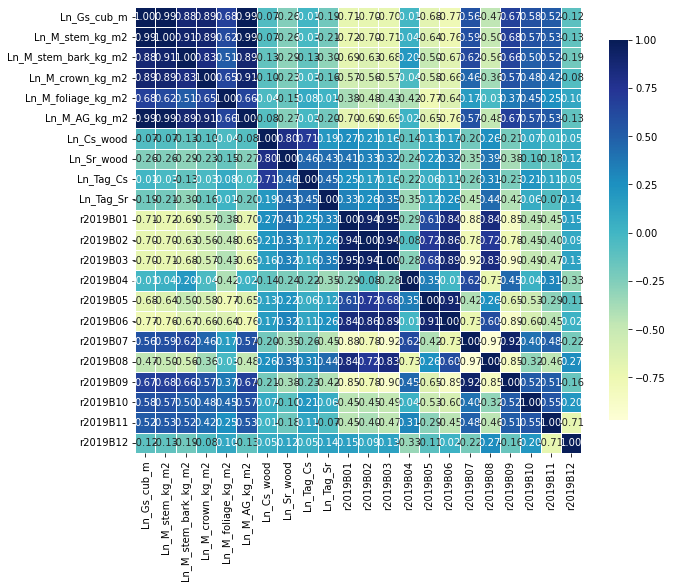

In [8]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['r2019B01', 'r2019B04', 'r2019B06', 'r2019B10', 'r2019B11'])
y = pd.DataFrame(select, columns= ['Ln_M_AG_kg_m2'])

In [10]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): No


Selected "No"!!! A new column with random values was not created.


In [11]:
# Columns in "X" data collections
X.head()

,r2019B01,r2019B04,r2019B06,r2019B10,r2019B11
0,0.025483,0.266210,0.081316,-15.396488,-11.262037
1,0.024075,0.183349,0.052144,-16.012156,-9.364664
2,0.022492,0.184066,0.050684,-13.609903,-9.726108
3,0.023742,0.177221,0.052198,-14.321650,-10.457536
4,0.022916,0.183705,0.050437,-13.934375,-11.393335


In [12]:
# Columns in "y" data collections
y.head()

,Ln_M_AG_kg_m2
0,1.91
1,2.63
2,2.70
3,2.78
4,2.83


# Create first XGBoost model for estimate varibiality of output stats

In [13]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [14]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [15]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [16]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.3232080431683807, 0.5627800142444177, 0.4501243914685772]
    Mean: 0.445
    Std: 0.098

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.84154933 0.70387816 0.63281114]
    Mean: 0.726
    Std: 0.087

 --------------------
Mean absolute error (MAE): 

    Scores: [0.490043889284134, 0.48608711572254404, 0.4680387815318125]
    Mean: 0.481
    Std: 0.010

 --------------------


# Find optimal hyperparameters for XGBoost model

In [17]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [18]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=3000, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
Model with rank: 1
Mean validation score: 0.496 (std: 0.238)
Parameters: {'colsample_bytree': 0.8500574958177407, 'gamma': 0.48327621552731137, 'learning_rate': 0.06833268633761382, 'max_depth': 2, 'n_estimators': 125, 'subsample': 0.32729290551701495}



In [19]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.17004404, 0.39551158, 0.36141644, ..., 0.18485785, 0.18602824,
       0.18633418]), 'std_fit_time': array([0.01268712, 0.19404083, 0.0175263 , ..., 0.04091819, 0.00862791,
       0.00842123]), 'mean_score_time': array([0.00450468, 0.00723047, 0.00462041, ..., 0.00438542, 0.00435863,
       0.00431943]), 'std_score_time': array([7.52588931e-05, 5.10267774e-03, 3.18995149e-05, ...,
       1.05329691e-04, 6.14832656e-05, 6.33650023e-05]), 'param_colsample_bytree': masked_array(data=[0.5461134010805702, 0.3309864502780834,
                   0.5056396877514352, ..., 0.8521047409694438,
                   0.7117898844852057, 0.8562094739667548],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.03661106407073933, 0.36589714162168935,
                   0.1135624915863786, ..., 0.16807339962676893,
                   0.02519091159836523, 0.07568705033619183],
    

In [20]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.8500574958177407
Gamma: 0.48327621552731137
Learning_rate: 0.06833268633761382
Max_depth: 2
N_estimators: 125
Subsample: 0.32729290551701495


# Estimation of a basic XGBoost model using Loops

In [21]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [22]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:1.90778	validation_1-rmse:1.86021
[1]	validation_0-rmse:1.79769	validation_1-rmse:1.74119
[2]	validation_0-rmse:1.69130	validation_1-rmse:1.62461
[3]	validation_0-rmse:1.59606	validation_1-rmse:1.53136
[4]	validation_0-rmse:1.50945	validation_1-rmse:1.44071
[5]	validation_0-rmse:1.42623	validation_1-rmse:1.35390
[6]	validation_0-rmse:1.35016	validation_1-rmse:1.27333
[7]	validation_0-rmse:1.27932	validation_1-rmse:1.19782
[8]	validation_0-rmse:1.20941	validation_1-rmse:1.12277
[9]	validation_0-rmse:1.14990	validation_1-rmse:1.05895
[10]	validation_0-rmse:1.09119	validation_1-rmse:0.99748
[11]	validation_0-rmse:1.03612	validation_1-rmse:0.94165
[12]	validation_0-rmse:0.98817	validation_1-rmse:0.89346
[13]	validation_0-rmse:0.94738	validation_1-rmse:0.84209
[14]	validation_0-rmse:0.91369	validation_1-rmse:0.81384
[15]	validation_0-rmse:0.87477	validation_1-rmse:0.78745
[16]	validation_0-rmse:0.83785	validation_1-rmse:0.74867
[17]	validation_0-rmse:0.81241	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.60490	validation_1-rmse:0.53611
[28]	validation_0-rmse:0.59215	validation_1-rmse:0.52066
[29]	validation_0-rmse:0.58684	validation_1-rmse:0.51118
[30]	validation_0-rmse:0.57929	validation_1-rmse:0.50584
[31]	validation_0-rmse:0.56791	validation_1-rmse:0.49806
[32]	validation_0-rmse:0.55978	validation_1-rmse:0.48485
[33]	validation_0-rmse:0.55555	validation_1-rmse:0.48602
[34]	validation_0-rmse:0.54955	validation_1-rmse:0.48751
[35]	validation_0-rmse:0.54357	validation_1-rmse:0.48237
[36]	validation_0-rmse:0.53836	validation_1-rmse:0.47308
[37]	validation_0-rmse:0.53041	validation_1-rmse:0.47317
[38]	validation_0-rmse:0.52568	validation_1-rmse:0.47304
[39]	validation_0-rmse:0.52164	validation_1-rmse:0.46670
[40]	validation_0-rmse:0.51884	validation_1-rmse:0.46784
[41]	validation_0-rmse:0.51440	validation_1-rmse:0.46401
[42]	validation_0-rmse:0.50993	validation_1-rmse:0.46696
[43]	validation_0-rmse:0.50754	validation_1-rmse:0.46687
[44]	validation_0-rmse:0.50520	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.19400	validation_1-rmse:1.22047
[9]	validation_0-rmse:1.13621	validation_1-rmse:1.15808
[10]	validation_0-rmse:1.07988	validation_1-rmse:1.10268
[11]	validation_0-rmse:1.03093	validation_1-rmse:1.05505
[12]	validation_0-rmse:0.98221	validation_1-rmse:1.00970
[13]	validation_0-rmse:0.93900	validation_1-rmse:0.96297
[14]	validation_0-rmse:0.89846	validation_1-rmse:0.92919
[15]	validation_0-rmse:0.86454	validation_1-rmse:0.89396
[16]	validation_0-rmse:0.83187	validation_1-rmse:0.86072
[17]	validation_0-rmse:0.80125	validation_1-rmse:0.82933
[18]	validation_0-rmse:0.77219	validation_1-rmse:0.79686
[19]	validation_0-rmse:0.74727	validation_1-rmse:0.77453
[20]	validation_0-rmse:0.71980	validation_1-rmse:0.74735
[21]	validation_0-rmse:0.69460	validation_1-rmse:0.71428
[22]	validation_0-rmse:0.67618	validation_1-rmse:0.70355
[23]	validation_0-rmse:0.65965	validation_1-rmse:0.68913
[24]	validation_0-rmse:0.64233	validation_1-rmse:0.66955
[25]	validation_0-rmse:0.62822	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.06295	validation_1-rmse:1.13934
[11]	validation_0-rmse:1.00433	validation_1-rmse:1.08031
[12]	validation_0-rmse:0.95895	validation_1-rmse:1.03473
[13]	validation_0-rmse:0.91227	validation_1-rmse:0.98726
[14]	validation_0-rmse:0.87522	validation_1-rmse:0.95248
[15]	validation_0-rmse:0.84261	validation_1-rmse:0.92073
[16]	validation_0-rmse:0.80925	validation_1-rmse:0.88568
[17]	validation_0-rmse:0.77744	validation_1-rmse:0.85585
[18]	validation_0-rmse:0.75342	validation_1-rmse:0.82980
[19]	validation_0-rmse:0.72764	validation_1-rmse:0.80789
[20]	validation_0-rmse:0.70579	validation_1-rmse:0.79214
[21]	validation_0-rmse:0.68488	validation_1-rmse:0.77954
[22]	validation_0-rmse:0.66913	validation_1-rmse:0.76072
[23]	validation_0-rmse:0.65151	validation_1-rmse:0.73904
[24]	validation_0-rmse:0.63504	validation_1-rmse:0.72679
[25]	validation_0-rmse:0.61974	validation_1-rmse:0.71597
[26]	validation_0-rmse:0.60602	validation_1-rmse:0.70395
[27]	validation_0-rmse:0.59323	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.31238	validation_1-rmse:1.40077
[7]	validation_0-rmse:1.23961	validation_1-rmse:1.32244
[8]	validation_0-rmse:1.17427	validation_1-rmse:1.25446
[9]	validation_0-rmse:1.10971	validation_1-rmse:1.18834
[10]	validation_0-rmse:1.05326	validation_1-rmse:1.13169
[11]	validation_0-rmse:1.00155	validation_1-rmse:1.07580
[12]	validation_0-rmse:0.95544	validation_1-rmse:1.02829
[13]	validation_0-rmse:0.91104	validation_1-rmse:0.98162
[14]	validation_0-rmse:0.87007	validation_1-rmse:0.93870
[15]	validation_0-rmse:0.83468	validation_1-rmse:0.89881
[16]	validation_0-rmse:0.80361	validation_1-rmse:0.86346
[17]	validation_0-rmse:0.77723	validation_1-rmse:0.83448
[18]	validation_0-rmse:0.75191	validation_1-rmse:0.80999
[19]	validation_0-rmse:0.72644	validation_1-rmse:0.78508
[20]	validation_0-rmse:0.70238	validation_1-rmse:0.76045
[21]	validation_0-rmse:0.68239	validation_1-rmse:0.74039
[22]	validation_0-rmse:0.66187	validation_1-rmse:0.71708
[23]	validation_0-rmse:0.64682	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.97672	validation_1-rmse:1.05337
[13]	validation_0-rmse:0.92812	validation_1-rmse:1.00950
[14]	validation_0-rmse:0.89070	validation_1-rmse:0.96609
[15]	validation_0-rmse:0.85677	validation_1-rmse:0.93087
[16]	validation_0-rmse:0.81889	validation_1-rmse:0.88908
[17]	validation_0-rmse:0.78846	validation_1-rmse:0.85477
[18]	validation_0-rmse:0.75754	validation_1-rmse:0.82192
[19]	validation_0-rmse:0.72582	validation_1-rmse:0.78623
[20]	validation_0-rmse:0.70089	validation_1-rmse:0.76715
[21]	validation_0-rmse:0.67950	validation_1-rmse:0.75269
[22]	validation_0-rmse:0.66042	validation_1-rmse:0.73296
[23]	validation_0-rmse:0.64328	validation_1-rmse:0.71766
[24]	validation_0-rmse:0.62937	validation_1-rmse:0.70451
[25]	validation_0-rmse:0.61517	validation_1-rmse:0.68942
[26]	validation_0-rmse:0.60230	validation_1-rmse:0.67301
[27]	validation_0-rmse:0.58944	validation_1-rmse:0.65847
[28]	validation_0-rmse:0.57573	validation_1-rmse:0.65031
[29]	validation_0-rmse:0.56880	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.91977	validation_1-rmse:0.99225
[14]	validation_0-rmse:0.88294	validation_1-rmse:0.95402
[15]	validation_0-rmse:0.84695	validation_1-rmse:0.92091
[16]	validation_0-rmse:0.81007	validation_1-rmse:0.88765
[17]	validation_0-rmse:0.77754	validation_1-rmse:0.85081
[18]	validation_0-rmse:0.75096	validation_1-rmse:0.82147
[19]	validation_0-rmse:0.72179	validation_1-rmse:0.79785
[20]	validation_0-rmse:0.69514	validation_1-rmse:0.77093
[21]	validation_0-rmse:0.67148	validation_1-rmse:0.74336
[22]	validation_0-rmse:0.65345	validation_1-rmse:0.72650
[23]	validation_0-rmse:0.63679	validation_1-rmse:0.71076
[24]	validation_0-rmse:0.62095	validation_1-rmse:0.69615
[25]	validation_0-rmse:0.60829	validation_1-rmse:0.68217
[26]	validation_0-rmse:0.59652	validation_1-rmse:0.67293
[27]	validation_0-rmse:0.58319	validation_1-rmse:0.66060
[28]	validation_0-rmse:0.56982	validation_1-rmse:0.64774
[29]	validation_0-rmse:0.55880	validation_1-rmse:0.63016
[30]	validation_0-rmse:0.55158	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.34449	validation_1-rmse:1.34550
[7]	validation_0-rmse:1.27180	validation_1-rmse:1.27703
[8]	validation_0-rmse:1.20178	validation_1-rmse:1.21015
[9]	validation_0-rmse:1.13569	validation_1-rmse:1.14925
[10]	validation_0-rmse:1.08112	validation_1-rmse:1.09859
[11]	validation_0-rmse:1.02828	validation_1-rmse:1.04654
[12]	validation_0-rmse:0.97797	validation_1-rmse:0.99526
[13]	validation_0-rmse:0.93270	validation_1-rmse:0.95224
[14]	validation_0-rmse:0.88927	validation_1-rmse:0.91205
[15]	validation_0-rmse:0.85249	validation_1-rmse:0.87674
[16]	validation_0-rmse:0.81554	validation_1-rmse:0.84720
[17]	validation_0-rmse:0.78101	validation_1-rmse:0.81954
[18]	validation_0-rmse:0.75549	validation_1-rmse:0.79925
[19]	validation_0-rmse:0.73214	validation_1-rmse:0.78097
[20]	validation_0-rmse:0.70675	validation_1-rmse:0.75950
[21]	validation_0-rmse:0.68265	validation_1-rmse:0.74171
[22]	validation_0-rmse:0.66327	validation_1-rmse:0.72632
[23]	validation_0-rmse:0.64464	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.86354	validation_1-rmse:0.90303
[16]	validation_0-rmse:0.82801	validation_1-rmse:0.87378
[17]	validation_0-rmse:0.79577	validation_1-rmse:0.84920
[18]	validation_0-rmse:0.76895	validation_1-rmse:0.83639
[19]	validation_0-rmse:0.74316	validation_1-rmse:0.81463
[20]	validation_0-rmse:0.72095	validation_1-rmse:0.79802
[21]	validation_0-rmse:0.69981	validation_1-rmse:0.77848
[22]	validation_0-rmse:0.68058	validation_1-rmse:0.76357
[23]	validation_0-rmse:0.65856	validation_1-rmse:0.74948
[24]	validation_0-rmse:0.63978	validation_1-rmse:0.72889
[25]	validation_0-rmse:0.62173	validation_1-rmse:0.71650
[26]	validation_0-rmse:0.60254	validation_1-rmse:0.70255
[27]	validation_0-rmse:0.59119	validation_1-rmse:0.69124
[28]	validation_0-rmse:0.58180	validation_1-rmse:0.68276
[29]	validation_0-rmse:0.57450	validation_1-rmse:0.68240
[30]	validation_0-rmse:0.56362	validation_1-rmse:0.67713
[31]	validation_0-rmse:0.55617	validation_1-rmse:0.67307
[32]	validation_0-rmse:0.54842	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.77619	validation_1-rmse:0.83788
[18]	validation_0-rmse:0.74555	validation_1-rmse:0.81109
[19]	validation_0-rmse:0.72056	validation_1-rmse:0.79466
[20]	validation_0-rmse:0.69402	validation_1-rmse:0.77348
[21]	validation_0-rmse:0.66926	validation_1-rmse:0.76170
[22]	validation_0-rmse:0.64281	validation_1-rmse:0.74580
[23]	validation_0-rmse:0.62786	validation_1-rmse:0.72872
[24]	validation_0-rmse:0.61068	validation_1-rmse:0.71540
[25]	validation_0-rmse:0.59639	validation_1-rmse:0.70272
[26]	validation_0-rmse:0.58269	validation_1-rmse:0.69446
[27]	validation_0-rmse:0.56943	validation_1-rmse:0.68395
[28]	validation_0-rmse:0.55888	validation_1-rmse:0.67631
[29]	validation_0-rmse:0.54812	validation_1-rmse:0.66644
[30]	validation_0-rmse:0.54080	validation_1-rmse:0.66108
[31]	validation_0-rmse:0.52989	validation_1-rmse:0.65029
[32]	validation_0-rmse:0.52148	validation_1-rmse:0.64392
[33]	validation_0-rmse:0.51021	validation_1-rmse:0.64172
[34]	validation_0-rmse:0.50232	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.99118	validation_1-rmse:0.91300
[13]	validation_0-rmse:0.94300	validation_1-rmse:0.86659
[14]	validation_0-rmse:0.90092	validation_1-rmse:0.82377
[15]	validation_0-rmse:0.86521	validation_1-rmse:0.78702
[16]	validation_0-rmse:0.83085	validation_1-rmse:0.75334
[17]	validation_0-rmse:0.79707	validation_1-rmse:0.72012
[18]	validation_0-rmse:0.77065	validation_1-rmse:0.70479
[19]	validation_0-rmse:0.74178	validation_1-rmse:0.67326
[20]	validation_0-rmse:0.71934	validation_1-rmse:0.65038
[21]	validation_0-rmse:0.70074	validation_1-rmse:0.62981
[22]	validation_0-rmse:0.68086	validation_1-rmse:0.61022
[23]	validation_0-rmse:0.66540	validation_1-rmse:0.59396
[24]	validation_0-rmse:0.64544	validation_1-rmse:0.56994
[25]	validation_0-rmse:0.62625	validation_1-rmse:0.55350
[26]	validation_0-rmse:0.61157	validation_1-rmse:0.54348
[27]	validation_0-rmse:0.59929	validation_1-rmse:0.53473
[28]	validation_0-rmse:0.58832	validation_1-rmse:0.52720
[29]	validation_0-rmse:0.57764	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.14066	validation_1-rmse:1.08164
[10]	validation_0-rmse:1.08339	validation_1-rmse:1.02246
[11]	validation_0-rmse:1.03197	validation_1-rmse:0.96764
[12]	validation_0-rmse:0.98225	validation_1-rmse:0.91744
[13]	validation_0-rmse:0.93677	validation_1-rmse:0.87486
[14]	validation_0-rmse:0.89406	validation_1-rmse:0.83466
[15]	validation_0-rmse:0.85456	validation_1-rmse:0.80472
[16]	validation_0-rmse:0.82087	validation_1-rmse:0.76747
[17]	validation_0-rmse:0.79102	validation_1-rmse:0.73908
[18]	validation_0-rmse:0.75988	validation_1-rmse:0.71345
[19]	validation_0-rmse:0.73039	validation_1-rmse:0.68621
[20]	validation_0-rmse:0.70833	validation_1-rmse:0.66298
[21]	validation_0-rmse:0.68486	validation_1-rmse:0.63992
[22]	validation_0-rmse:0.66320	validation_1-rmse:0.62771
[23]	validation_0-rmse:0.64783	validation_1-rmse:0.61754
[24]	validation_0-rmse:0.62736	validation_1-rmse:0.60091
[25]	validation_0-rmse:0.61280	validation_1-rmse:0.59023
[26]	validation_0-rmse:0.59842	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.76748	validation_1-rmse:0.73534
[19]	validation_0-rmse:0.74010	validation_1-rmse:0.70072
[20]	validation_0-rmse:0.71538	validation_1-rmse:0.67832
[21]	validation_0-rmse:0.69134	validation_1-rmse:0.64463
[22]	validation_0-rmse:0.67375	validation_1-rmse:0.62628
[23]	validation_0-rmse:0.65886	validation_1-rmse:0.61101
[24]	validation_0-rmse:0.64163	validation_1-rmse:0.59408
[25]	validation_0-rmse:0.62766	validation_1-rmse:0.58051
[26]	validation_0-rmse:0.61291	validation_1-rmse:0.56348
[27]	validation_0-rmse:0.60153	validation_1-rmse:0.55095
[28]	validation_0-rmse:0.58963	validation_1-rmse:0.53551
[29]	validation_0-rmse:0.58217	validation_1-rmse:0.52915
[30]	validation_0-rmse:0.57516	validation_1-rmse:0.51648
[31]	validation_0-rmse:0.56839	validation_1-rmse:0.50564
[32]	validation_0-rmse:0.56042	validation_1-rmse:0.49640
[33]	validation_0-rmse:0.55297	validation_1-rmse:0.48393
[34]	validation_0-rmse:0.54465	validation_1-rmse:0.48059
[35]	validation_0-rmse:0.54032	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.82265	validation_1-rmse:1.00860
[16]	validation_0-rmse:0.79106	validation_1-rmse:0.97727
[17]	validation_0-rmse:0.75491	validation_1-rmse:0.94116
[18]	validation_0-rmse:0.72533	validation_1-rmse:0.91121
[19]	validation_0-rmse:0.69807	validation_1-rmse:0.88302
[20]	validation_0-rmse:0.67029	validation_1-rmse:0.85769
[21]	validation_0-rmse:0.64608	validation_1-rmse:0.83316
[22]	validation_0-rmse:0.62576	validation_1-rmse:0.80889
[23]	validation_0-rmse:0.60797	validation_1-rmse:0.79094
[24]	validation_0-rmse:0.59413	validation_1-rmse:0.77538
[25]	validation_0-rmse:0.58275	validation_1-rmse:0.76130
[26]	validation_0-rmse:0.56909	validation_1-rmse:0.75160
[27]	validation_0-rmse:0.55749	validation_1-rmse:0.74047
[28]	validation_0-rmse:0.54922	validation_1-rmse:0.73578
[29]	validation_0-rmse:0.53967	validation_1-rmse:0.72708
[30]	validation_0-rmse:0.53213	validation_1-rmse:0.72019
[31]	validation_0-rmse:0.51974	validation_1-rmse:0.70673
[32]	validation_0-rmse:0.51220	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.80267	validation_1-rmse:0.93393
[17]	validation_0-rmse:0.76925	validation_1-rmse:0.90739
[18]	validation_0-rmse:0.73937	validation_1-rmse:0.88100
[19]	validation_0-rmse:0.71309	validation_1-rmse:0.85826
[20]	validation_0-rmse:0.69151	validation_1-rmse:0.84568
[21]	validation_0-rmse:0.66957	validation_1-rmse:0.82908
[22]	validation_0-rmse:0.65083	validation_1-rmse:0.81375
[23]	validation_0-rmse:0.63070	validation_1-rmse:0.79624
[24]	validation_0-rmse:0.61277	validation_1-rmse:0.79261
[25]	validation_0-rmse:0.60161	validation_1-rmse:0.78501
[26]	validation_0-rmse:0.58634	validation_1-rmse:0.77247
[27]	validation_0-rmse:0.57386	validation_1-rmse:0.76622
[28]	validation_0-rmse:0.55980	validation_1-rmse:0.75285
[29]	validation_0-rmse:0.54739	validation_1-rmse:0.75013
[30]	validation_0-rmse:0.53481	validation_1-rmse:0.74206
[31]	validation_0-rmse:0.52740	validation_1-rmse:0.73585
[32]	validation_0-rmse:0.51876	validation_1-rmse:0.73075
[33]	validation_0-rmse:0.51205	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.83552	validation_1-rmse:0.93075
[16]	validation_0-rmse:0.80393	validation_1-rmse:0.91072
[17]	validation_0-rmse:0.77254	validation_1-rmse:0.88467
[18]	validation_0-rmse:0.74453	validation_1-rmse:0.86587
[19]	validation_0-rmse:0.72185	validation_1-rmse:0.84882
[20]	validation_0-rmse:0.69743	validation_1-rmse:0.83456
[21]	validation_0-rmse:0.67195	validation_1-rmse:0.81135
[22]	validation_0-rmse:0.64923	validation_1-rmse:0.79769
[23]	validation_0-rmse:0.63377	validation_1-rmse:0.79194
[24]	validation_0-rmse:0.61913	validation_1-rmse:0.78248
[25]	validation_0-rmse:0.60551	validation_1-rmse:0.77694
[26]	validation_0-rmse:0.58956	validation_1-rmse:0.76614
[27]	validation_0-rmse:0.57507	validation_1-rmse:0.75623
[28]	validation_0-rmse:0.56565	validation_1-rmse:0.75489
[29]	validation_0-rmse:0.55597	validation_1-rmse:0.75036
[30]	validation_0-rmse:0.54649	validation_1-rmse:0.74591
[31]	validation_0-rmse:0.53561	validation_1-rmse:0.74039
[32]	validation_0-rmse:0.52877	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.80498	validation_1-rmse:0.84649
[17]	validation_0-rmse:0.76944	validation_1-rmse:0.82704
[18]	validation_0-rmse:0.74181	validation_1-rmse:0.81351
[19]	validation_0-rmse:0.71479	validation_1-rmse:0.80477
[20]	validation_0-rmse:0.69157	validation_1-rmse:0.78378
[21]	validation_0-rmse:0.67084	validation_1-rmse:0.76826
[22]	validation_0-rmse:0.64865	validation_1-rmse:0.75582
[23]	validation_0-rmse:0.62699	validation_1-rmse:0.74232
[24]	validation_0-rmse:0.60684	validation_1-rmse:0.72714
[25]	validation_0-rmse:0.59064	validation_1-rmse:0.71590
[26]	validation_0-rmse:0.57692	validation_1-rmse:0.70601
[27]	validation_0-rmse:0.56489	validation_1-rmse:0.69725
[28]	validation_0-rmse:0.55490	validation_1-rmse:0.68891
[29]	validation_0-rmse:0.54297	validation_1-rmse:0.68564
[30]	validation_0-rmse:0.53389	validation_1-rmse:0.68437
[31]	validation_0-rmse:0.52593	validation_1-rmse:0.68616
[32]	validation_0-rmse:0.51882	validation_1-rmse:0.68554
[33]	validation_0-rmse:0.50797	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.20463	validation_1-rmse:1.22623
[9]	validation_0-rmse:1.14249	validation_1-rmse:1.16869
[10]	validation_0-rmse:1.08298	validation_1-rmse:1.11624
[11]	validation_0-rmse:1.03347	validation_1-rmse:1.07001
[12]	validation_0-rmse:0.98994	validation_1-rmse:1.03210
[13]	validation_0-rmse:0.94630	validation_1-rmse:0.98806
[14]	validation_0-rmse:0.90396	validation_1-rmse:0.94963
[15]	validation_0-rmse:0.86607	validation_1-rmse:0.91008
[16]	validation_0-rmse:0.83226	validation_1-rmse:0.88339
[17]	validation_0-rmse:0.80326	validation_1-rmse:0.85707
[18]	validation_0-rmse:0.76901	validation_1-rmse:0.82109
[19]	validation_0-rmse:0.73928	validation_1-rmse:0.79133
[20]	validation_0-rmse:0.71429	validation_1-rmse:0.76575
[21]	validation_0-rmse:0.69101	validation_1-rmse:0.74406
[22]	validation_0-rmse:0.66920	validation_1-rmse:0.72190
[23]	validation_0-rmse:0.65327	validation_1-rmse:0.71059
[24]	validation_0-rmse:0.63605	validation_1-rmse:0.69609
[25]	validation_0-rmse:0.61957	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.48829	validation_1-rmse:1.50716
[5]	validation_0-rmse:1.39985	validation_1-rmse:1.41469
[6]	validation_0-rmse:1.32350	validation_1-rmse:1.33111
[7]	validation_0-rmse:1.24733	validation_1-rmse:1.24795
[8]	validation_0-rmse:1.18596	validation_1-rmse:1.17961
[9]	validation_0-rmse:1.12980	validation_1-rmse:1.11647
[10]	validation_0-rmse:1.07612	validation_1-rmse:1.06088
[11]	validation_0-rmse:1.02034	validation_1-rmse:1.00313
[12]	validation_0-rmse:0.97103	validation_1-rmse:0.95211
[13]	validation_0-rmse:0.92197	validation_1-rmse:0.90174
[14]	validation_0-rmse:0.88019	validation_1-rmse:0.85280
[15]	validation_0-rmse:0.84370	validation_1-rmse:0.81455
[16]	validation_0-rmse:0.80942	validation_1-rmse:0.77731
[17]	validation_0-rmse:0.78063	validation_1-rmse:0.74345
[18]	validation_0-rmse:0.75347	validation_1-rmse:0.71129
[19]	validation_0-rmse:0.73111	validation_1-rmse:0.69006
[20]	validation_0-rmse:0.70686	validation_1-rmse:0.66783
[21]	validation_0-rmse:0.68651	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.81887	validation_1-rmse:0.86684
[17]	validation_0-rmse:0.78238	validation_1-rmse:0.83768
[18]	validation_0-rmse:0.75734	validation_1-rmse:0.82105
[19]	validation_0-rmse:0.73328	validation_1-rmse:0.80034
[20]	validation_0-rmse:0.70556	validation_1-rmse:0.78629
[21]	validation_0-rmse:0.68429	validation_1-rmse:0.77090
[22]	validation_0-rmse:0.66360	validation_1-rmse:0.75670
[23]	validation_0-rmse:0.63912	validation_1-rmse:0.74862
[24]	validation_0-rmse:0.62316	validation_1-rmse:0.73816
[25]	validation_0-rmse:0.60828	validation_1-rmse:0.72259
[26]	validation_0-rmse:0.59337	validation_1-rmse:0.71957
[27]	validation_0-rmse:0.57683	validation_1-rmse:0.70261
[28]	validation_0-rmse:0.56040	validation_1-rmse:0.69678
[29]	validation_0-rmse:0.55104	validation_1-rmse:0.69152
[30]	validation_0-rmse:0.54148	validation_1-rmse:0.68409
[31]	validation_0-rmse:0.53486	validation_1-rmse:0.67782
[32]	validation_0-rmse:0.52711	validation_1-rmse:0.66867
[33]	validation_0-rmse:0.52058	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.84059	validation_1-rmse:0.97187
[16]	validation_0-rmse:0.80092	validation_1-rmse:0.93926
[17]	validation_0-rmse:0.76706	validation_1-rmse:0.90957
[18]	validation_0-rmse:0.73375	validation_1-rmse:0.89103
[19]	validation_0-rmse:0.70352	validation_1-rmse:0.87164
[20]	validation_0-rmse:0.67761	validation_1-rmse:0.86333
[21]	validation_0-rmse:0.65670	validation_1-rmse:0.86249
[22]	validation_0-rmse:0.63319	validation_1-rmse:0.86118
[23]	validation_0-rmse:0.61412	validation_1-rmse:0.85523
[24]	validation_0-rmse:0.59434	validation_1-rmse:0.84188
[25]	validation_0-rmse:0.57980	validation_1-rmse:0.82884
[26]	validation_0-rmse:0.56812	validation_1-rmse:0.82367
[27]	validation_0-rmse:0.55549	validation_1-rmse:0.81432
[28]	validation_0-rmse:0.54547	validation_1-rmse:0.81227
[29]	validation_0-rmse:0.53469	validation_1-rmse:0.81273
[30]	validation_0-rmse:0.52339	validation_1-rmse:0.80398
[31]	validation_0-rmse:0.51694	validation_1-rmse:0.80699
[32]	validation_0-rmse:0.51499	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.81053	validation_1-rmse:0.90720
[17]	validation_0-rmse:0.77466	validation_1-rmse:0.87138
[18]	validation_0-rmse:0.74871	validation_1-rmse:0.84209
[19]	validation_0-rmse:0.72177	validation_1-rmse:0.81692
[20]	validation_0-rmse:0.69776	validation_1-rmse:0.79231
[21]	validation_0-rmse:0.67649	validation_1-rmse:0.77345
[22]	validation_0-rmse:0.65706	validation_1-rmse:0.75532
[23]	validation_0-rmse:0.63765	validation_1-rmse:0.73541
[24]	validation_0-rmse:0.61879	validation_1-rmse:0.71481
[25]	validation_0-rmse:0.60378	validation_1-rmse:0.70227
[26]	validation_0-rmse:0.58773	validation_1-rmse:0.68487
[27]	validation_0-rmse:0.57594	validation_1-rmse:0.67384
[28]	validation_0-rmse:0.56450	validation_1-rmse:0.65962
[29]	validation_0-rmse:0.55182	validation_1-rmse:0.64786
[30]	validation_0-rmse:0.53916	validation_1-rmse:0.64135
[31]	validation_0-rmse:0.53371	validation_1-rmse:0.63571
[32]	validation_0-rmse:0.52661	validation_1-rmse:0.62920
[33]	validation_0-rmse:0.51764	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.03279	validation_1-rmse:1.08698
[12]	validation_0-rmse:0.98073	validation_1-rmse:1.02980
[13]	validation_0-rmse:0.93917	validation_1-rmse:0.98796
[14]	validation_0-rmse:0.89704	validation_1-rmse:0.94267
[15]	validation_0-rmse:0.85860	validation_1-rmse:0.90724
[16]	validation_0-rmse:0.82485	validation_1-rmse:0.87736
[17]	validation_0-rmse:0.79837	validation_1-rmse:0.85212
[18]	validation_0-rmse:0.76538	validation_1-rmse:0.81512
[19]	validation_0-rmse:0.73559	validation_1-rmse:0.78720
[20]	validation_0-rmse:0.70793	validation_1-rmse:0.76272
[21]	validation_0-rmse:0.68614	validation_1-rmse:0.73811
[22]	validation_0-rmse:0.66322	validation_1-rmse:0.71485
[23]	validation_0-rmse:0.64434	validation_1-rmse:0.69699
[24]	validation_0-rmse:0.62528	validation_1-rmse:0.68529
[25]	validation_0-rmse:0.60648	validation_1-rmse:0.67364
[26]	validation_0-rmse:0.59472	validation_1-rmse:0.66876
[27]	validation_0-rmse:0.58511	validation_1-rmse:0.66257
[28]	validation_0-rmse:0.57264	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.80676	validation_1-rmse:0.87662
[17]	validation_0-rmse:0.77769	validation_1-rmse:0.84502
[18]	validation_0-rmse:0.75222	validation_1-rmse:0.81692
[19]	validation_0-rmse:0.72800	validation_1-rmse:0.78390
[20]	validation_0-rmse:0.70428	validation_1-rmse:0.75488
[21]	validation_0-rmse:0.68473	validation_1-rmse:0.73042
[22]	validation_0-rmse:0.66603	validation_1-rmse:0.71305
[23]	validation_0-rmse:0.64737	validation_1-rmse:0.69331
[24]	validation_0-rmse:0.63112	validation_1-rmse:0.67400
[25]	validation_0-rmse:0.61516	validation_1-rmse:0.65723
[26]	validation_0-rmse:0.60335	validation_1-rmse:0.64047
[27]	validation_0-rmse:0.59189	validation_1-rmse:0.62729
[28]	validation_0-rmse:0.58199	validation_1-rmse:0.61598
[29]	validation_0-rmse:0.57221	validation_1-rmse:0.60169
[30]	validation_0-rmse:0.56662	validation_1-rmse:0.59371
[31]	validation_0-rmse:0.55950	validation_1-rmse:0.58534
[32]	validation_0-rmse:0.55231	validation_1-rmse:0.57492
[33]	validation_0-rmse:0.54553	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.25476	validation_1-rmse:1.29186
[8]	validation_0-rmse:1.18859	validation_1-rmse:1.22925
[9]	validation_0-rmse:1.12764	validation_1-rmse:1.17585
[10]	validation_0-rmse:1.07190	validation_1-rmse:1.11999
[11]	validation_0-rmse:1.01769	validation_1-rmse:1.06735
[12]	validation_0-rmse:0.96757	validation_1-rmse:1.01979
[13]	validation_0-rmse:0.91993	validation_1-rmse:0.97316
[14]	validation_0-rmse:0.87517	validation_1-rmse:0.93156
[15]	validation_0-rmse:0.84468	validation_1-rmse:0.90154
[16]	validation_0-rmse:0.80946	validation_1-rmse:0.87022
[17]	validation_0-rmse:0.77883	validation_1-rmse:0.84300
[18]	validation_0-rmse:0.74915	validation_1-rmse:0.81914
[19]	validation_0-rmse:0.72191	validation_1-rmse:0.79946
[20]	validation_0-rmse:0.69628	validation_1-rmse:0.78235
[21]	validation_0-rmse:0.67716	validation_1-rmse:0.76465
[22]	validation_0-rmse:0.65602	validation_1-rmse:0.74958
[23]	validation_0-rmse:0.64196	validation_1-rmse:0.74305
[24]	validation_0-rmse:0.62418	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.91393	validation_1-rmse:0.88121
[15]	validation_0-rmse:0.87433	validation_1-rmse:0.84355
[16]	validation_0-rmse:0.83992	validation_1-rmse:0.81605
[17]	validation_0-rmse:0.80667	validation_1-rmse:0.78609
[18]	validation_0-rmse:0.77564	validation_1-rmse:0.75856
[19]	validation_0-rmse:0.75556	validation_1-rmse:0.74476
[20]	validation_0-rmse:0.72701	validation_1-rmse:0.72148
[21]	validation_0-rmse:0.70746	validation_1-rmse:0.70537
[22]	validation_0-rmse:0.68606	validation_1-rmse:0.68839
[23]	validation_0-rmse:0.66621	validation_1-rmse:0.66417
[24]	validation_0-rmse:0.65075	validation_1-rmse:0.64956
[25]	validation_0-rmse:0.63254	validation_1-rmse:0.63537
[26]	validation_0-rmse:0.62017	validation_1-rmse:0.62249
[27]	validation_0-rmse:0.61086	validation_1-rmse:0.61883
[28]	validation_0-rmse:0.59467	validation_1-rmse:0.60642
[29]	validation_0-rmse:0.58199	validation_1-rmse:0.59596
[30]	validation_0-rmse:0.57549	validation_1-rmse:0.58634
[31]	validation_0-rmse:0.56537	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.81695	validation_1-rmse:0.77390
[17]	validation_0-rmse:0.78465	validation_1-rmse:0.73544
[18]	validation_0-rmse:0.75467	validation_1-rmse:0.70496
[19]	validation_0-rmse:0.73035	validation_1-rmse:0.67853
[20]	validation_0-rmse:0.70951	validation_1-rmse:0.66224
[21]	validation_0-rmse:0.68812	validation_1-rmse:0.64108
[22]	validation_0-rmse:0.67168	validation_1-rmse:0.62226
[23]	validation_0-rmse:0.65446	validation_1-rmse:0.60379
[24]	validation_0-rmse:0.63781	validation_1-rmse:0.59493
[25]	validation_0-rmse:0.62607	validation_1-rmse:0.58368
[26]	validation_0-rmse:0.61318	validation_1-rmse:0.57226
[27]	validation_0-rmse:0.60099	validation_1-rmse:0.56296
[28]	validation_0-rmse:0.58874	validation_1-rmse:0.55956
[29]	validation_0-rmse:0.57937	validation_1-rmse:0.55330
[30]	validation_0-rmse:0.57072	validation_1-rmse:0.54602
[31]	validation_0-rmse:0.56371	validation_1-rmse:0.54542
[32]	validation_0-rmse:0.55658	validation_1-rmse:0.54543
[33]	validation_0-rmse:0.54791	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.54420	validation_1-rmse:0.62651
[32]	validation_0-rmse:0.53804	validation_1-rmse:0.61847
[33]	validation_0-rmse:0.52961	validation_1-rmse:0.61552
[34]	validation_0-rmse:0.52694	validation_1-rmse:0.61756
[35]	validation_0-rmse:0.51759	validation_1-rmse:0.60833
[36]	validation_0-rmse:0.51069	validation_1-rmse:0.60330
[37]	validation_0-rmse:0.50610	validation_1-rmse:0.59803
[38]	validation_0-rmse:0.50214	validation_1-rmse:0.59040
[39]	validation_0-rmse:0.49921	validation_1-rmse:0.58808
[40]	validation_0-rmse:0.49197	validation_1-rmse:0.58016
[41]	validation_0-rmse:0.48992	validation_1-rmse:0.57386
[42]	validation_0-rmse:0.48772	validation_1-rmse:0.57354
[43]	validation_0-rmse:0.48261	validation_1-rmse:0.56680
[44]	validation_0-rmse:0.48021	validation_1-rmse:0.56412
[45]	validation_0-rmse:0.47756	validation_1-rmse:0.56544
[46]	validation_0-rmse:0.47453	validation_1-rmse:0.55504
[47]	validation_0-rmse:0.47236	validation_1-rmse:0.55508
[48]	validation_0-rmse:0.46943	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.53495	validation_1-rmse:0.63492
[32]	validation_0-rmse:0.52520	validation_1-rmse:0.63090
[33]	validation_0-rmse:0.51876	validation_1-rmse:0.62841
[34]	validation_0-rmse:0.51033	validation_1-rmse:0.62222
[35]	validation_0-rmse:0.50644	validation_1-rmse:0.62200
[36]	validation_0-rmse:0.49994	validation_1-rmse:0.61559
[37]	validation_0-rmse:0.49613	validation_1-rmse:0.60918
[38]	validation_0-rmse:0.48950	validation_1-rmse:0.60763
[39]	validation_0-rmse:0.48411	validation_1-rmse:0.60378
[40]	validation_0-rmse:0.48105	validation_1-rmse:0.60557
[41]	validation_0-rmse:0.47930	validation_1-rmse:0.60519
[42]	validation_0-rmse:0.47474	validation_1-rmse:0.59994
[43]	validation_0-rmse:0.47086	validation_1-rmse:0.60079
[44]	validation_0-rmse:0.46419	validation_1-rmse:0.60186
[45]	validation_0-rmse:0.46148	validation_1-rmse:0.60102
[46]	validation_0-rmse:0.45884	validation_1-rmse:0.60094
[47]	validation_0-rmse:0.45706	validation_1-rmse:0.60002
[48]	validation_0-rmse:0.45362	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.51345	validation_1-rmse:0.73556
[32]	validation_0-rmse:0.50688	validation_1-rmse:0.73302
[33]	validation_0-rmse:0.49936	validation_1-rmse:0.72653
[34]	validation_0-rmse:0.49223	validation_1-rmse:0.72117
[35]	validation_0-rmse:0.48574	validation_1-rmse:0.71807
[36]	validation_0-rmse:0.48052	validation_1-rmse:0.71334
[37]	validation_0-rmse:0.47616	validation_1-rmse:0.71126
[38]	validation_0-rmse:0.46993	validation_1-rmse:0.70861
[39]	validation_0-rmse:0.46486	validation_1-rmse:0.70775
[40]	validation_0-rmse:0.46084	validation_1-rmse:0.70213
[41]	validation_0-rmse:0.45624	validation_1-rmse:0.69579
[42]	validation_0-rmse:0.45287	validation_1-rmse:0.69065
[43]	validation_0-rmse:0.45154	validation_1-rmse:0.69110
[44]	validation_0-rmse:0.44913	validation_1-rmse:0.68898
[45]	validation_0-rmse:0.44537	validation_1-rmse:0.68880
[46]	validation_0-rmse:0.44422	validation_1-rmse:0.68965
[47]	validation_0-rmse:0.44203	validation_1-rmse:0.68704
[48]	validation_0-rmse:0.44059	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.54350	validation_1-rmse:0.64388
[32]	validation_0-rmse:0.53364	validation_1-rmse:0.63103
[33]	validation_0-rmse:0.52712	validation_1-rmse:0.62342
[34]	validation_0-rmse:0.51909	validation_1-rmse:0.61412
[35]	validation_0-rmse:0.51267	validation_1-rmse:0.60747
[36]	validation_0-rmse:0.50643	validation_1-rmse:0.60084
[37]	validation_0-rmse:0.50345	validation_1-rmse:0.59655
[38]	validation_0-rmse:0.50071	validation_1-rmse:0.58826
[39]	validation_0-rmse:0.49558	validation_1-rmse:0.58122
[40]	validation_0-rmse:0.49224	validation_1-rmse:0.57580
[41]	validation_0-rmse:0.48889	validation_1-rmse:0.57442
[42]	validation_0-rmse:0.48452	validation_1-rmse:0.56965
[43]	validation_0-rmse:0.48175	validation_1-rmse:0.56524
[44]	validation_0-rmse:0.48033	validation_1-rmse:0.56008
[45]	validation_0-rmse:0.47748	validation_1-rmse:0.55974
[46]	validation_0-rmse:0.47333	validation_1-rmse:0.55668
[47]	validation_0-rmse:0.47137	validation_1-rmse:0.55466
[48]	validation_0-rmse:0.46827	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.56204	validation_1-rmse:0.53226
[31]	validation_0-rmse:0.55440	validation_1-rmse:0.52511
[32]	validation_0-rmse:0.54748	validation_1-rmse:0.51938
[33]	validation_0-rmse:0.54090	validation_1-rmse:0.51488
[34]	validation_0-rmse:0.53541	validation_1-rmse:0.50918
[35]	validation_0-rmse:0.52829	validation_1-rmse:0.50933
[36]	validation_0-rmse:0.52149	validation_1-rmse:0.50730
[37]	validation_0-rmse:0.51573	validation_1-rmse:0.50365
[38]	validation_0-rmse:0.51018	validation_1-rmse:0.50029
[39]	validation_0-rmse:0.50626	validation_1-rmse:0.49540
[40]	validation_0-rmse:0.50227	validation_1-rmse:0.49496
[41]	validation_0-rmse:0.49661	validation_1-rmse:0.49209
[42]	validation_0-rmse:0.49443	validation_1-rmse:0.49092
[43]	validation_0-rmse:0.49123	validation_1-rmse:0.49012
[44]	validation_0-rmse:0.48850	validation_1-rmse:0.48648
[45]	validation_0-rmse:0.48428	validation_1-rmse:0.48634
[46]	validation_0-rmse:0.48198	validation_1-rmse:0.48505
[47]	validation_0-rmse:0.47874	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.53831	validation_1-rmse:0.55766
[35]	validation_0-rmse:0.53171	validation_1-rmse:0.55548
[36]	validation_0-rmse:0.53018	validation_1-rmse:0.55646
[37]	validation_0-rmse:0.52765	validation_1-rmse:0.55666
[38]	validation_0-rmse:0.52331	validation_1-rmse:0.55493
[39]	validation_0-rmse:0.51809	validation_1-rmse:0.54717
[40]	validation_0-rmse:0.51549	validation_1-rmse:0.54560
[41]	validation_0-rmse:0.51057	validation_1-rmse:0.54160
[42]	validation_0-rmse:0.50502	validation_1-rmse:0.53793
[43]	validation_0-rmse:0.50146	validation_1-rmse:0.53252
[44]	validation_0-rmse:0.49647	validation_1-rmse:0.53261
[45]	validation_0-rmse:0.49359	validation_1-rmse:0.52850
[46]	validation_0-rmse:0.49196	validation_1-rmse:0.52824
[47]	validation_0-rmse:0.48793	validation_1-rmse:0.52469
[48]	validation_0-rmse:0.48662	validation_1-rmse:0.52289
[49]	validation_0-rmse:0.48615	validation_1-rmse:0.52106
[50]	validation_0-rmse:0.48456	validation_1-rmse:0.51913
[51]	validation_0-rmse:0.48200	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.53339	validation_1-rmse:0.58624
[33]	validation_0-rmse:0.52553	validation_1-rmse:0.58663
[34]	validation_0-rmse:0.51817	validation_1-rmse:0.57717
[35]	validation_0-rmse:0.50974	validation_1-rmse:0.57753
[36]	validation_0-rmse:0.50458	validation_1-rmse:0.57212
[37]	validation_0-rmse:0.49905	validation_1-rmse:0.56633
[38]	validation_0-rmse:0.49175	validation_1-rmse:0.56649
[39]	validation_0-rmse:0.48790	validation_1-rmse:0.56488
[40]	validation_0-rmse:0.48422	validation_1-rmse:0.56208
[41]	validation_0-rmse:0.48136	validation_1-rmse:0.56104
[42]	validation_0-rmse:0.47922	validation_1-rmse:0.56252
[43]	validation_0-rmse:0.47620	validation_1-rmse:0.56884
[44]	validation_0-rmse:0.47630	validation_1-rmse:0.56887
[45]	validation_0-rmse:0.47464	validation_1-rmse:0.56688
[46]	validation_0-rmse:0.47241	validation_1-rmse:0.56473
[47]	validation_0-rmse:0.46652	validation_1-rmse:0.56774
[48]	validation_0-rmse:0.46425	validation_1-rmse:0.56605
[49]	validation_0-rmse:0.46335	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.51723	validation_1-rmse:0.63092
[34]	validation_0-rmse:0.50927	validation_1-rmse:0.62318
[35]	validation_0-rmse:0.50312	validation_1-rmse:0.61361
[36]	validation_0-rmse:0.49741	validation_1-rmse:0.61197
[37]	validation_0-rmse:0.49165	validation_1-rmse:0.61192
[38]	validation_0-rmse:0.48701	validation_1-rmse:0.61064
[39]	validation_0-rmse:0.48438	validation_1-rmse:0.60614
[40]	validation_0-rmse:0.48076	validation_1-rmse:0.60809
[41]	validation_0-rmse:0.47762	validation_1-rmse:0.60891
[42]	validation_0-rmse:0.47474	validation_1-rmse:0.60822
[43]	validation_0-rmse:0.47191	validation_1-rmse:0.60633
[44]	validation_0-rmse:0.47057	validation_1-rmse:0.60309
[45]	validation_0-rmse:0.46770	validation_1-rmse:0.60190
[46]	validation_0-rmse:0.46415	validation_1-rmse:0.60106
[47]	validation_0-rmse:0.46516	validation_1-rmse:0.60267
[48]	validation_0-rmse:0.46229	validation_1-rmse:0.60293
[49]	validation_0-rmse:0.46144	validation_1-rmse:0.60394
[50]	validation_0-rmse:0.46090	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.52228	validation_1-rmse:0.63703
[34]	validation_0-rmse:0.51344	validation_1-rmse:0.63932
[35]	validation_0-rmse:0.51140	validation_1-rmse:0.63218
[36]	validation_0-rmse:0.50629	validation_1-rmse:0.63294
[37]	validation_0-rmse:0.50194	validation_1-rmse:0.63043
[38]	validation_0-rmse:0.49912	validation_1-rmse:0.62599
[39]	validation_0-rmse:0.49504	validation_1-rmse:0.62252
[40]	validation_0-rmse:0.49409	validation_1-rmse:0.61963
[41]	validation_0-rmse:0.49126	validation_1-rmse:0.61901
[42]	validation_0-rmse:0.48559	validation_1-rmse:0.62124
[43]	validation_0-rmse:0.48368	validation_1-rmse:0.61938
[44]	validation_0-rmse:0.48002	validation_1-rmse:0.61656
[45]	validation_0-rmse:0.47821	validation_1-rmse:0.62153
[46]	validation_0-rmse:0.47538	validation_1-rmse:0.61895
[47]	validation_0-rmse:0.47191	validation_1-rmse:0.62848
[48]	validation_0-rmse:0.46954	validation_1-rmse:0.62243
[49]	validation_0-rmse:0.46771	validation_1-rmse:0.62063
[50]	validation_0-rmse:0.46447	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.52666	validation_1-rmse:0.64483
[34]	validation_0-rmse:0.51920	validation_1-rmse:0.63864
[35]	validation_0-rmse:0.50978	validation_1-rmse:0.63022
[36]	validation_0-rmse:0.50573	validation_1-rmse:0.62635
[37]	validation_0-rmse:0.50003	validation_1-rmse:0.62031
[38]	validation_0-rmse:0.49405	validation_1-rmse:0.61577
[39]	validation_0-rmse:0.48989	validation_1-rmse:0.61160
[40]	validation_0-rmse:0.48671	validation_1-rmse:0.60875
[41]	validation_0-rmse:0.48470	validation_1-rmse:0.60572
[42]	validation_0-rmse:0.47982	validation_1-rmse:0.59957
[43]	validation_0-rmse:0.47575	validation_1-rmse:0.59431
[44]	validation_0-rmse:0.47518	validation_1-rmse:0.59447
[45]	validation_0-rmse:0.47097	validation_1-rmse:0.59383
[46]	validation_0-rmse:0.46876	validation_1-rmse:0.59070
[47]	validation_0-rmse:0.46848	validation_1-rmse:0.59176
[48]	validation_0-rmse:0.46867	validation_1-rmse:0.59054
[49]	validation_0-rmse:0.46685	validation_1-rmse:0.58519
[50]	validation_0-rmse:0.46439	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.50285	validation_1-rmse:0.72577
[32]	validation_0-rmse:0.49612	validation_1-rmse:0.72570
[33]	validation_0-rmse:0.49129	validation_1-rmse:0.72685
[34]	validation_0-rmse:0.48486	validation_1-rmse:0.72522
[35]	validation_0-rmse:0.47889	validation_1-rmse:0.72674
[36]	validation_0-rmse:0.47203	validation_1-rmse:0.72787
[37]	validation_0-rmse:0.46969	validation_1-rmse:0.72423
[38]	validation_0-rmse:0.46599	validation_1-rmse:0.72285
[39]	validation_0-rmse:0.45971	validation_1-rmse:0.72215
[40]	validation_0-rmse:0.45538	validation_1-rmse:0.72172
[41]	validation_0-rmse:0.45307	validation_1-rmse:0.71756
[42]	validation_0-rmse:0.44898	validation_1-rmse:0.72289
[43]	validation_0-rmse:0.44644	validation_1-rmse:0.71588
[44]	validation_0-rmse:0.44258	validation_1-rmse:0.71514
[45]	validation_0-rmse:0.43984	validation_1-rmse:0.71760
[46]	validation_0-rmse:0.43599	validation_1-rmse:0.71904
[47]	validation_0-rmse:0.43254	validation_1-rmse:0.72079
[48]	validation_0-rmse:0.43015	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.53423	validation_1-rmse:0.60639
[33]	validation_0-rmse:0.52869	validation_1-rmse:0.60303
[34]	validation_0-rmse:0.52347	validation_1-rmse:0.59851
[35]	validation_0-rmse:0.51663	validation_1-rmse:0.59169
[36]	validation_0-rmse:0.51067	validation_1-rmse:0.59011
[37]	validation_0-rmse:0.50410	validation_1-rmse:0.58424
[38]	validation_0-rmse:0.49867	validation_1-rmse:0.57785
[39]	validation_0-rmse:0.49434	validation_1-rmse:0.57880
[40]	validation_0-rmse:0.48991	validation_1-rmse:0.57563
[41]	validation_0-rmse:0.48510	validation_1-rmse:0.57210
[42]	validation_0-rmse:0.48225	validation_1-rmse:0.57370
[43]	validation_0-rmse:0.47878	validation_1-rmse:0.57238
[44]	validation_0-rmse:0.47653	validation_1-rmse:0.57320
[45]	validation_0-rmse:0.47276	validation_1-rmse:0.57246
[46]	validation_0-rmse:0.46986	validation_1-rmse:0.57264
[47]	validation_0-rmse:0.46849	validation_1-rmse:0.57228
[48]	validation_0-rmse:0.46510	validation_1-rmse:0.57318
[49]	validation_0-rmse:0.46257	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.54456	validation_1-rmse:0.49432
[33]	validation_0-rmse:0.54028	validation_1-rmse:0.48864
[34]	validation_0-rmse:0.53277	validation_1-rmse:0.48512
[35]	validation_0-rmse:0.52492	validation_1-rmse:0.48331
[36]	validation_0-rmse:0.52070	validation_1-rmse:0.47898
[37]	validation_0-rmse:0.51792	validation_1-rmse:0.47917
[38]	validation_0-rmse:0.51414	validation_1-rmse:0.47496
[39]	validation_0-rmse:0.50921	validation_1-rmse:0.47169
[40]	validation_0-rmse:0.50699	validation_1-rmse:0.47062
[41]	validation_0-rmse:0.50455	validation_1-rmse:0.46936
[42]	validation_0-rmse:0.49991	validation_1-rmse:0.46751
[43]	validation_0-rmse:0.49610	validation_1-rmse:0.46631
[44]	validation_0-rmse:0.49322	validation_1-rmse:0.46371
[45]	validation_0-rmse:0.49001	validation_1-rmse:0.46022
[46]	validation_0-rmse:0.48506	validation_1-rmse:0.45786
[47]	validation_0-rmse:0.48250	validation_1-rmse:0.45758
[48]	validation_0-rmse:0.47928	validation_1-rmse:0.45867
[49]	validation_0-rmse:0.47879	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.52278	validation_1-rmse:0.62045
[36]	validation_0-rmse:0.51430	validation_1-rmse:0.61239
[37]	validation_0-rmse:0.51131	validation_1-rmse:0.60669
[38]	validation_0-rmse:0.50667	validation_1-rmse:0.60308
[39]	validation_0-rmse:0.50236	validation_1-rmse:0.59960
[40]	validation_0-rmse:0.49891	validation_1-rmse:0.59833
[41]	validation_0-rmse:0.49580	validation_1-rmse:0.60043
[42]	validation_0-rmse:0.49348	validation_1-rmse:0.59989
[43]	validation_0-rmse:0.49107	validation_1-rmse:0.59470
[44]	validation_0-rmse:0.48573	validation_1-rmse:0.59744
[45]	validation_0-rmse:0.48424	validation_1-rmse:0.59540
[46]	validation_0-rmse:0.48064	validation_1-rmse:0.59061
[47]	validation_0-rmse:0.47843	validation_1-rmse:0.59028
[48]	validation_0-rmse:0.47758	validation_1-rmse:0.58156
[49]	validation_0-rmse:0.47611	validation_1-rmse:0.58210
[50]	validation_0-rmse:0.47326	validation_1-rmse:0.58048
[51]	validation_0-rmse:0.47119	validation_1-rmse:0.57854
[52]	validation_0-rmse:0.46921	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:0.50866	validation_1-rmse:0.60352
[37]	validation_0-rmse:0.50455	validation_1-rmse:0.60403
[38]	validation_0-rmse:0.50052	validation_1-rmse:0.60604
[39]	validation_0-rmse:0.49562	validation_1-rmse:0.60191
[40]	validation_0-rmse:0.49204	validation_1-rmse:0.59854
[41]	validation_0-rmse:0.48788	validation_1-rmse:0.59698
[42]	validation_0-rmse:0.48476	validation_1-rmse:0.59449
[43]	validation_0-rmse:0.48051	validation_1-rmse:0.59052
[44]	validation_0-rmse:0.47592	validation_1-rmse:0.59249
[45]	validation_0-rmse:0.47531	validation_1-rmse:0.59491
[46]	validation_0-rmse:0.47312	validation_1-rmse:0.59116
[47]	validation_0-rmse:0.47049	validation_1-rmse:0.58987
[48]	validation_0-rmse:0.46852	validation_1-rmse:0.58951
[49]	validation_0-rmse:0.46673	validation_1-rmse:0.58752
[50]	validation_0-rmse:0.46452	validation_1-rmse:0.58392
[51]	validation_0-rmse:0.46250	validation_1-rmse:0.58720
[52]	validation_0-rmse:0.46068	validation_1-rmse:0.58743
[53]	validation_0-rmse:0.45799	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.56678	validation_1-rmse:0.63862
[29]	validation_0-rmse:0.55803	validation_1-rmse:0.63525
[30]	validation_0-rmse:0.54982	validation_1-rmse:0.63320
[31]	validation_0-rmse:0.54292	validation_1-rmse:0.62231
[32]	validation_0-rmse:0.53343	validation_1-rmse:0.61946
[33]	validation_0-rmse:0.52885	validation_1-rmse:0.61755
[34]	validation_0-rmse:0.52166	validation_1-rmse:0.62045
[35]	validation_0-rmse:0.51675	validation_1-rmse:0.61824
[36]	validation_0-rmse:0.51153	validation_1-rmse:0.61696
[37]	validation_0-rmse:0.50708	validation_1-rmse:0.61908
[38]	validation_0-rmse:0.50251	validation_1-rmse:0.62138
[39]	validation_0-rmse:0.49865	validation_1-rmse:0.62144
[40]	validation_0-rmse:0.49446	validation_1-rmse:0.62332
[41]	validation_0-rmse:0.49040	validation_1-rmse:0.62368
[42]	validation_0-rmse:0.48762	validation_1-rmse:0.62475
[43]	validation_0-rmse:0.48311	validation_1-rmse:0.62904
[44]	validation_0-rmse:0.48025	validation_1-rmse:0.62873
[45]	validation_0-rmse:0.47777	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.52881	validation_1-rmse:0.74483
[32]	validation_0-rmse:0.52047	validation_1-rmse:0.74249
[33]	validation_0-rmse:0.51403	validation_1-rmse:0.73767
[34]	validation_0-rmse:0.50485	validation_1-rmse:0.72903
[35]	validation_0-rmse:0.49526	validation_1-rmse:0.72555
[36]	validation_0-rmse:0.48669	validation_1-rmse:0.72181
[37]	validation_0-rmse:0.47967	validation_1-rmse:0.71616
[38]	validation_0-rmse:0.47058	validation_1-rmse:0.71027
[39]	validation_0-rmse:0.46539	validation_1-rmse:0.70935
[40]	validation_0-rmse:0.46066	validation_1-rmse:0.70576
[41]	validation_0-rmse:0.45866	validation_1-rmse:0.70528
[42]	validation_0-rmse:0.45540	validation_1-rmse:0.70386
[43]	validation_0-rmse:0.45259	validation_1-rmse:0.70047
[44]	validation_0-rmse:0.44859	validation_1-rmse:0.69926
[45]	validation_0-rmse:0.44577	validation_1-rmse:0.69684
[46]	validation_0-rmse:0.44297	validation_1-rmse:0.69635
[47]	validation_0-rmse:0.44022	validation_1-rmse:0.69068
[48]	validation_0-rmse:0.43818	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.52370	validation_1-rmse:0.72951
[31]	validation_0-rmse:0.51286	validation_1-rmse:0.72574
[32]	validation_0-rmse:0.50360	validation_1-rmse:0.71694
[33]	validation_0-rmse:0.49633	validation_1-rmse:0.70703
[34]	validation_0-rmse:0.48912	validation_1-rmse:0.70470
[35]	validation_0-rmse:0.48397	validation_1-rmse:0.70527
[36]	validation_0-rmse:0.47621	validation_1-rmse:0.69883
[37]	validation_0-rmse:0.47240	validation_1-rmse:0.69777
[38]	validation_0-rmse:0.46681	validation_1-rmse:0.70298
[39]	validation_0-rmse:0.46319	validation_1-rmse:0.70110
[40]	validation_0-rmse:0.46014	validation_1-rmse:0.70342
[41]	validation_0-rmse:0.45956	validation_1-rmse:0.70528
[42]	validation_0-rmse:0.45543	validation_1-rmse:0.70225
[43]	validation_0-rmse:0.45174	validation_1-rmse:0.70447
[44]	validation_0-rmse:0.44954	validation_1-rmse:0.70273
[45]	validation_0-rmse:0.44854	validation_1-rmse:0.70794
[46]	validation_0-rmse:0.44701	validation_1-rmse:0.70453
[47]	validation_0-rmse:0.44509	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:0.47483	validation_1-rmse:0.64988
[37]	validation_0-rmse:0.46995	validation_1-rmse:0.64610
[38]	validation_0-rmse:0.46909	validation_1-rmse:0.64503
[39]	validation_0-rmse:0.46509	validation_1-rmse:0.64177
[40]	validation_0-rmse:0.46078	validation_1-rmse:0.63937
[41]	validation_0-rmse:0.45763	validation_1-rmse:0.63645
[42]	validation_0-rmse:0.45410	validation_1-rmse:0.63799
[43]	validation_0-rmse:0.45062	validation_1-rmse:0.63732
[44]	validation_0-rmse:0.44900	validation_1-rmse:0.63515
[45]	validation_0-rmse:0.44808	validation_1-rmse:0.63374
[46]	validation_0-rmse:0.44430	validation_1-rmse:0.63796
[47]	validation_0-rmse:0.44092	validation_1-rmse:0.63817
[48]	validation_0-rmse:0.43788	validation_1-rmse:0.64039
[49]	validation_0-rmse:0.43674	validation_1-rmse:0.63802
[50]	validation_0-rmse:0.43499	validation_1-rmse:0.63950
[51]	validation_0-rmse:0.43240	validation_1-rmse:0.63966
[52]	validation_0-rmse:0.42984	validation_1-rmse:0.63895
[53]	validation_0-rmse:0.42838	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.54525	validation_1-rmse:0.56495
[33]	validation_0-rmse:0.53945	validation_1-rmse:0.55536
[34]	validation_0-rmse:0.53260	validation_1-rmse:0.54366
[35]	validation_0-rmse:0.52662	validation_1-rmse:0.54022
[36]	validation_0-rmse:0.51923	validation_1-rmse:0.54480
[37]	validation_0-rmse:0.51352	validation_1-rmse:0.53832
[38]	validation_0-rmse:0.51118	validation_1-rmse:0.53375
[39]	validation_0-rmse:0.50413	validation_1-rmse:0.52980
[40]	validation_0-rmse:0.49940	validation_1-rmse:0.52754
[41]	validation_0-rmse:0.49814	validation_1-rmse:0.52546
[42]	validation_0-rmse:0.49353	validation_1-rmse:0.52062
[43]	validation_0-rmse:0.48962	validation_1-rmse:0.52215
[44]	validation_0-rmse:0.48667	validation_1-rmse:0.51705
[45]	validation_0-rmse:0.48373	validation_1-rmse:0.52349
[46]	validation_0-rmse:0.48299	validation_1-rmse:0.51893
[47]	validation_0-rmse:0.47940	validation_1-rmse:0.51803
[48]	validation_0-rmse:0.47665	validation_1-rmse:0.51676
[49]	validation_0-rmse:0.47493	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.50600	validation_1-rmse:0.69591
[34]	validation_0-rmse:0.49883	validation_1-rmse:0.68928
[35]	validation_0-rmse:0.49622	validation_1-rmse:0.68840
[36]	validation_0-rmse:0.48922	validation_1-rmse:0.68728
[37]	validation_0-rmse:0.48292	validation_1-rmse:0.68219
[38]	validation_0-rmse:0.47816	validation_1-rmse:0.67629
[39]	validation_0-rmse:0.47323	validation_1-rmse:0.67996
[40]	validation_0-rmse:0.46852	validation_1-rmse:0.67580
[41]	validation_0-rmse:0.46397	validation_1-rmse:0.67267
[42]	validation_0-rmse:0.45986	validation_1-rmse:0.67234
[43]	validation_0-rmse:0.45717	validation_1-rmse:0.67656
[44]	validation_0-rmse:0.45163	validation_1-rmse:0.67945
[45]	validation_0-rmse:0.44828	validation_1-rmse:0.67617
[46]	validation_0-rmse:0.44609	validation_1-rmse:0.67415
[47]	validation_0-rmse:0.44291	validation_1-rmse:0.68037
[48]	validation_0-rmse:0.43978	validation_1-rmse:0.67893
[49]	validation_0-rmse:0.43803	validation_1-rmse:0.67766
[50]	validation_0-rmse:0.43426	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.48808	validation_1-rmse:0.70936
[36]	validation_0-rmse:0.48259	validation_1-rmse:0.70981
[37]	validation_0-rmse:0.47800	validation_1-rmse:0.70355
[38]	validation_0-rmse:0.47340	validation_1-rmse:0.70196
[39]	validation_0-rmse:0.46849	validation_1-rmse:0.70120
[40]	validation_0-rmse:0.46456	validation_1-rmse:0.70143
[41]	validation_0-rmse:0.45997	validation_1-rmse:0.69938
[42]	validation_0-rmse:0.45599	validation_1-rmse:0.69642
[43]	validation_0-rmse:0.45225	validation_1-rmse:0.69865
[44]	validation_0-rmse:0.44977	validation_1-rmse:0.69826
[45]	validation_0-rmse:0.44766	validation_1-rmse:0.69708
[46]	validation_0-rmse:0.44431	validation_1-rmse:0.69940
[47]	validation_0-rmse:0.44295	validation_1-rmse:0.70058
[48]	validation_0-rmse:0.43888	validation_1-rmse:0.70348
[49]	validation_0-rmse:0.43827	validation_1-rmse:0.70386
[50]	validation_0-rmse:0.43506	validation_1-rmse:0.70102
[51]	validation_0-rmse:0.43296	validation_1-rmse:0.69867
[52]	validation_0-rmse:0.43199	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.51325	validation_1-rmse:0.59854
[36]	validation_0-rmse:0.50784	validation_1-rmse:0.59765
[37]	validation_0-rmse:0.50163	validation_1-rmse:0.59580
[38]	validation_0-rmse:0.49633	validation_1-rmse:0.58739
[39]	validation_0-rmse:0.49181	validation_1-rmse:0.58188
[40]	validation_0-rmse:0.48931	validation_1-rmse:0.57735
[41]	validation_0-rmse:0.48790	validation_1-rmse:0.57574
[42]	validation_0-rmse:0.48635	validation_1-rmse:0.57714
[43]	validation_0-rmse:0.48187	validation_1-rmse:0.56648
[44]	validation_0-rmse:0.47978	validation_1-rmse:0.57172
[45]	validation_0-rmse:0.47659	validation_1-rmse:0.56806
[46]	validation_0-rmse:0.47282	validation_1-rmse:0.57388
[47]	validation_0-rmse:0.46946	validation_1-rmse:0.56796
[48]	validation_0-rmse:0.46772	validation_1-rmse:0.56356
[49]	validation_0-rmse:0.46365	validation_1-rmse:0.56201
[50]	validation_0-rmse:0.46148	validation_1-rmse:0.55973
[51]	validation_0-rmse:0.45783	validation_1-rmse:0.55805
[52]	validation_0-rmse:0.45445	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.51869	validation_1-rmse:0.68080
[36]	validation_0-rmse:0.51446	validation_1-rmse:0.67686
[37]	validation_0-rmse:0.50614	validation_1-rmse:0.67053
[38]	validation_0-rmse:0.50168	validation_1-rmse:0.66971
[39]	validation_0-rmse:0.49749	validation_1-rmse:0.66868
[40]	validation_0-rmse:0.49384	validation_1-rmse:0.67007
[41]	validation_0-rmse:0.48953	validation_1-rmse:0.66248
[42]	validation_0-rmse:0.48421	validation_1-rmse:0.65604
[43]	validation_0-rmse:0.48239	validation_1-rmse:0.65603
[44]	validation_0-rmse:0.48150	validation_1-rmse:0.64853
[45]	validation_0-rmse:0.47819	validation_1-rmse:0.64925
[46]	validation_0-rmse:0.47680	validation_1-rmse:0.65033
[47]	validation_0-rmse:0.47484	validation_1-rmse:0.64134
[48]	validation_0-rmse:0.46986	validation_1-rmse:0.64103
[49]	validation_0-rmse:0.46597	validation_1-rmse:0.63917
[50]	validation_0-rmse:0.46532	validation_1-rmse:0.63616
[51]	validation_0-rmse:0.46255	validation_1-rmse:0.63431
[52]	validation_0-rmse:0.46017	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.49215	validation_1-rmse:0.80495
[34]	validation_0-rmse:0.48444	validation_1-rmse:0.80248
[35]	validation_0-rmse:0.47880	validation_1-rmse:0.79687
[36]	validation_0-rmse:0.46672	validation_1-rmse:0.79843
[37]	validation_0-rmse:0.46092	validation_1-rmse:0.79680
[38]	validation_0-rmse:0.45645	validation_1-rmse:0.79780
[39]	validation_0-rmse:0.44938	validation_1-rmse:0.79437
[40]	validation_0-rmse:0.44633	validation_1-rmse:0.79453
[41]	validation_0-rmse:0.44163	validation_1-rmse:0.79756
[42]	validation_0-rmse:0.43507	validation_1-rmse:0.80203
[43]	validation_0-rmse:0.43085	validation_1-rmse:0.79977
[44]	validation_0-rmse:0.42558	validation_1-rmse:0.79962
[45]	validation_0-rmse:0.42286	validation_1-rmse:0.80176
[46]	validation_0-rmse:0.42125	validation_1-rmse:0.79407
[47]	validation_0-rmse:0.42039	validation_1-rmse:0.79402
[48]	validation_0-rmse:0.41779	validation_1-rmse:0.79350
[49]	validation_0-rmse:0.41581	validation_1-rmse:0.79150
[50]	validation_0-rmse:0.41556	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.50136	validation_1-rmse:0.65125
[36]	validation_0-rmse:0.49546	validation_1-rmse:0.64770
[37]	validation_0-rmse:0.49116	validation_1-rmse:0.64935
[38]	validation_0-rmse:0.48571	validation_1-rmse:0.64924
[39]	validation_0-rmse:0.48108	validation_1-rmse:0.64567
[40]	validation_0-rmse:0.47902	validation_1-rmse:0.64454
[41]	validation_0-rmse:0.47849	validation_1-rmse:0.64905
[42]	validation_0-rmse:0.47574	validation_1-rmse:0.64900
[43]	validation_0-rmse:0.47455	validation_1-rmse:0.64674
[44]	validation_0-rmse:0.47086	validation_1-rmse:0.64654
[45]	validation_0-rmse:0.46827	validation_1-rmse:0.64605
[46]	validation_0-rmse:0.46456	validation_1-rmse:0.64436
[47]	validation_0-rmse:0.46063	validation_1-rmse:0.64242
[48]	validation_0-rmse:0.45791	validation_1-rmse:0.64049
[49]	validation_0-rmse:0.45426	validation_1-rmse:0.63823
[50]	validation_0-rmse:0.45294	validation_1-rmse:0.64135
[51]	validation_0-rmse:0.45025	validation_1-rmse:0.64310
[52]	validation_0-rmse:0.44748	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.48039	validation_1-rmse:0.76935
[36]	validation_0-rmse:0.47403	validation_1-rmse:0.76625
[37]	validation_0-rmse:0.47020	validation_1-rmse:0.76228
[38]	validation_0-rmse:0.46764	validation_1-rmse:0.76106
[39]	validation_0-rmse:0.46364	validation_1-rmse:0.75852
[40]	validation_0-rmse:0.45862	validation_1-rmse:0.75077
[41]	validation_0-rmse:0.45452	validation_1-rmse:0.74351
[42]	validation_0-rmse:0.44743	validation_1-rmse:0.74314
[43]	validation_0-rmse:0.44395	validation_1-rmse:0.73960
[44]	validation_0-rmse:0.44242	validation_1-rmse:0.73857
[45]	validation_0-rmse:0.44036	validation_1-rmse:0.73551
[46]	validation_0-rmse:0.43662	validation_1-rmse:0.73597
[47]	validation_0-rmse:0.43588	validation_1-rmse:0.73559
[48]	validation_0-rmse:0.43287	validation_1-rmse:0.73621
[49]	validation_0-rmse:0.43016	validation_1-rmse:0.73477
[50]	validation_0-rmse:0.42718	validation_1-rmse:0.73190
[51]	validation_0-rmse:0.42440	validation_1-rmse:0.73205
[52]	validation_0-rmse:0.42288	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.53603	validation_1-rmse:0.49898
[36]	validation_0-rmse:0.52775	validation_1-rmse:0.49168
[37]	validation_0-rmse:0.52264	validation_1-rmse:0.49070
[38]	validation_0-rmse:0.51952	validation_1-rmse:0.49238
[39]	validation_0-rmse:0.51525	validation_1-rmse:0.48761
[40]	validation_0-rmse:0.51226	validation_1-rmse:0.49336
[41]	validation_0-rmse:0.50944	validation_1-rmse:0.48674
[42]	validation_0-rmse:0.50398	validation_1-rmse:0.48426
[43]	validation_0-rmse:0.49854	validation_1-rmse:0.48213
[44]	validation_0-rmse:0.49635	validation_1-rmse:0.48105
[45]	validation_0-rmse:0.49445	validation_1-rmse:0.48094
[46]	validation_0-rmse:0.49357	validation_1-rmse:0.48563
[47]	validation_0-rmse:0.49034	validation_1-rmse:0.48699
[48]	validation_0-rmse:0.48538	validation_1-rmse:0.48559
[49]	validation_0-rmse:0.48322	validation_1-rmse:0.48435
[50]	validation_0-rmse:0.47996	validation_1-rmse:0.48245
[51]	validation_0-rmse:0.47818	validation_1-rmse:0.48332
[52]	validation_0-rmse:0.47419	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.47163	validation_1-rmse:0.75856
[36]	validation_0-rmse:0.46638	validation_1-rmse:0.76977
[37]	validation_0-rmse:0.45941	validation_1-rmse:0.76776
[38]	validation_0-rmse:0.45356	validation_1-rmse:0.76376
[39]	validation_0-rmse:0.44861	validation_1-rmse:0.76516
[40]	validation_0-rmse:0.44379	validation_1-rmse:0.76688
[41]	validation_0-rmse:0.43905	validation_1-rmse:0.77334
[42]	validation_0-rmse:0.43619	validation_1-rmse:0.77152
[43]	validation_0-rmse:0.43142	validation_1-rmse:0.76800
[44]	validation_0-rmse:0.42764	validation_1-rmse:0.76920
[45]	validation_0-rmse:0.42516	validation_1-rmse:0.77194
[46]	validation_0-rmse:0.42138	validation_1-rmse:0.77532
[47]	validation_0-rmse:0.41878	validation_1-rmse:0.77884
[48]	validation_0-rmse:0.41444	validation_1-rmse:0.77107
[49]	validation_0-rmse:0.41238	validation_1-rmse:0.77225
[50]	validation_0-rmse:0.41058	validation_1-rmse:0.77060
[51]	validation_0-rmse:0.40827	validation_1-rmse:0.76960
[52]	validation_0-rmse:0.40748	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.51436	validation_1-rmse:0.69936
[35]	validation_0-rmse:0.50995	validation_1-rmse:0.69350
[36]	validation_0-rmse:0.50519	validation_1-rmse:0.68537
[37]	validation_0-rmse:0.50007	validation_1-rmse:0.67941
[38]	validation_0-rmse:0.49704	validation_1-rmse:0.67562
[39]	validation_0-rmse:0.49355	validation_1-rmse:0.67005
[40]	validation_0-rmse:0.49007	validation_1-rmse:0.66396
[41]	validation_0-rmse:0.48590	validation_1-rmse:0.66314
[42]	validation_0-rmse:0.48114	validation_1-rmse:0.66383
[43]	validation_0-rmse:0.47829	validation_1-rmse:0.66374
[44]	validation_0-rmse:0.47652	validation_1-rmse:0.66153
[45]	validation_0-rmse:0.47176	validation_1-rmse:0.66283
[46]	validation_0-rmse:0.46892	validation_1-rmse:0.65647
[47]	validation_0-rmse:0.46723	validation_1-rmse:0.65597
[48]	validation_0-rmse:0.46533	validation_1-rmse:0.65493
[49]	validation_0-rmse:0.46386	validation_1-rmse:0.65627
[50]	validation_0-rmse:0.46259	validation_1-rmse:0.65399
[51]	validation_0-rmse:0.46235	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.50018	validation_1-rmse:0.72938
[33]	validation_0-rmse:0.49525	validation_1-rmse:0.72704
[34]	validation_0-rmse:0.48671	validation_1-rmse:0.72123
[35]	validation_0-rmse:0.48137	validation_1-rmse:0.71790
[36]	validation_0-rmse:0.47640	validation_1-rmse:0.71668
[37]	validation_0-rmse:0.47377	validation_1-rmse:0.72262
[38]	validation_0-rmse:0.47057	validation_1-rmse:0.71855
[39]	validation_0-rmse:0.46771	validation_1-rmse:0.71677
[40]	validation_0-rmse:0.46522	validation_1-rmse:0.71481
[41]	validation_0-rmse:0.46144	validation_1-rmse:0.71373
[42]	validation_0-rmse:0.45830	validation_1-rmse:0.71090
[43]	validation_0-rmse:0.45203	validation_1-rmse:0.70906
[44]	validation_0-rmse:0.44919	validation_1-rmse:0.70582
[45]	validation_0-rmse:0.44420	validation_1-rmse:0.69802
[46]	validation_0-rmse:0.44291	validation_1-rmse:0.69644
[47]	validation_0-rmse:0.44042	validation_1-rmse:0.69373
[48]	validation_0-rmse:0.43813	validation_1-rmse:0.69339
[49]	validation_0-rmse:0.43511	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.54929	validation_1-rmse:0.52756
[34]	validation_0-rmse:0.54332	validation_1-rmse:0.52245
[35]	validation_0-rmse:0.53916	validation_1-rmse:0.51794
[36]	validation_0-rmse:0.53717	validation_1-rmse:0.51800
[37]	validation_0-rmse:0.53164	validation_1-rmse:0.51229
[38]	validation_0-rmse:0.52589	validation_1-rmse:0.51589
[39]	validation_0-rmse:0.52094	validation_1-rmse:0.51262
[40]	validation_0-rmse:0.51741	validation_1-rmse:0.50637
[41]	validation_0-rmse:0.51427	validation_1-rmse:0.50155
[42]	validation_0-rmse:0.50848	validation_1-rmse:0.49523
[43]	validation_0-rmse:0.50705	validation_1-rmse:0.49659
[44]	validation_0-rmse:0.50257	validation_1-rmse:0.49030
[45]	validation_0-rmse:0.49975	validation_1-rmse:0.49135
[46]	validation_0-rmse:0.49723	validation_1-rmse:0.48901
[47]	validation_0-rmse:0.49554	validation_1-rmse:0.48698
[48]	validation_0-rmse:0.49380	validation_1-rmse:0.49149
[49]	validation_0-rmse:0.49181	validation_1-rmse:0.48673
[50]	validation_0-rmse:0.49004	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.52784	validation_1-rmse:0.60715
[33]	validation_0-rmse:0.52193	validation_1-rmse:0.59877
[34]	validation_0-rmse:0.51544	validation_1-rmse:0.58953
[35]	validation_0-rmse:0.51017	validation_1-rmse:0.57829
[36]	validation_0-rmse:0.50408	validation_1-rmse:0.57151
[37]	validation_0-rmse:0.50113	validation_1-rmse:0.57023
[38]	validation_0-rmse:0.49645	validation_1-rmse:0.57176
[39]	validation_0-rmse:0.49125	validation_1-rmse:0.56615
[40]	validation_0-rmse:0.48853	validation_1-rmse:0.56757
[41]	validation_0-rmse:0.48352	validation_1-rmse:0.56362
[42]	validation_0-rmse:0.48112	validation_1-rmse:0.55936
[43]	validation_0-rmse:0.47920	validation_1-rmse:0.56033
[44]	validation_0-rmse:0.47744	validation_1-rmse:0.55659
[45]	validation_0-rmse:0.47345	validation_1-rmse:0.55837
[46]	validation_0-rmse:0.47016	validation_1-rmse:0.55584
[47]	validation_0-rmse:0.46867	validation_1-rmse:0.55586
[48]	validation_0-rmse:0.46781	validation_1-rmse:0.55428
[49]	validation_0-rmse:0.46381	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.52048	validation_1-rmse:0.65766
[33]	validation_0-rmse:0.51498	validation_1-rmse:0.65277
[34]	validation_0-rmse:0.50802	validation_1-rmse:0.64999
[35]	validation_0-rmse:0.50295	validation_1-rmse:0.65296
[36]	validation_0-rmse:0.49445	validation_1-rmse:0.65283
[37]	validation_0-rmse:0.48937	validation_1-rmse:0.65427
[38]	validation_0-rmse:0.48538	validation_1-rmse:0.64939
[39]	validation_0-rmse:0.47999	validation_1-rmse:0.65396
[40]	validation_0-rmse:0.47569	validation_1-rmse:0.65233
[41]	validation_0-rmse:0.46775	validation_1-rmse:0.65252
[42]	validation_0-rmse:0.46087	validation_1-rmse:0.65415
[43]	validation_0-rmse:0.45635	validation_1-rmse:0.65350
[44]	validation_0-rmse:0.45321	validation_1-rmse:0.65181
[45]	validation_0-rmse:0.45163	validation_1-rmse:0.65530
[46]	validation_0-rmse:0.44829	validation_1-rmse:0.65358
[47]	validation_0-rmse:0.44552	validation_1-rmse:0.65631
[48]	validation_0-rmse:0.44372	validation_1-rmse:0.65757
[49]	validation_0-rmse:0.44181	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.51350	validation_1-rmse:0.66659
[36]	validation_0-rmse:0.50605	validation_1-rmse:0.65699
[37]	validation_0-rmse:0.50304	validation_1-rmse:0.66046
[38]	validation_0-rmse:0.49960	validation_1-rmse:0.65598
[39]	validation_0-rmse:0.49547	validation_1-rmse:0.65191
[40]	validation_0-rmse:0.49170	validation_1-rmse:0.64559
[41]	validation_0-rmse:0.48645	validation_1-rmse:0.64849
[42]	validation_0-rmse:0.48179	validation_1-rmse:0.64292
[43]	validation_0-rmse:0.47780	validation_1-rmse:0.63844
[44]	validation_0-rmse:0.47624	validation_1-rmse:0.63437
[45]	validation_0-rmse:0.47543	validation_1-rmse:0.62957
[46]	validation_0-rmse:0.47317	validation_1-rmse:0.62567
[47]	validation_0-rmse:0.47001	validation_1-rmse:0.62717
[48]	validation_0-rmse:0.46858	validation_1-rmse:0.62501
[49]	validation_0-rmse:0.46437	validation_1-rmse:0.62806
[50]	validation_0-rmse:0.46110	validation_1-rmse:0.62893
[51]	validation_0-rmse:0.45862	validation_1-rmse:0.62598
[52]	validation_0-rmse:0.45590	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.52489	validation_1-rmse:0.56103
[34]	validation_0-rmse:0.51912	validation_1-rmse:0.56352
[35]	validation_0-rmse:0.51502	validation_1-rmse:0.55083
[36]	validation_0-rmse:0.51038	validation_1-rmse:0.54606
[37]	validation_0-rmse:0.50536	validation_1-rmse:0.53810
[38]	validation_0-rmse:0.49959	validation_1-rmse:0.54101
[39]	validation_0-rmse:0.49568	validation_1-rmse:0.54122
[40]	validation_0-rmse:0.49326	validation_1-rmse:0.53408
[41]	validation_0-rmse:0.48538	validation_1-rmse:0.52785
[42]	validation_0-rmse:0.48206	validation_1-rmse:0.52432
[43]	validation_0-rmse:0.47918	validation_1-rmse:0.52048
[44]	validation_0-rmse:0.47563	validation_1-rmse:0.52176
[45]	validation_0-rmse:0.47444	validation_1-rmse:0.52491
[46]	validation_0-rmse:0.47046	validation_1-rmse:0.51871
[47]	validation_0-rmse:0.46849	validation_1-rmse:0.51911
[48]	validation_0-rmse:0.46592	validation_1-rmse:0.51821
[49]	validation_0-rmse:0.46515	validation_1-rmse:0.52174
[50]	validation_0-rmse:0.46201	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.55645	validation_1-rmse:0.64652
[31]	validation_0-rmse:0.54658	validation_1-rmse:0.64152
[32]	validation_0-rmse:0.54087	validation_1-rmse:0.63457
[33]	validation_0-rmse:0.53264	validation_1-rmse:0.62714
[34]	validation_0-rmse:0.52365	validation_1-rmse:0.62211
[35]	validation_0-rmse:0.51607	validation_1-rmse:0.61298
[36]	validation_0-rmse:0.51137	validation_1-rmse:0.60920
[37]	validation_0-rmse:0.50637	validation_1-rmse:0.60445
[38]	validation_0-rmse:0.50439	validation_1-rmse:0.60165
[39]	validation_0-rmse:0.49892	validation_1-rmse:0.59514
[40]	validation_0-rmse:0.49547	validation_1-rmse:0.60178
[41]	validation_0-rmse:0.49108	validation_1-rmse:0.59595
[42]	validation_0-rmse:0.48764	validation_1-rmse:0.59090
[43]	validation_0-rmse:0.48519	validation_1-rmse:0.58651
[44]	validation_0-rmse:0.48127	validation_1-rmse:0.58439
[45]	validation_0-rmse:0.47927	validation_1-rmse:0.58060
[46]	validation_0-rmse:0.47869	validation_1-rmse:0.57870
[47]	validation_0-rmse:0.47621	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.51554	validation_1-rmse:0.72696
[34]	validation_0-rmse:0.50802	validation_1-rmse:0.72158
[35]	validation_0-rmse:0.50068	validation_1-rmse:0.72103
[36]	validation_0-rmse:0.49322	validation_1-rmse:0.71937
[37]	validation_0-rmse:0.48917	validation_1-rmse:0.71809
[38]	validation_0-rmse:0.48586	validation_1-rmse:0.71467
[39]	validation_0-rmse:0.48103	validation_1-rmse:0.71428
[40]	validation_0-rmse:0.47735	validation_1-rmse:0.71313
[41]	validation_0-rmse:0.47379	validation_1-rmse:0.71144
[42]	validation_0-rmse:0.46672	validation_1-rmse:0.70917
[43]	validation_0-rmse:0.46204	validation_1-rmse:0.70820
[44]	validation_0-rmse:0.45925	validation_1-rmse:0.70988
[45]	validation_0-rmse:0.45787	validation_1-rmse:0.71375
[46]	validation_0-rmse:0.45534	validation_1-rmse:0.71309
[47]	validation_0-rmse:0.45115	validation_1-rmse:0.71305
[48]	validation_0-rmse:0.44921	validation_1-rmse:0.71201
[49]	validation_0-rmse:0.44556	validation_1-rmse:0.71271
[50]	validation_0-rmse:0.44321	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.50731	validation_1-rmse:0.75485
[33]	validation_0-rmse:0.49820	validation_1-rmse:0.75130
[34]	validation_0-rmse:0.49272	validation_1-rmse:0.74632
[35]	validation_0-rmse:0.48632	validation_1-rmse:0.74571
[36]	validation_0-rmse:0.47979	validation_1-rmse:0.74240
[37]	validation_0-rmse:0.47491	validation_1-rmse:0.73988
[38]	validation_0-rmse:0.47043	validation_1-rmse:0.73914
[39]	validation_0-rmse:0.46253	validation_1-rmse:0.73509
[40]	validation_0-rmse:0.45950	validation_1-rmse:0.73161
[41]	validation_0-rmse:0.45693	validation_1-rmse:0.73474
[42]	validation_0-rmse:0.45237	validation_1-rmse:0.73135
[43]	validation_0-rmse:0.44783	validation_1-rmse:0.72938
[44]	validation_0-rmse:0.44394	validation_1-rmse:0.72875
[45]	validation_0-rmse:0.44302	validation_1-rmse:0.72729
[46]	validation_0-rmse:0.44058	validation_1-rmse:0.72819
[47]	validation_0-rmse:0.43915	validation_1-rmse:0.72452
[48]	validation_0-rmse:0.43582	validation_1-rmse:0.72315
[49]	validation_0-rmse:0.43520	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.55055	validation_1-rmse:0.59372
[32]	validation_0-rmse:0.54438	validation_1-rmse:0.59315
[33]	validation_0-rmse:0.53178	validation_1-rmse:0.58854
[34]	validation_0-rmse:0.52495	validation_1-rmse:0.58575
[35]	validation_0-rmse:0.51656	validation_1-rmse:0.57997
[36]	validation_0-rmse:0.51159	validation_1-rmse:0.57636
[37]	validation_0-rmse:0.50627	validation_1-rmse:0.58059
[38]	validation_0-rmse:0.50099	validation_1-rmse:0.57909
[39]	validation_0-rmse:0.49589	validation_1-rmse:0.57913
[40]	validation_0-rmse:0.48972	validation_1-rmse:0.57504
[41]	validation_0-rmse:0.48358	validation_1-rmse:0.57644
[42]	validation_0-rmse:0.47913	validation_1-rmse:0.57079
[43]	validation_0-rmse:0.47531	validation_1-rmse:0.57050
[44]	validation_0-rmse:0.47468	validation_1-rmse:0.56340
[45]	validation_0-rmse:0.47347	validation_1-rmse:0.56282
[46]	validation_0-rmse:0.47116	validation_1-rmse:0.56760
[47]	validation_0-rmse:0.46873	validation_1-rmse:0.56243
[48]	validation_0-rmse:0.46655	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.53983	validation_1-rmse:0.59007
[33]	validation_0-rmse:0.53151	validation_1-rmse:0.58670
[34]	validation_0-rmse:0.52629	validation_1-rmse:0.57824
[35]	validation_0-rmse:0.52303	validation_1-rmse:0.57273
[36]	validation_0-rmse:0.51643	validation_1-rmse:0.56966
[37]	validation_0-rmse:0.51194	validation_1-rmse:0.56594
[38]	validation_0-rmse:0.50631	validation_1-rmse:0.56682
[39]	validation_0-rmse:0.50011	validation_1-rmse:0.56383
[40]	validation_0-rmse:0.49483	validation_1-rmse:0.56235
[41]	validation_0-rmse:0.49342	validation_1-rmse:0.56079
[42]	validation_0-rmse:0.48796	validation_1-rmse:0.55792
[43]	validation_0-rmse:0.48597	validation_1-rmse:0.55644
[44]	validation_0-rmse:0.48253	validation_1-rmse:0.54985
[45]	validation_0-rmse:0.47965	validation_1-rmse:0.54961
[46]	validation_0-rmse:0.47726	validation_1-rmse:0.54503
[47]	validation_0-rmse:0.47495	validation_1-rmse:0.54771
[48]	validation_0-rmse:0.47291	validation_1-rmse:0.54795
[49]	validation_0-rmse:0.46945	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.52958	validation_1-rmse:0.51932
[34]	validation_0-rmse:0.52240	validation_1-rmse:0.51802
[35]	validation_0-rmse:0.51776	validation_1-rmse:0.51662
[36]	validation_0-rmse:0.51299	validation_1-rmse:0.50888
[37]	validation_0-rmse:0.51022	validation_1-rmse:0.50923
[38]	validation_0-rmse:0.50652	validation_1-rmse:0.51165
[39]	validation_0-rmse:0.50237	validation_1-rmse:0.50723
[40]	validation_0-rmse:0.49760	validation_1-rmse:0.50509
[41]	validation_0-rmse:0.49182	validation_1-rmse:0.51049
[42]	validation_0-rmse:0.48722	validation_1-rmse:0.50663
[43]	validation_0-rmse:0.48435	validation_1-rmse:0.50928
[44]	validation_0-rmse:0.48166	validation_1-rmse:0.50684
[45]	validation_0-rmse:0.47798	validation_1-rmse:0.50822
[46]	validation_0-rmse:0.47601	validation_1-rmse:0.50446
[47]	validation_0-rmse:0.47382	validation_1-rmse:0.51049
[48]	validation_0-rmse:0.47398	validation_1-rmse:0.50047
[49]	validation_0-rmse:0.47035	validation_1-rmse:0.50534
[50]	validation_0-rmse:0.46659	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.55333	validation_1-rmse:0.54376
[32]	validation_0-rmse:0.54646	validation_1-rmse:0.54140
[33]	validation_0-rmse:0.53972	validation_1-rmse:0.53510
[34]	validation_0-rmse:0.53105	validation_1-rmse:0.52921
[35]	validation_0-rmse:0.52608	validation_1-rmse:0.52414
[36]	validation_0-rmse:0.51955	validation_1-rmse:0.52833
[37]	validation_0-rmse:0.51406	validation_1-rmse:0.52465
[38]	validation_0-rmse:0.50959	validation_1-rmse:0.52037
[39]	validation_0-rmse:0.50512	validation_1-rmse:0.51619
[40]	validation_0-rmse:0.49939	validation_1-rmse:0.51231
[41]	validation_0-rmse:0.49562	validation_1-rmse:0.51568
[42]	validation_0-rmse:0.49148	validation_1-rmse:0.52107
[43]	validation_0-rmse:0.48631	validation_1-rmse:0.51838
[44]	validation_0-rmse:0.48407	validation_1-rmse:0.51629
[45]	validation_0-rmse:0.47803	validation_1-rmse:0.51161
[46]	validation_0-rmse:0.47581	validation_1-rmse:0.51338
[47]	validation_0-rmse:0.47419	validation_1-rmse:0.51329
[48]	validation_0-rmse:0.47197	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.53235	validation_1-rmse:0.56765
[34]	validation_0-rmse:0.52400	validation_1-rmse:0.55947
[35]	validation_0-rmse:0.51541	validation_1-rmse:0.55456
[36]	validation_0-rmse:0.51124	validation_1-rmse:0.55492
[37]	validation_0-rmse:0.50965	validation_1-rmse:0.55309
[38]	validation_0-rmse:0.50501	validation_1-rmse:0.54743
[39]	validation_0-rmse:0.50116	validation_1-rmse:0.54838
[40]	validation_0-rmse:0.49742	validation_1-rmse:0.54603
[41]	validation_0-rmse:0.49421	validation_1-rmse:0.54862
[42]	validation_0-rmse:0.49124	validation_1-rmse:0.55052
[43]	validation_0-rmse:0.48586	validation_1-rmse:0.54597
[44]	validation_0-rmse:0.48244	validation_1-rmse:0.55092
[45]	validation_0-rmse:0.48003	validation_1-rmse:0.54406
[46]	validation_0-rmse:0.47759	validation_1-rmse:0.54115
[47]	validation_0-rmse:0.47582	validation_1-rmse:0.53968
[48]	validation_0-rmse:0.47367	validation_1-rmse:0.53453
[49]	validation_0-rmse:0.47068	validation_1-rmse:0.53586
[50]	validation_0-rmse:0.46781	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.55249	validation_1-rmse:0.67083
[30]	validation_0-rmse:0.54177	validation_1-rmse:0.66128
[31]	validation_0-rmse:0.53330	validation_1-rmse:0.65634
[32]	validation_0-rmse:0.52339	validation_1-rmse:0.65546
[33]	validation_0-rmse:0.51658	validation_1-rmse:0.65209
[34]	validation_0-rmse:0.50932	validation_1-rmse:0.64874
[35]	validation_0-rmse:0.50632	validation_1-rmse:0.64615
[36]	validation_0-rmse:0.49820	validation_1-rmse:0.64246
[37]	validation_0-rmse:0.49366	validation_1-rmse:0.64234
[38]	validation_0-rmse:0.49165	validation_1-rmse:0.63805
[39]	validation_0-rmse:0.48573	validation_1-rmse:0.63842
[40]	validation_0-rmse:0.48195	validation_1-rmse:0.63719
[41]	validation_0-rmse:0.47802	validation_1-rmse:0.63521
[42]	validation_0-rmse:0.47377	validation_1-rmse:0.63170
[43]	validation_0-rmse:0.46962	validation_1-rmse:0.63141
[44]	validation_0-rmse:0.46516	validation_1-rmse:0.63100
[45]	validation_0-rmse:0.46255	validation_1-rmse:0.62999
[46]	validation_0-rmse:0.46052	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.55005	validation_1-rmse:0.64793
[31]	validation_0-rmse:0.54144	validation_1-rmse:0.64042
[32]	validation_0-rmse:0.53237	validation_1-rmse:0.63439
[33]	validation_0-rmse:0.52358	validation_1-rmse:0.63110
[34]	validation_0-rmse:0.51924	validation_1-rmse:0.62880
[35]	validation_0-rmse:0.51641	validation_1-rmse:0.62667
[36]	validation_0-rmse:0.51003	validation_1-rmse:0.61941
[37]	validation_0-rmse:0.50486	validation_1-rmse:0.61513
[38]	validation_0-rmse:0.49836	validation_1-rmse:0.61213
[39]	validation_0-rmse:0.49596	validation_1-rmse:0.61005
[40]	validation_0-rmse:0.49216	validation_1-rmse:0.61281
[41]	validation_0-rmse:0.48906	validation_1-rmse:0.61105
[42]	validation_0-rmse:0.48678	validation_1-rmse:0.60994
[43]	validation_0-rmse:0.48310	validation_1-rmse:0.60357
[44]	validation_0-rmse:0.47783	validation_1-rmse:0.60082
[45]	validation_0-rmse:0.47358	validation_1-rmse:0.59923
[46]	validation_0-rmse:0.46994	validation_1-rmse:0.59749
[47]	validation_0-rmse:0.46556	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.52818	validation_1-rmse:0.70999
[33]	validation_0-rmse:0.52336	validation_1-rmse:0.70789
[34]	validation_0-rmse:0.51591	validation_1-rmse:0.70320
[35]	validation_0-rmse:0.50726	validation_1-rmse:0.69311
[36]	validation_0-rmse:0.49964	validation_1-rmse:0.68521
[37]	validation_0-rmse:0.49644	validation_1-rmse:0.68364
[38]	validation_0-rmse:0.49245	validation_1-rmse:0.67925
[39]	validation_0-rmse:0.48827	validation_1-rmse:0.67618
[40]	validation_0-rmse:0.48594	validation_1-rmse:0.67747
[41]	validation_0-rmse:0.48390	validation_1-rmse:0.67985
[42]	validation_0-rmse:0.48166	validation_1-rmse:0.67771
[43]	validation_0-rmse:0.47609	validation_1-rmse:0.67440
[44]	validation_0-rmse:0.47235	validation_1-rmse:0.67102
[45]	validation_0-rmse:0.46834	validation_1-rmse:0.66750
[46]	validation_0-rmse:0.46485	validation_1-rmse:0.66758
[47]	validation_0-rmse:0.45975	validation_1-rmse:0.66177
[48]	validation_0-rmse:0.45804	validation_1-rmse:0.65769
[49]	validation_0-rmse:0.45447	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.55792	validation_1-rmse:0.58871
[32]	validation_0-rmse:0.55083	validation_1-rmse:0.57766
[33]	validation_0-rmse:0.54613	validation_1-rmse:0.57403
[34]	validation_0-rmse:0.54220	validation_1-rmse:0.56615
[35]	validation_0-rmse:0.53931	validation_1-rmse:0.56231
[36]	validation_0-rmse:0.53594	validation_1-rmse:0.56124
[37]	validation_0-rmse:0.53023	validation_1-rmse:0.55040
[38]	validation_0-rmse:0.52550	validation_1-rmse:0.54824
[39]	validation_0-rmse:0.52370	validation_1-rmse:0.54514
[40]	validation_0-rmse:0.52026	validation_1-rmse:0.54331
[41]	validation_0-rmse:0.51764	validation_1-rmse:0.54639
[42]	validation_0-rmse:0.51239	validation_1-rmse:0.53642
[43]	validation_0-rmse:0.50920	validation_1-rmse:0.54169
[44]	validation_0-rmse:0.50738	validation_1-rmse:0.54367
[45]	validation_0-rmse:0.50375	validation_1-rmse:0.54415
[46]	validation_0-rmse:0.50237	validation_1-rmse:0.54058
[47]	validation_0-rmse:0.50029	validation_1-rmse:0.53304
[48]	validation_0-rmse:0.49786	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.49057	validation_1-rmse:0.83521
[33]	validation_0-rmse:0.48493	validation_1-rmse:0.82665
[34]	validation_0-rmse:0.47722	validation_1-rmse:0.82321
[35]	validation_0-rmse:0.47106	validation_1-rmse:0.81978
[36]	validation_0-rmse:0.46610	validation_1-rmse:0.81876
[37]	validation_0-rmse:0.46118	validation_1-rmse:0.81721
[38]	validation_0-rmse:0.45544	validation_1-rmse:0.81558
[39]	validation_0-rmse:0.44903	validation_1-rmse:0.81468
[40]	validation_0-rmse:0.44359	validation_1-rmse:0.81537
[41]	validation_0-rmse:0.43951	validation_1-rmse:0.81768
[42]	validation_0-rmse:0.43561	validation_1-rmse:0.81530
[43]	validation_0-rmse:0.43361	validation_1-rmse:0.81967
[44]	validation_0-rmse:0.43005	validation_1-rmse:0.81974
[45]	validation_0-rmse:0.42742	validation_1-rmse:0.82129
[46]	validation_0-rmse:0.42558	validation_1-rmse:0.82441
[47]	validation_0-rmse:0.42351	validation_1-rmse:0.82460
[48]	validation_0-rmse:0.42034	validation_1-rmse:0.81520
[49]	validation_0-rmse:0.41810	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.48203	validation_1-rmse:0.76748
[35]	validation_0-rmse:0.47961	validation_1-rmse:0.76316
[36]	validation_0-rmse:0.47274	validation_1-rmse:0.75893
[37]	validation_0-rmse:0.46743	validation_1-rmse:0.75130
[38]	validation_0-rmse:0.46108	validation_1-rmse:0.75193
[39]	validation_0-rmse:0.45568	validation_1-rmse:0.75287
[40]	validation_0-rmse:0.45122	validation_1-rmse:0.74730
[41]	validation_0-rmse:0.44993	validation_1-rmse:0.74657
[42]	validation_0-rmse:0.44802	validation_1-rmse:0.74605
[43]	validation_0-rmse:0.44792	validation_1-rmse:0.74652
[44]	validation_0-rmse:0.44363	validation_1-rmse:0.74416
[45]	validation_0-rmse:0.44059	validation_1-rmse:0.74288
[46]	validation_0-rmse:0.43913	validation_1-rmse:0.74531
[47]	validation_0-rmse:0.43826	validation_1-rmse:0.74660
[48]	validation_0-rmse:0.43510	validation_1-rmse:0.74338
[49]	validation_0-rmse:0.43305	validation_1-rmse:0.74180
[50]	validation_0-rmse:0.43147	validation_1-rmse:0.74119
[51]	validation_0-rmse:0.42893	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.54459	validation_1-rmse:0.63769
[31]	validation_0-rmse:0.53336	validation_1-rmse:0.63411
[32]	validation_0-rmse:0.52394	validation_1-rmse:0.62401
[33]	validation_0-rmse:0.51812	validation_1-rmse:0.62030
[34]	validation_0-rmse:0.50990	validation_1-rmse:0.62179
[35]	validation_0-rmse:0.50326	validation_1-rmse:0.62070
[36]	validation_0-rmse:0.49584	validation_1-rmse:0.61810
[37]	validation_0-rmse:0.48914	validation_1-rmse:0.61404
[38]	validation_0-rmse:0.48609	validation_1-rmse:0.61078
[39]	validation_0-rmse:0.48210	validation_1-rmse:0.60871
[40]	validation_0-rmse:0.47721	validation_1-rmse:0.60721
[41]	validation_0-rmse:0.47438	validation_1-rmse:0.60637
[42]	validation_0-rmse:0.46969	validation_1-rmse:0.61008
[43]	validation_0-rmse:0.46455	validation_1-rmse:0.60999
[44]	validation_0-rmse:0.45975	validation_1-rmse:0.61451
[45]	validation_0-rmse:0.45692	validation_1-rmse:0.60965
[46]	validation_0-rmse:0.45398	validation_1-rmse:0.60958
[47]	validation_0-rmse:0.45048	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.55220	validation_1-rmse:0.60800
[32]	validation_0-rmse:0.54470	validation_1-rmse:0.60520
[33]	validation_0-rmse:0.53760	validation_1-rmse:0.60429
[34]	validation_0-rmse:0.53117	validation_1-rmse:0.60255
[35]	validation_0-rmse:0.52775	validation_1-rmse:0.59810
[36]	validation_0-rmse:0.52159	validation_1-rmse:0.59273
[37]	validation_0-rmse:0.51703	validation_1-rmse:0.59019
[38]	validation_0-rmse:0.51380	validation_1-rmse:0.58725
[39]	validation_0-rmse:0.51034	validation_1-rmse:0.58199
[40]	validation_0-rmse:0.50882	validation_1-rmse:0.57590
[41]	validation_0-rmse:0.50466	validation_1-rmse:0.57059
[42]	validation_0-rmse:0.50101	validation_1-rmse:0.57214
[43]	validation_0-rmse:0.49900	validation_1-rmse:0.56737
[44]	validation_0-rmse:0.49608	validation_1-rmse:0.56838
[45]	validation_0-rmse:0.49423	validation_1-rmse:0.56656
[46]	validation_0-rmse:0.49163	validation_1-rmse:0.56549
[47]	validation_0-rmse:0.49006	validation_1-rmse:0.56523
[48]	validation_0-rmse:0.48637	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.48739	validation_1-rmse:0.74725
[35]	validation_0-rmse:0.47962	validation_1-rmse:0.74521
[36]	validation_0-rmse:0.47326	validation_1-rmse:0.74365
[37]	validation_0-rmse:0.46590	validation_1-rmse:0.74044
[38]	validation_0-rmse:0.45900	validation_1-rmse:0.74111
[39]	validation_0-rmse:0.45318	validation_1-rmse:0.73819
[40]	validation_0-rmse:0.45035	validation_1-rmse:0.73872
[41]	validation_0-rmse:0.44676	validation_1-rmse:0.73760
[42]	validation_0-rmse:0.44304	validation_1-rmse:0.73751
[43]	validation_0-rmse:0.43971	validation_1-rmse:0.73984
[44]	validation_0-rmse:0.43699	validation_1-rmse:0.73783
[45]	validation_0-rmse:0.43505	validation_1-rmse:0.73568
[46]	validation_0-rmse:0.43096	validation_1-rmse:0.73208
[47]	validation_0-rmse:0.42890	validation_1-rmse:0.73398
[48]	validation_0-rmse:0.42691	validation_1-rmse:0.73051
[49]	validation_0-rmse:0.42365	validation_1-rmse:0.72856
[50]	validation_0-rmse:0.42128	validation_1-rmse:0.72882
[51]	validation_0-rmse:0.41817	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.55782	validation_1-rmse:0.53379
[33]	validation_0-rmse:0.55165	validation_1-rmse:0.53031
[34]	validation_0-rmse:0.54413	validation_1-rmse:0.51980
[35]	validation_0-rmse:0.53801	validation_1-rmse:0.51614
[36]	validation_0-rmse:0.53338	validation_1-rmse:0.51525
[37]	validation_0-rmse:0.52671	validation_1-rmse:0.50655
[38]	validation_0-rmse:0.52012	validation_1-rmse:0.49802
[39]	validation_0-rmse:0.51533	validation_1-rmse:0.49094
[40]	validation_0-rmse:0.51158	validation_1-rmse:0.48667
[41]	validation_0-rmse:0.50685	validation_1-rmse:0.47794
[42]	validation_0-rmse:0.50369	validation_1-rmse:0.47775
[43]	validation_0-rmse:0.50150	validation_1-rmse:0.47815
[44]	validation_0-rmse:0.49742	validation_1-rmse:0.48004
[45]	validation_0-rmse:0.49527	validation_1-rmse:0.47931
[46]	validation_0-rmse:0.49228	validation_1-rmse:0.47512
[47]	validation_0-rmse:0.48998	validation_1-rmse:0.47446
[48]	validation_0-rmse:0.48639	validation_1-rmse:0.47498
[49]	validation_0-rmse:0.48389	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.52434	validation_1-rmse:0.55310
[34]	validation_0-rmse:0.51705	validation_1-rmse:0.54525
[35]	validation_0-rmse:0.50853	validation_1-rmse:0.54245
[36]	validation_0-rmse:0.50695	validation_1-rmse:0.53349
[37]	validation_0-rmse:0.50162	validation_1-rmse:0.52815
[38]	validation_0-rmse:0.50045	validation_1-rmse:0.53490
[39]	validation_0-rmse:0.49459	validation_1-rmse:0.53432
[40]	validation_0-rmse:0.48752	validation_1-rmse:0.53142
[41]	validation_0-rmse:0.48367	validation_1-rmse:0.52800
[42]	validation_0-rmse:0.48035	validation_1-rmse:0.52797
[43]	validation_0-rmse:0.47718	validation_1-rmse:0.52730
[44]	validation_0-rmse:0.47611	validation_1-rmse:0.53416
[45]	validation_0-rmse:0.47279	validation_1-rmse:0.53678
[46]	validation_0-rmse:0.46875	validation_1-rmse:0.53346
[47]	validation_0-rmse:0.46579	validation_1-rmse:0.52593
[48]	validation_0-rmse:0.46564	validation_1-rmse:0.52305
[49]	validation_0-rmse:0.46481	validation_1-rmse:0.52216
[50]	validation_0-rmse:0.46234	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.53657	validation_1-rmse:0.53603
[35]	validation_0-rmse:0.53265	validation_1-rmse:0.53885
[36]	validation_0-rmse:0.52516	validation_1-rmse:0.53348
[37]	validation_0-rmse:0.51992	validation_1-rmse:0.52453
[38]	validation_0-rmse:0.51662	validation_1-rmse:0.52714
[39]	validation_0-rmse:0.51118	validation_1-rmse:0.52829
[40]	validation_0-rmse:0.50771	validation_1-rmse:0.52332
[41]	validation_0-rmse:0.50523	validation_1-rmse:0.52787
[42]	validation_0-rmse:0.50379	validation_1-rmse:0.52838
[43]	validation_0-rmse:0.49969	validation_1-rmse:0.52332
[44]	validation_0-rmse:0.49628	validation_1-rmse:0.52357
[45]	validation_0-rmse:0.49397	validation_1-rmse:0.52303
[46]	validation_0-rmse:0.49006	validation_1-rmse:0.52311
[47]	validation_0-rmse:0.48650	validation_1-rmse:0.52102
[48]	validation_0-rmse:0.48515	validation_1-rmse:0.52254
[49]	validation_0-rmse:0.48180	validation_1-rmse:0.52158
[50]	validation_0-rmse:0.47936	validation_1-rmse:0.52004
[51]	validation_0-rmse:0.47737	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.52562	validation_1-rmse:0.54215
[35]	validation_0-rmse:0.51929	validation_1-rmse:0.53895
[36]	validation_0-rmse:0.51297	validation_1-rmse:0.53636
[37]	validation_0-rmse:0.50697	validation_1-rmse:0.53344
[38]	validation_0-rmse:0.50047	validation_1-rmse:0.53544
[39]	validation_0-rmse:0.49350	validation_1-rmse:0.53677
[40]	validation_0-rmse:0.48998	validation_1-rmse:0.53457
[41]	validation_0-rmse:0.48505	validation_1-rmse:0.53361
[42]	validation_0-rmse:0.48018	validation_1-rmse:0.53204
[43]	validation_0-rmse:0.47760	validation_1-rmse:0.53130
[44]	validation_0-rmse:0.47279	validation_1-rmse:0.52917
[45]	validation_0-rmse:0.47157	validation_1-rmse:0.52748
[46]	validation_0-rmse:0.46948	validation_1-rmse:0.52642
[47]	validation_0-rmse:0.46739	validation_1-rmse:0.52203
[48]	validation_0-rmse:0.46507	validation_1-rmse:0.51907
[49]	validation_0-rmse:0.46049	validation_1-rmse:0.52170
[50]	validation_0-rmse:0.45815	validation_1-rmse:0.51920
[51]	validation_0-rmse:0.45407	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.55532	validation_1-rmse:0.58406
[32]	validation_0-rmse:0.54907	validation_1-rmse:0.57398
[33]	validation_0-rmse:0.54162	validation_1-rmse:0.56541
[34]	validation_0-rmse:0.53361	validation_1-rmse:0.55921
[35]	validation_0-rmse:0.52766	validation_1-rmse:0.54901
[36]	validation_0-rmse:0.52326	validation_1-rmse:0.54307
[37]	validation_0-rmse:0.52042	validation_1-rmse:0.54074
[38]	validation_0-rmse:0.51563	validation_1-rmse:0.53512
[39]	validation_0-rmse:0.51230	validation_1-rmse:0.52928
[40]	validation_0-rmse:0.50785	validation_1-rmse:0.51953
[41]	validation_0-rmse:0.50420	validation_1-rmse:0.51584
[42]	validation_0-rmse:0.50182	validation_1-rmse:0.51129
[43]	validation_0-rmse:0.49969	validation_1-rmse:0.50704
[44]	validation_0-rmse:0.49676	validation_1-rmse:0.50179
[45]	validation_0-rmse:0.49315	validation_1-rmse:0.49534
[46]	validation_0-rmse:0.49020	validation_1-rmse:0.49057
[47]	validation_0-rmse:0.48841	validation_1-rmse:0.48410
[48]	validation_0-rmse:0.48800	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.57190	validation_1-rmse:0.46441
[33]	validation_0-rmse:0.56480	validation_1-rmse:0.44975
[34]	validation_0-rmse:0.55761	validation_1-rmse:0.43768
[35]	validation_0-rmse:0.55183	validation_1-rmse:0.43016
[36]	validation_0-rmse:0.54650	validation_1-rmse:0.42349
[37]	validation_0-rmse:0.54046	validation_1-rmse:0.42590
[38]	validation_0-rmse:0.53517	validation_1-rmse:0.41870
[39]	validation_0-rmse:0.52945	validation_1-rmse:0.42055
[40]	validation_0-rmse:0.52528	validation_1-rmse:0.41311
[41]	validation_0-rmse:0.52450	validation_1-rmse:0.40970
[42]	validation_0-rmse:0.52055	validation_1-rmse:0.41288
[43]	validation_0-rmse:0.51646	validation_1-rmse:0.40062
[44]	validation_0-rmse:0.51555	validation_1-rmse:0.39716
[45]	validation_0-rmse:0.51155	validation_1-rmse:0.39672
[46]	validation_0-rmse:0.50787	validation_1-rmse:0.39211
[47]	validation_0-rmse:0.50312	validation_1-rmse:0.37967
[48]	validation_0-rmse:0.49956	validation_1-rmse:0.37785
[49]	validation_0-rmse:0.49788	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.54616	validation_1-rmse:0.56645
[34]	validation_0-rmse:0.54114	validation_1-rmse:0.55821
[35]	validation_0-rmse:0.53780	validation_1-rmse:0.55222
[36]	validation_0-rmse:0.52646	validation_1-rmse:0.55071
[37]	validation_0-rmse:0.51902	validation_1-rmse:0.54908
[38]	validation_0-rmse:0.51420	validation_1-rmse:0.54951
[39]	validation_0-rmse:0.51008	validation_1-rmse:0.55063
[40]	validation_0-rmse:0.50561	validation_1-rmse:0.55161
[41]	validation_0-rmse:0.50098	validation_1-rmse:0.55184
[42]	validation_0-rmse:0.49570	validation_1-rmse:0.55209
[43]	validation_0-rmse:0.48990	validation_1-rmse:0.55465
[44]	validation_0-rmse:0.48441	validation_1-rmse:0.55465
[45]	validation_0-rmse:0.48095	validation_1-rmse:0.55335
[46]	validation_0-rmse:0.47848	validation_1-rmse:0.54994
[47]	validation_0-rmse:0.47580	validation_1-rmse:0.54668
[48]	validation_0-rmse:0.47143	validation_1-rmse:0.54718
[49]	validation_0-rmse:0.46807	validation_1-rmse:0.54986
[50]	validation_0-rmse:0.46564	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.53372	validation_1-rmse:0.60142
[33]	validation_0-rmse:0.52535	validation_1-rmse:0.59346
[34]	validation_0-rmse:0.51976	validation_1-rmse:0.58405
[35]	validation_0-rmse:0.51452	validation_1-rmse:0.57468
[36]	validation_0-rmse:0.50841	validation_1-rmse:0.56484
[37]	validation_0-rmse:0.50442	validation_1-rmse:0.55905
[38]	validation_0-rmse:0.49898	validation_1-rmse:0.55445
[39]	validation_0-rmse:0.49615	validation_1-rmse:0.54775
[40]	validation_0-rmse:0.49250	validation_1-rmse:0.54395
[41]	validation_0-rmse:0.48950	validation_1-rmse:0.54004
[42]	validation_0-rmse:0.48605	validation_1-rmse:0.53639
[43]	validation_0-rmse:0.48352	validation_1-rmse:0.53535
[44]	validation_0-rmse:0.47896	validation_1-rmse:0.53061
[45]	validation_0-rmse:0.47778	validation_1-rmse:0.53185
[46]	validation_0-rmse:0.47449	validation_1-rmse:0.52980
[47]	validation_0-rmse:0.47270	validation_1-rmse:0.53066
[48]	validation_0-rmse:0.47000	validation_1-rmse:0.52529
[49]	validation_0-rmse:0.46794	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.50974	validation_1-rmse:0.64725
[35]	validation_0-rmse:0.50339	validation_1-rmse:0.64355
[36]	validation_0-rmse:0.49655	validation_1-rmse:0.63652
[37]	validation_0-rmse:0.49293	validation_1-rmse:0.63445
[38]	validation_0-rmse:0.48928	validation_1-rmse:0.63049
[39]	validation_0-rmse:0.48559	validation_1-rmse:0.63015
[40]	validation_0-rmse:0.48211	validation_1-rmse:0.63097
[41]	validation_0-rmse:0.47674	validation_1-rmse:0.63167
[42]	validation_0-rmse:0.47326	validation_1-rmse:0.62943
[43]	validation_0-rmse:0.47027	validation_1-rmse:0.62464
[44]	validation_0-rmse:0.46693	validation_1-rmse:0.62409
[45]	validation_0-rmse:0.46504	validation_1-rmse:0.62007
[46]	validation_0-rmse:0.46339	validation_1-rmse:0.61568
[47]	validation_0-rmse:0.46072	validation_1-rmse:0.61131
[48]	validation_0-rmse:0.45911	validation_1-rmse:0.60601
[49]	validation_0-rmse:0.45612	validation_1-rmse:0.60802
[50]	validation_0-rmse:0.45427	validation_1-rmse:0.60564
[51]	validation_0-rmse:0.45258	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.52123	validation_1-rmse:0.70372
[34]	validation_0-rmse:0.51520	validation_1-rmse:0.70290
[35]	validation_0-rmse:0.50876	validation_1-rmse:0.70356
[36]	validation_0-rmse:0.50456	validation_1-rmse:0.71117
[37]	validation_0-rmse:0.50087	validation_1-rmse:0.71203
[38]	validation_0-rmse:0.49775	validation_1-rmse:0.71455
[39]	validation_0-rmse:0.49314	validation_1-rmse:0.71239
[40]	validation_0-rmse:0.49021	validation_1-rmse:0.71041
[41]	validation_0-rmse:0.48617	validation_1-rmse:0.71030
[42]	validation_0-rmse:0.48395	validation_1-rmse:0.70832
[43]	validation_0-rmse:0.48248	validation_1-rmse:0.72812
[44]	validation_0-rmse:0.47955	validation_1-rmse:0.72561
[45]	validation_0-rmse:0.47440	validation_1-rmse:0.71725
[46]	validation_0-rmse:0.47071	validation_1-rmse:0.71335
[47]	validation_0-rmse:0.46959	validation_1-rmse:0.71170
[48]	validation_0-rmse:0.46923	validation_1-rmse:0.71583
[49]	validation_0-rmse:0.46846	validation_1-rmse:0.71122
[50]	validation_0-rmse:0.46457	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.52846	validation_1-rmse:0.64862
[35]	validation_0-rmse:0.52224	validation_1-rmse:0.64169
[36]	validation_0-rmse:0.51641	validation_1-rmse:0.63670
[37]	validation_0-rmse:0.51138	validation_1-rmse:0.63285
[38]	validation_0-rmse:0.50705	validation_1-rmse:0.62173
[39]	validation_0-rmse:0.50121	validation_1-rmse:0.61744
[40]	validation_0-rmse:0.49743	validation_1-rmse:0.61389
[41]	validation_0-rmse:0.49564	validation_1-rmse:0.61860
[42]	validation_0-rmse:0.49332	validation_1-rmse:0.61852
[43]	validation_0-rmse:0.48816	validation_1-rmse:0.61525
[44]	validation_0-rmse:0.48546	validation_1-rmse:0.61184
[45]	validation_0-rmse:0.48293	validation_1-rmse:0.61357
[46]	validation_0-rmse:0.48012	validation_1-rmse:0.61112
[47]	validation_0-rmse:0.47889	validation_1-rmse:0.60702
[48]	validation_0-rmse:0.47631	validation_1-rmse:0.60720
[49]	validation_0-rmse:0.47613	validation_1-rmse:0.61161
[50]	validation_0-rmse:0.47492	validation_1-rmse:0.60907
[51]	validation_0-rmse:0.47106	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.53211	validation_1-rmse:0.57735
[34]	validation_0-rmse:0.52472	validation_1-rmse:0.57444
[35]	validation_0-rmse:0.51897	validation_1-rmse:0.57396
[36]	validation_0-rmse:0.51528	validation_1-rmse:0.56739
[37]	validation_0-rmse:0.50915	validation_1-rmse:0.56562
[38]	validation_0-rmse:0.50673	validation_1-rmse:0.56380
[39]	validation_0-rmse:0.50025	validation_1-rmse:0.56006
[40]	validation_0-rmse:0.49754	validation_1-rmse:0.55610
[41]	validation_0-rmse:0.49277	validation_1-rmse:0.55753
[42]	validation_0-rmse:0.49218	validation_1-rmse:0.55470
[43]	validation_0-rmse:0.48796	validation_1-rmse:0.55442
[44]	validation_0-rmse:0.48617	validation_1-rmse:0.54591
[45]	validation_0-rmse:0.48261	validation_1-rmse:0.54248
[46]	validation_0-rmse:0.47723	validation_1-rmse:0.54500
[47]	validation_0-rmse:0.47508	validation_1-rmse:0.54172
[48]	validation_0-rmse:0.47293	validation_1-rmse:0.54058
[49]	validation_0-rmse:0.47091	validation_1-rmse:0.54222
[50]	validation_0-rmse:0.46689	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.55299	validation_1-rmse:0.70060
[31]	validation_0-rmse:0.54049	validation_1-rmse:0.68862
[32]	validation_0-rmse:0.53059	validation_1-rmse:0.67903
[33]	validation_0-rmse:0.52490	validation_1-rmse:0.68036
[34]	validation_0-rmse:0.51858	validation_1-rmse:0.67365
[35]	validation_0-rmse:0.51171	validation_1-rmse:0.66870
[36]	validation_0-rmse:0.50577	validation_1-rmse:0.66455
[37]	validation_0-rmse:0.50017	validation_1-rmse:0.66576
[38]	validation_0-rmse:0.49522	validation_1-rmse:0.66550
[39]	validation_0-rmse:0.49144	validation_1-rmse:0.66340
[40]	validation_0-rmse:0.48760	validation_1-rmse:0.66175
[41]	validation_0-rmse:0.48380	validation_1-rmse:0.66456
[42]	validation_0-rmse:0.47814	validation_1-rmse:0.65985
[43]	validation_0-rmse:0.47463	validation_1-rmse:0.65315
[44]	validation_0-rmse:0.47067	validation_1-rmse:0.65043
[45]	validation_0-rmse:0.46758	validation_1-rmse:0.64426
[46]	validation_0-rmse:0.46523	validation_1-rmse:0.64357
[47]	validation_0-rmse:0.46378	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.52367	validation_1-rmse:0.59407
[34]	validation_0-rmse:0.51541	validation_1-rmse:0.58486
[35]	validation_0-rmse:0.51068	validation_1-rmse:0.57897
[36]	validation_0-rmse:0.50648	validation_1-rmse:0.57805
[37]	validation_0-rmse:0.50317	validation_1-rmse:0.56786
[38]	validation_0-rmse:0.49790	validation_1-rmse:0.56743
[39]	validation_0-rmse:0.49233	validation_1-rmse:0.57191
[40]	validation_0-rmse:0.48677	validation_1-rmse:0.57250
[41]	validation_0-rmse:0.48251	validation_1-rmse:0.57500
[42]	validation_0-rmse:0.47681	validation_1-rmse:0.57085
[43]	validation_0-rmse:0.47467	validation_1-rmse:0.56784
[44]	validation_0-rmse:0.47369	validation_1-rmse:0.57189
[45]	validation_0-rmse:0.46883	validation_1-rmse:0.56969
[46]	validation_0-rmse:0.46656	validation_1-rmse:0.56834
[47]	validation_0-rmse:0.46212	validation_1-rmse:0.55903
[48]	validation_0-rmse:0.45822	validation_1-rmse:0.56287
[49]	validation_0-rmse:0.45652	validation_1-rmse:0.56291
[50]	validation_0-rmse:0.45371	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.52641	validation_1-rmse:0.74587
[34]	validation_0-rmse:0.51850	validation_1-rmse:0.73767
[35]	validation_0-rmse:0.51280	validation_1-rmse:0.73339
[36]	validation_0-rmse:0.50655	validation_1-rmse:0.72892
[37]	validation_0-rmse:0.50000	validation_1-rmse:0.72755
[38]	validation_0-rmse:0.49432	validation_1-rmse:0.72422
[39]	validation_0-rmse:0.48996	validation_1-rmse:0.72952
[40]	validation_0-rmse:0.48506	validation_1-rmse:0.71723
[41]	validation_0-rmse:0.48150	validation_1-rmse:0.71995
[42]	validation_0-rmse:0.47575	validation_1-rmse:0.71626
[43]	validation_0-rmse:0.47273	validation_1-rmse:0.71040
[44]	validation_0-rmse:0.46716	validation_1-rmse:0.70630
[45]	validation_0-rmse:0.46458	validation_1-rmse:0.69854
[46]	validation_0-rmse:0.46229	validation_1-rmse:0.69460
[47]	validation_0-rmse:0.45975	validation_1-rmse:0.68636
[48]	validation_0-rmse:0.45862	validation_1-rmse:0.68024
[49]	validation_0-rmse:0.45916	validation_1-rmse:0.69127
[50]	validation_0-rmse:0.45851	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.56883	validation_1-rmse:0.61156
[30]	validation_0-rmse:0.56234	validation_1-rmse:0.60512
[31]	validation_0-rmse:0.55117	validation_1-rmse:0.59150
[32]	validation_0-rmse:0.54405	validation_1-rmse:0.58934
[33]	validation_0-rmse:0.53690	validation_1-rmse:0.58113
[34]	validation_0-rmse:0.53121	validation_1-rmse:0.57602
[35]	validation_0-rmse:0.52257	validation_1-rmse:0.56522
[36]	validation_0-rmse:0.51741	validation_1-rmse:0.56381
[37]	validation_0-rmse:0.51360	validation_1-rmse:0.56314
[38]	validation_0-rmse:0.50893	validation_1-rmse:0.56470
[39]	validation_0-rmse:0.50220	validation_1-rmse:0.55765
[40]	validation_0-rmse:0.49665	validation_1-rmse:0.55131
[41]	validation_0-rmse:0.49281	validation_1-rmse:0.54995
[42]	validation_0-rmse:0.49048	validation_1-rmse:0.54720
[43]	validation_0-rmse:0.48776	validation_1-rmse:0.54336
[44]	validation_0-rmse:0.48544	validation_1-rmse:0.53596
[45]	validation_0-rmse:0.48266	validation_1-rmse:0.52909
[46]	validation_0-rmse:0.47980	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.56267	validation_1-rmse:0.67295
[29]	validation_0-rmse:0.55373	validation_1-rmse:0.66703
[30]	validation_0-rmse:0.54312	validation_1-rmse:0.66725
[31]	validation_0-rmse:0.53766	validation_1-rmse:0.66712
[32]	validation_0-rmse:0.53036	validation_1-rmse:0.65803
[33]	validation_0-rmse:0.52143	validation_1-rmse:0.65475
[34]	validation_0-rmse:0.51516	validation_1-rmse:0.64522
[35]	validation_0-rmse:0.50975	validation_1-rmse:0.64283
[36]	validation_0-rmse:0.50070	validation_1-rmse:0.64237
[37]	validation_0-rmse:0.49598	validation_1-rmse:0.64335
[38]	validation_0-rmse:0.49151	validation_1-rmse:0.63906
[39]	validation_0-rmse:0.48654	validation_1-rmse:0.63949
[40]	validation_0-rmse:0.48339	validation_1-rmse:0.63974
[41]	validation_0-rmse:0.47824	validation_1-rmse:0.64155
[42]	validation_0-rmse:0.47507	validation_1-rmse:0.64287
[43]	validation_0-rmse:0.47398	validation_1-rmse:0.64108
[44]	validation_0-rmse:0.46836	validation_1-rmse:0.64294
[45]	validation_0-rmse:0.46616	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.61077	validation_1-rmse:0.74176
[26]	validation_0-rmse:0.59889	validation_1-rmse:0.73092
[27]	validation_0-rmse:0.58420	validation_1-rmse:0.71833
[28]	validation_0-rmse:0.57480	validation_1-rmse:0.70775
[29]	validation_0-rmse:0.56677	validation_1-rmse:0.69830
[30]	validation_0-rmse:0.55520	validation_1-rmse:0.68569
[31]	validation_0-rmse:0.54720	validation_1-rmse:0.67826
[32]	validation_0-rmse:0.54038	validation_1-rmse:0.67288
[33]	validation_0-rmse:0.53209	validation_1-rmse:0.66268
[34]	validation_0-rmse:0.52763	validation_1-rmse:0.65891
[35]	validation_0-rmse:0.52303	validation_1-rmse:0.65440
[36]	validation_0-rmse:0.51676	validation_1-rmse:0.64621
[37]	validation_0-rmse:0.51035	validation_1-rmse:0.64642
[38]	validation_0-rmse:0.50361	validation_1-rmse:0.63886
[39]	validation_0-rmse:0.49815	validation_1-rmse:0.63418
[40]	validation_0-rmse:0.49515	validation_1-rmse:0.63015
[41]	validation_0-rmse:0.49105	validation_1-rmse:0.62719
[42]	validation_0-rmse:0.48668	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.58140	validation_1-rmse:0.52621
[31]	validation_0-rmse:0.56947	validation_1-rmse:0.51411
[32]	validation_0-rmse:0.56045	validation_1-rmse:0.50844
[33]	validation_0-rmse:0.55275	validation_1-rmse:0.50056
[34]	validation_0-rmse:0.54578	validation_1-rmse:0.49326
[35]	validation_0-rmse:0.53803	validation_1-rmse:0.49064
[36]	validation_0-rmse:0.53147	validation_1-rmse:0.47998
[37]	validation_0-rmse:0.52728	validation_1-rmse:0.47563
[38]	validation_0-rmse:0.52565	validation_1-rmse:0.47767
[39]	validation_0-rmse:0.52120	validation_1-rmse:0.47873
[40]	validation_0-rmse:0.51709	validation_1-rmse:0.46788
[41]	validation_0-rmse:0.51357	validation_1-rmse:0.46691
[42]	validation_0-rmse:0.50777	validation_1-rmse:0.45528
[43]	validation_0-rmse:0.50278	validation_1-rmse:0.45102
[44]	validation_0-rmse:0.49916	validation_1-rmse:0.44723
[45]	validation_0-rmse:0.49567	validation_1-rmse:0.44439
[46]	validation_0-rmse:0.49226	validation_1-rmse:0.44036
[47]	validation_0-rmse:0.49025	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.55950	validation_1-rmse:0.54129
[32]	validation_0-rmse:0.55171	validation_1-rmse:0.53367
[33]	validation_0-rmse:0.54407	validation_1-rmse:0.52806
[34]	validation_0-rmse:0.54087	validation_1-rmse:0.53110
[35]	validation_0-rmse:0.53453	validation_1-rmse:0.52592
[36]	validation_0-rmse:0.52872	validation_1-rmse:0.52191
[37]	validation_0-rmse:0.52527	validation_1-rmse:0.51919
[38]	validation_0-rmse:0.52325	validation_1-rmse:0.51659
[39]	validation_0-rmse:0.51991	validation_1-rmse:0.51501
[40]	validation_0-rmse:0.51318	validation_1-rmse:0.51334
[41]	validation_0-rmse:0.51033	validation_1-rmse:0.50895
[42]	validation_0-rmse:0.50771	validation_1-rmse:0.50838
[43]	validation_0-rmse:0.50354	validation_1-rmse:0.50167
[44]	validation_0-rmse:0.50068	validation_1-rmse:0.50081
[45]	validation_0-rmse:0.49893	validation_1-rmse:0.49929
[46]	validation_0-rmse:0.49700	validation_1-rmse:0.49712
[47]	validation_0-rmse:0.49482	validation_1-rmse:0.49925
[48]	validation_0-rmse:0.49155	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.60116	validation_1-rmse:0.73941
[26]	validation_0-rmse:0.58792	validation_1-rmse:0.72738
[27]	validation_0-rmse:0.57739	validation_1-rmse:0.72081
[28]	validation_0-rmse:0.56717	validation_1-rmse:0.71114
[29]	validation_0-rmse:0.55815	validation_1-rmse:0.70176
[30]	validation_0-rmse:0.54974	validation_1-rmse:0.68924
[31]	validation_0-rmse:0.54175	validation_1-rmse:0.68696
[32]	validation_0-rmse:0.53145	validation_1-rmse:0.67500
[33]	validation_0-rmse:0.52315	validation_1-rmse:0.66412
[34]	validation_0-rmse:0.51532	validation_1-rmse:0.65940
[35]	validation_0-rmse:0.50971	validation_1-rmse:0.65169
[36]	validation_0-rmse:0.50381	validation_1-rmse:0.64584
[37]	validation_0-rmse:0.50010	validation_1-rmse:0.63973
[38]	validation_0-rmse:0.49451	validation_1-rmse:0.63902
[39]	validation_0-rmse:0.49017	validation_1-rmse:0.63942
[40]	validation_0-rmse:0.48660	validation_1-rmse:0.63477
[41]	validation_0-rmse:0.48454	validation_1-rmse:0.63148
[42]	validation_0-rmse:0.47931	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.54659	validation_1-rmse:0.63595
[29]	validation_0-rmse:0.53626	validation_1-rmse:0.63351
[30]	validation_0-rmse:0.52449	validation_1-rmse:0.63020
[31]	validation_0-rmse:0.51490	validation_1-rmse:0.62576
[32]	validation_0-rmse:0.50497	validation_1-rmse:0.62951
[33]	validation_0-rmse:0.49988	validation_1-rmse:0.63140
[34]	validation_0-rmse:0.49211	validation_1-rmse:0.62807
[35]	validation_0-rmse:0.48622	validation_1-rmse:0.63111
[36]	validation_0-rmse:0.47912	validation_1-rmse:0.63369
[37]	validation_0-rmse:0.47242	validation_1-rmse:0.63044
[38]	validation_0-rmse:0.46824	validation_1-rmse:0.62822
[39]	validation_0-rmse:0.46252	validation_1-rmse:0.62874
[40]	validation_0-rmse:0.45787	validation_1-rmse:0.62474
[41]	validation_0-rmse:0.45578	validation_1-rmse:0.62326
[42]	validation_0-rmse:0.45221	validation_1-rmse:0.62245
[43]	validation_0-rmse:0.45101	validation_1-rmse:0.62466
[44]	validation_0-rmse:0.44727	validation_1-rmse:0.62782
[45]	validation_0-rmse:0.44464	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.53352	validation_1-rmse:0.69783
[32]	validation_0-rmse:0.52667	validation_1-rmse:0.69634
[33]	validation_0-rmse:0.51702	validation_1-rmse:0.68958
[34]	validation_0-rmse:0.50861	validation_1-rmse:0.68268
[35]	validation_0-rmse:0.50089	validation_1-rmse:0.68171
[36]	validation_0-rmse:0.49734	validation_1-rmse:0.68074
[37]	validation_0-rmse:0.49123	validation_1-rmse:0.67564
[38]	validation_0-rmse:0.48704	validation_1-rmse:0.67389
[39]	validation_0-rmse:0.48285	validation_1-rmse:0.67799
[40]	validation_0-rmse:0.47793	validation_1-rmse:0.67924
[41]	validation_0-rmse:0.47329	validation_1-rmse:0.67758
[42]	validation_0-rmse:0.47064	validation_1-rmse:0.67711
[43]	validation_0-rmse:0.46786	validation_1-rmse:0.67850
[44]	validation_0-rmse:0.46512	validation_1-rmse:0.67339
[45]	validation_0-rmse:0.46217	validation_1-rmse:0.67277
[46]	validation_0-rmse:0.45981	validation_1-rmse:0.67020
[47]	validation_0-rmse:0.45758	validation_1-rmse:0.66634
[48]	validation_0-rmse:0.45679	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.55951	validation_1-rmse:0.75834
[29]	validation_0-rmse:0.54892	validation_1-rmse:0.74158
[30]	validation_0-rmse:0.53690	validation_1-rmse:0.73604
[31]	validation_0-rmse:0.52692	validation_1-rmse:0.72358
[32]	validation_0-rmse:0.51960	validation_1-rmse:0.71261
[33]	validation_0-rmse:0.51205	validation_1-rmse:0.70980
[34]	validation_0-rmse:0.50782	validation_1-rmse:0.70805
[35]	validation_0-rmse:0.50558	validation_1-rmse:0.71231
[36]	validation_0-rmse:0.50101	validation_1-rmse:0.70559
[37]	validation_0-rmse:0.49643	validation_1-rmse:0.70219
[38]	validation_0-rmse:0.49228	validation_1-rmse:0.69248
[39]	validation_0-rmse:0.48705	validation_1-rmse:0.68664
[40]	validation_0-rmse:0.48500	validation_1-rmse:0.68294
[41]	validation_0-rmse:0.48010	validation_1-rmse:0.68479
[42]	validation_0-rmse:0.47798	validation_1-rmse:0.67843
[43]	validation_0-rmse:0.47409	validation_1-rmse:0.67862
[44]	validation_0-rmse:0.47025	validation_1-rmse:0.67651
[45]	validation_0-rmse:0.46758	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.57818	validation_1-rmse:0.66003
[29]	validation_0-rmse:0.56581	validation_1-rmse:0.64513
[30]	validation_0-rmse:0.55637	validation_1-rmse:0.63522
[31]	validation_0-rmse:0.54573	validation_1-rmse:0.62097
[32]	validation_0-rmse:0.53781	validation_1-rmse:0.60984
[33]	validation_0-rmse:0.53491	validation_1-rmse:0.60381
[34]	validation_0-rmse:0.52795	validation_1-rmse:0.59855
[35]	validation_0-rmse:0.52010	validation_1-rmse:0.59120
[36]	validation_0-rmse:0.51530	validation_1-rmse:0.58570
[37]	validation_0-rmse:0.51321	validation_1-rmse:0.58457
[38]	validation_0-rmse:0.50708	validation_1-rmse:0.58191
[39]	validation_0-rmse:0.50290	validation_1-rmse:0.57588
[40]	validation_0-rmse:0.49824	validation_1-rmse:0.58133
[41]	validation_0-rmse:0.49590	validation_1-rmse:0.57166
[42]	validation_0-rmse:0.49440	validation_1-rmse:0.57235
[43]	validation_0-rmse:0.49081	validation_1-rmse:0.57312
[44]	validation_0-rmse:0.48742	validation_1-rmse:0.57120
[45]	validation_0-rmse:0.48523	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.57828	validation_1-rmse:0.61701
[29]	validation_0-rmse:0.56891	validation_1-rmse:0.60311
[30]	validation_0-rmse:0.56100	validation_1-rmse:0.59521
[31]	validation_0-rmse:0.55352	validation_1-rmse:0.59556
[32]	validation_0-rmse:0.54337	validation_1-rmse:0.58537
[33]	validation_0-rmse:0.53654	validation_1-rmse:0.58042
[34]	validation_0-rmse:0.53007	validation_1-rmse:0.56824
[35]	validation_0-rmse:0.52206	validation_1-rmse:0.56385
[36]	validation_0-rmse:0.51643	validation_1-rmse:0.56029
[37]	validation_0-rmse:0.51143	validation_1-rmse:0.55787
[38]	validation_0-rmse:0.50777	validation_1-rmse:0.55563
[39]	validation_0-rmse:0.50184	validation_1-rmse:0.55564
[40]	validation_0-rmse:0.49767	validation_1-rmse:0.55425
[41]	validation_0-rmse:0.49476	validation_1-rmse:0.55260
[42]	validation_0-rmse:0.49346	validation_1-rmse:0.54820
[43]	validation_0-rmse:0.49285	validation_1-rmse:0.54678
[44]	validation_0-rmse:0.49072	validation_1-rmse:0.54352
[45]	validation_0-rmse:0.48833	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.55673	validation_1-rmse:0.69807
[29]	validation_0-rmse:0.54662	validation_1-rmse:0.68838
[30]	validation_0-rmse:0.53635	validation_1-rmse:0.68089
[31]	validation_0-rmse:0.52724	validation_1-rmse:0.67051
[32]	validation_0-rmse:0.51787	validation_1-rmse:0.66546
[33]	validation_0-rmse:0.50850	validation_1-rmse:0.66303
[34]	validation_0-rmse:0.50226	validation_1-rmse:0.65656
[35]	validation_0-rmse:0.50113	validation_1-rmse:0.65687
[36]	validation_0-rmse:0.49629	validation_1-rmse:0.65726
[37]	validation_0-rmse:0.48896	validation_1-rmse:0.65680
[38]	validation_0-rmse:0.48594	validation_1-rmse:0.65507
[39]	validation_0-rmse:0.48072	validation_1-rmse:0.65059
[40]	validation_0-rmse:0.47559	validation_1-rmse:0.64874
[41]	validation_0-rmse:0.46798	validation_1-rmse:0.64945
[42]	validation_0-rmse:0.46309	validation_1-rmse:0.64998
[43]	validation_0-rmse:0.45974	validation_1-rmse:0.65041
[44]	validation_0-rmse:0.45584	validation_1-rmse:0.64809
[45]	validation_0-rmse:0.45273	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.97161	validation_1-rmse:1.06826
[13]	validation_0-rmse:0.92747	validation_1-rmse:1.02090
[14]	validation_0-rmse:0.88339	validation_1-rmse:0.97168
[15]	validation_0-rmse:0.84939	validation_1-rmse:0.93325
[16]	validation_0-rmse:0.81784	validation_1-rmse:0.89939
[17]	validation_0-rmse:0.78505	validation_1-rmse:0.86447
[18]	validation_0-rmse:0.75893	validation_1-rmse:0.84200
[19]	validation_0-rmse:0.73198	validation_1-rmse:0.81988
[20]	validation_0-rmse:0.70727	validation_1-rmse:0.79679
[21]	validation_0-rmse:0.68620	validation_1-rmse:0.76861
[22]	validation_0-rmse:0.66608	validation_1-rmse:0.74103
[23]	validation_0-rmse:0.65093	validation_1-rmse:0.72067
[24]	validation_0-rmse:0.63161	validation_1-rmse:0.69797
[25]	validation_0-rmse:0.61972	validation_1-rmse:0.68575
[26]	validation_0-rmse:0.60693	validation_1-rmse:0.66894
[27]	validation_0-rmse:0.59242	validation_1-rmse:0.64966
[28]	validation_0-rmse:0.57867	validation_1-rmse:0.63259
[29]	validation_0-rmse:0.56654	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.52313	validation_1-rmse:0.79381
[32]	validation_0-rmse:0.51146	validation_1-rmse:0.78232
[33]	validation_0-rmse:0.50458	validation_1-rmse:0.77582
[34]	validation_0-rmse:0.49904	validation_1-rmse:0.76602
[35]	validation_0-rmse:0.49359	validation_1-rmse:0.76029
[36]	validation_0-rmse:0.48891	validation_1-rmse:0.75422
[37]	validation_0-rmse:0.48627	validation_1-rmse:0.74938
[38]	validation_0-rmse:0.48157	validation_1-rmse:0.74608
[39]	validation_0-rmse:0.47728	validation_1-rmse:0.73906
[40]	validation_0-rmse:0.47578	validation_1-rmse:0.74243
[41]	validation_0-rmse:0.47220	validation_1-rmse:0.74522
[42]	validation_0-rmse:0.46952	validation_1-rmse:0.74333
[43]	validation_0-rmse:0.46754	validation_1-rmse:0.74016
[44]	validation_0-rmse:0.46307	validation_1-rmse:0.73825
[45]	validation_0-rmse:0.46121	validation_1-rmse:0.73460
[46]	validation_0-rmse:0.46003	validation_1-rmse:0.72961
[47]	validation_0-rmse:0.45734	validation_1-rmse:0.72801
[48]	validation_0-rmse:0.45330	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.50872	validation_1-rmse:0.75765
[33]	validation_0-rmse:0.50256	validation_1-rmse:0.75336
[34]	validation_0-rmse:0.49593	validation_1-rmse:0.74545
[35]	validation_0-rmse:0.49181	validation_1-rmse:0.74395
[36]	validation_0-rmse:0.48793	validation_1-rmse:0.74417
[37]	validation_0-rmse:0.48351	validation_1-rmse:0.74212
[38]	validation_0-rmse:0.47693	validation_1-rmse:0.74635
[39]	validation_0-rmse:0.47440	validation_1-rmse:0.74572
[40]	validation_0-rmse:0.47109	validation_1-rmse:0.74676
[41]	validation_0-rmse:0.46829	validation_1-rmse:0.74941
[42]	validation_0-rmse:0.46253	validation_1-rmse:0.75431
[43]	validation_0-rmse:0.45981	validation_1-rmse:0.75505
[44]	validation_0-rmse:0.45620	validation_1-rmse:0.75679
[45]	validation_0-rmse:0.45435	validation_1-rmse:0.76015
[46]	validation_0-rmse:0.45217	validation_1-rmse:0.75896
[47]	validation_0-rmse:0.45068	validation_1-rmse:0.76065
[48]	validation_0-rmse:0.44797	validation_1-rmse:0.76555
[49]	validation_0-rmse:0.44757	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.54951	validation_1-rmse:0.64864
[31]	validation_0-rmse:0.53917	validation_1-rmse:0.63957
[32]	validation_0-rmse:0.53166	validation_1-rmse:0.63419
[33]	validation_0-rmse:0.52356	validation_1-rmse:0.63434
[34]	validation_0-rmse:0.51785	validation_1-rmse:0.63273
[35]	validation_0-rmse:0.50982	validation_1-rmse:0.62918
[36]	validation_0-rmse:0.50199	validation_1-rmse:0.62251
[37]	validation_0-rmse:0.49574	validation_1-rmse:0.62232
[38]	validation_0-rmse:0.49168	validation_1-rmse:0.61752
[39]	validation_0-rmse:0.48717	validation_1-rmse:0.61938
[40]	validation_0-rmse:0.48302	validation_1-rmse:0.62262
[41]	validation_0-rmse:0.47906	validation_1-rmse:0.61474
[42]	validation_0-rmse:0.47495	validation_1-rmse:0.61023
[43]	validation_0-rmse:0.47221	validation_1-rmse:0.61782
[44]	validation_0-rmse:0.46848	validation_1-rmse:0.61330
[45]	validation_0-rmse:0.46624	validation_1-rmse:0.61781
[46]	validation_0-rmse:0.46392	validation_1-rmse:0.61170
[47]	validation_0-rmse:0.46290	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.57482	validation_1-rmse:0.64784
[29]	validation_0-rmse:0.56296	validation_1-rmse:0.64042
[30]	validation_0-rmse:0.55493	validation_1-rmse:0.63514
[31]	validation_0-rmse:0.54501	validation_1-rmse:0.63153
[32]	validation_0-rmse:0.53960	validation_1-rmse:0.63001
[33]	validation_0-rmse:0.53280	validation_1-rmse:0.62623
[34]	validation_0-rmse:0.52649	validation_1-rmse:0.61978
[35]	validation_0-rmse:0.51954	validation_1-rmse:0.62177
[36]	validation_0-rmse:0.51211	validation_1-rmse:0.62405
[37]	validation_0-rmse:0.50608	validation_1-rmse:0.62352
[38]	validation_0-rmse:0.50163	validation_1-rmse:0.62803
[39]	validation_0-rmse:0.49641	validation_1-rmse:0.62293
[40]	validation_0-rmse:0.49383	validation_1-rmse:0.63381
[41]	validation_0-rmse:0.48953	validation_1-rmse:0.62355
[42]	validation_0-rmse:0.48429	validation_1-rmse:0.61995
[43]	validation_0-rmse:0.47923	validation_1-rmse:0.62233
[44]	validation_0-rmse:0.47463	validation_1-rmse:0.61595
[45]	validation_0-rmse:0.47256	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.54618	validation_1-rmse:0.68034
[29]	validation_0-rmse:0.53904	validation_1-rmse:0.67635
[30]	validation_0-rmse:0.52798	validation_1-rmse:0.66993
[31]	validation_0-rmse:0.52347	validation_1-rmse:0.66548
[32]	validation_0-rmse:0.51174	validation_1-rmse:0.65996
[33]	validation_0-rmse:0.50635	validation_1-rmse:0.65350
[34]	validation_0-rmse:0.49976	validation_1-rmse:0.65368
[35]	validation_0-rmse:0.49543	validation_1-rmse:0.65115
[36]	validation_0-rmse:0.48707	validation_1-rmse:0.64820
[37]	validation_0-rmse:0.48712	validation_1-rmse:0.64718
[38]	validation_0-rmse:0.48302	validation_1-rmse:0.64825
[39]	validation_0-rmse:0.48016	validation_1-rmse:0.64710
[40]	validation_0-rmse:0.47586	validation_1-rmse:0.64931
[41]	validation_0-rmse:0.47378	validation_1-rmse:0.64781
[42]	validation_0-rmse:0.47153	validation_1-rmse:0.64576
[43]	validation_0-rmse:0.46790	validation_1-rmse:0.64011
[44]	validation_0-rmse:0.46479	validation_1-rmse:0.63495
[45]	validation_0-rmse:0.46230	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.60987	validation_1-rmse:0.68049
[26]	validation_0-rmse:0.59635	validation_1-rmse:0.66858
[27]	validation_0-rmse:0.58140	validation_1-rmse:0.65240
[28]	validation_0-rmse:0.56970	validation_1-rmse:0.63829
[29]	validation_0-rmse:0.55677	validation_1-rmse:0.62508
[30]	validation_0-rmse:0.54631	validation_1-rmse:0.61785
[31]	validation_0-rmse:0.53861	validation_1-rmse:0.60864
[32]	validation_0-rmse:0.53109	validation_1-rmse:0.59721
[33]	validation_0-rmse:0.52308	validation_1-rmse:0.58749
[34]	validation_0-rmse:0.51789	validation_1-rmse:0.58771
[35]	validation_0-rmse:0.51321	validation_1-rmse:0.58496
[36]	validation_0-rmse:0.50788	validation_1-rmse:0.57749
[37]	validation_0-rmse:0.50523	validation_1-rmse:0.58061
[38]	validation_0-rmse:0.50039	validation_1-rmse:0.57658
[39]	validation_0-rmse:0.49415	validation_1-rmse:0.57379
[40]	validation_0-rmse:0.49085	validation_1-rmse:0.57487
[41]	validation_0-rmse:0.48792	validation_1-rmse:0.57271
[42]	validation_0-rmse:0.48313	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.49508	validation_1-rmse:0.72697
[33]	validation_0-rmse:0.48463	validation_1-rmse:0.72330
[34]	validation_0-rmse:0.47804	validation_1-rmse:0.71953
[35]	validation_0-rmse:0.47138	validation_1-rmse:0.72033
[36]	validation_0-rmse:0.46659	validation_1-rmse:0.71892
[37]	validation_0-rmse:0.46030	validation_1-rmse:0.71450
[38]	validation_0-rmse:0.45635	validation_1-rmse:0.71009
[39]	validation_0-rmse:0.45149	validation_1-rmse:0.70917
[40]	validation_0-rmse:0.44819	validation_1-rmse:0.70612
[41]	validation_0-rmse:0.44854	validation_1-rmse:0.70722
[42]	validation_0-rmse:0.44511	validation_1-rmse:0.70542
[43]	validation_0-rmse:0.44095	validation_1-rmse:0.70434
[44]	validation_0-rmse:0.43890	validation_1-rmse:0.70397
[45]	validation_0-rmse:0.43585	validation_1-rmse:0.70279
[46]	validation_0-rmse:0.43587	validation_1-rmse:0.69782
[47]	validation_0-rmse:0.43452	validation_1-rmse:0.69563
[48]	validation_0-rmse:0.43034	validation_1-rmse:0.69131
[49]	validation_0-rmse:0.42767	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.56061	validation_1-rmse:0.55739
[33]	validation_0-rmse:0.55454	validation_1-rmse:0.55154
[34]	validation_0-rmse:0.54570	validation_1-rmse:0.54444
[35]	validation_0-rmse:0.53586	validation_1-rmse:0.54147
[36]	validation_0-rmse:0.53133	validation_1-rmse:0.53679
[37]	validation_0-rmse:0.52400	validation_1-rmse:0.53213
[38]	validation_0-rmse:0.51682	validation_1-rmse:0.52792
[39]	validation_0-rmse:0.51323	validation_1-rmse:0.52858
[40]	validation_0-rmse:0.51045	validation_1-rmse:0.52627
[41]	validation_0-rmse:0.50621	validation_1-rmse:0.52365
[42]	validation_0-rmse:0.50258	validation_1-rmse:0.52338
[43]	validation_0-rmse:0.50083	validation_1-rmse:0.51688
[44]	validation_0-rmse:0.49773	validation_1-rmse:0.51386
[45]	validation_0-rmse:0.49450	validation_1-rmse:0.50657
[46]	validation_0-rmse:0.48908	validation_1-rmse:0.50827
[47]	validation_0-rmse:0.48492	validation_1-rmse:0.51393
[48]	validation_0-rmse:0.48181	validation_1-rmse:0.51289
[49]	validation_0-rmse:0.47735	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.52054	validation_1-rmse:0.63483
[33]	validation_0-rmse:0.50977	validation_1-rmse:0.62577
[34]	validation_0-rmse:0.50460	validation_1-rmse:0.62293
[35]	validation_0-rmse:0.49489	validation_1-rmse:0.61098
[36]	validation_0-rmse:0.49087	validation_1-rmse:0.60908
[37]	validation_0-rmse:0.48977	validation_1-rmse:0.60350
[38]	validation_0-rmse:0.48661	validation_1-rmse:0.59737
[39]	validation_0-rmse:0.48231	validation_1-rmse:0.58543
[40]	validation_0-rmse:0.47847	validation_1-rmse:0.58151
[41]	validation_0-rmse:0.47470	validation_1-rmse:0.57646
[42]	validation_0-rmse:0.47081	validation_1-rmse:0.57327
[43]	validation_0-rmse:0.46691	validation_1-rmse:0.57372
[44]	validation_0-rmse:0.46585	validation_1-rmse:0.57274
[45]	validation_0-rmse:0.46423	validation_1-rmse:0.57009
[46]	validation_0-rmse:0.46112	validation_1-rmse:0.56913
[47]	validation_0-rmse:0.45767	validation_1-rmse:0.56492
[48]	validation_0-rmse:0.45637	validation_1-rmse:0.56527
[49]	validation_0-rmse:0.45232	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.55896	validation_1-rmse:0.62689
[31]	validation_0-rmse:0.55142	validation_1-rmse:0.61847
[32]	validation_0-rmse:0.54486	validation_1-rmse:0.61403
[33]	validation_0-rmse:0.53900	validation_1-rmse:0.61221
[34]	validation_0-rmse:0.53380	validation_1-rmse:0.60893
[35]	validation_0-rmse:0.52778	validation_1-rmse:0.59809
[36]	validation_0-rmse:0.52521	validation_1-rmse:0.59889
[37]	validation_0-rmse:0.51884	validation_1-rmse:0.60622
[38]	validation_0-rmse:0.51118	validation_1-rmse:0.60145
[39]	validation_0-rmse:0.50794	validation_1-rmse:0.59500
[40]	validation_0-rmse:0.50345	validation_1-rmse:0.59563
[41]	validation_0-rmse:0.49907	validation_1-rmse:0.59672
[42]	validation_0-rmse:0.49578	validation_1-rmse:0.58987
[43]	validation_0-rmse:0.49454	validation_1-rmse:0.58671
[44]	validation_0-rmse:0.49308	validation_1-rmse:0.58690
[45]	validation_0-rmse:0.49037	validation_1-rmse:0.58921
[46]	validation_0-rmse:0.48819	validation_1-rmse:0.59394
[47]	validation_0-rmse:0.48543	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.50732	validation_1-rmse:0.70518
[34]	validation_0-rmse:0.50148	validation_1-rmse:0.70550
[35]	validation_0-rmse:0.49512	validation_1-rmse:0.70097
[36]	validation_0-rmse:0.49061	validation_1-rmse:0.70007
[37]	validation_0-rmse:0.48734	validation_1-rmse:0.69768
[38]	validation_0-rmse:0.48259	validation_1-rmse:0.69630
[39]	validation_0-rmse:0.47823	validation_1-rmse:0.69974
[40]	validation_0-rmse:0.47409	validation_1-rmse:0.70010
[41]	validation_0-rmse:0.47258	validation_1-rmse:0.69790
[42]	validation_0-rmse:0.47016	validation_1-rmse:0.69950
[43]	validation_0-rmse:0.46334	validation_1-rmse:0.69354
[44]	validation_0-rmse:0.46158	validation_1-rmse:0.69360
[45]	validation_0-rmse:0.46032	validation_1-rmse:0.69135
[46]	validation_0-rmse:0.45813	validation_1-rmse:0.68932
[47]	validation_0-rmse:0.45635	validation_1-rmse:0.69168
[48]	validation_0-rmse:0.45421	validation_1-rmse:0.69043
[49]	validation_0-rmse:0.45280	validation_1-rmse:0.68931
[50]	validation_0-rmse:0.45183	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.55040	validation_1-rmse:0.72939
[30]	validation_0-rmse:0.53867	validation_1-rmse:0.73146
[31]	validation_0-rmse:0.52828	validation_1-rmse:0.72784
[32]	validation_0-rmse:0.51620	validation_1-rmse:0.72608
[33]	validation_0-rmse:0.50931	validation_1-rmse:0.71658
[34]	validation_0-rmse:0.50324	validation_1-rmse:0.71474
[35]	validation_0-rmse:0.49248	validation_1-rmse:0.70852
[36]	validation_0-rmse:0.48733	validation_1-rmse:0.70507
[37]	validation_0-rmse:0.48072	validation_1-rmse:0.70549
[38]	validation_0-rmse:0.47535	validation_1-rmse:0.70494
[39]	validation_0-rmse:0.46787	validation_1-rmse:0.70498
[40]	validation_0-rmse:0.46431	validation_1-rmse:0.70755
[41]	validation_0-rmse:0.46239	validation_1-rmse:0.70860
[42]	validation_0-rmse:0.45708	validation_1-rmse:0.70911
[43]	validation_0-rmse:0.45300	validation_1-rmse:0.70358
[44]	validation_0-rmse:0.44933	validation_1-rmse:0.69948
[45]	validation_0-rmse:0.44629	validation_1-rmse:0.70333
[46]	validation_0-rmse:0.44479	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.55692	validation_1-rmse:0.66510
[31]	validation_0-rmse:0.54570	validation_1-rmse:0.65643
[32]	validation_0-rmse:0.54021	validation_1-rmse:0.64796
[33]	validation_0-rmse:0.53152	validation_1-rmse:0.64480
[34]	validation_0-rmse:0.52511	validation_1-rmse:0.64007
[35]	validation_0-rmse:0.52143	validation_1-rmse:0.64201
[36]	validation_0-rmse:0.51846	validation_1-rmse:0.63828
[37]	validation_0-rmse:0.51207	validation_1-rmse:0.62443
[38]	validation_0-rmse:0.50606	validation_1-rmse:0.61818
[39]	validation_0-rmse:0.50053	validation_1-rmse:0.60560
[40]	validation_0-rmse:0.49741	validation_1-rmse:0.60046
[41]	validation_0-rmse:0.49422	validation_1-rmse:0.59634
[42]	validation_0-rmse:0.49039	validation_1-rmse:0.59660
[43]	validation_0-rmse:0.48860	validation_1-rmse:0.59674
[44]	validation_0-rmse:0.48704	validation_1-rmse:0.59229
[45]	validation_0-rmse:0.48272	validation_1-rmse:0.58634
[46]	validation_0-rmse:0.47967	validation_1-rmse:0.58913
[47]	validation_0-rmse:0.47789	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.59845	validation_1-rmse:0.53972
[28]	validation_0-rmse:0.58985	validation_1-rmse:0.52898
[29]	validation_0-rmse:0.58059	validation_1-rmse:0.51956
[30]	validation_0-rmse:0.57280	validation_1-rmse:0.51653
[31]	validation_0-rmse:0.56448	validation_1-rmse:0.51138
[32]	validation_0-rmse:0.55520	validation_1-rmse:0.50170
[33]	validation_0-rmse:0.54660	validation_1-rmse:0.49786
[34]	validation_0-rmse:0.54026	validation_1-rmse:0.48982
[35]	validation_0-rmse:0.53555	validation_1-rmse:0.48837
[36]	validation_0-rmse:0.52908	validation_1-rmse:0.48571
[37]	validation_0-rmse:0.52416	validation_1-rmse:0.47780
[38]	validation_0-rmse:0.51893	validation_1-rmse:0.47174
[39]	validation_0-rmse:0.51460	validation_1-rmse:0.47300
[40]	validation_0-rmse:0.51134	validation_1-rmse:0.46890
[41]	validation_0-rmse:0.50651	validation_1-rmse:0.46413
[42]	validation_0-rmse:0.50135	validation_1-rmse:0.46875
[43]	validation_0-rmse:0.49690	validation_1-rmse:0.46189
[44]	validation_0-rmse:0.49302	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.54672	validation_1-rmse:0.60232
[33]	validation_0-rmse:0.53890	validation_1-rmse:0.59540
[34]	validation_0-rmse:0.53194	validation_1-rmse:0.58618
[35]	validation_0-rmse:0.52649	validation_1-rmse:0.58093
[36]	validation_0-rmse:0.52198	validation_1-rmse:0.57650
[37]	validation_0-rmse:0.51732	validation_1-rmse:0.57351
[38]	validation_0-rmse:0.51312	validation_1-rmse:0.57055
[39]	validation_0-rmse:0.50849	validation_1-rmse:0.56494
[40]	validation_0-rmse:0.50475	validation_1-rmse:0.56238
[41]	validation_0-rmse:0.50072	validation_1-rmse:0.56084
[42]	validation_0-rmse:0.49747	validation_1-rmse:0.55980
[43]	validation_0-rmse:0.49392	validation_1-rmse:0.55348
[44]	validation_0-rmse:0.49150	validation_1-rmse:0.54790
[45]	validation_0-rmse:0.48868	validation_1-rmse:0.54502
[46]	validation_0-rmse:0.48782	validation_1-rmse:0.54908
[47]	validation_0-rmse:0.48590	validation_1-rmse:0.54534
[48]	validation_0-rmse:0.48272	validation_1-rmse:0.54531
[49]	validation_0-rmse:0.48119	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.53305	validation_1-rmse:0.63300
[33]	validation_0-rmse:0.52728	validation_1-rmse:0.63135
[34]	validation_0-rmse:0.52182	validation_1-rmse:0.62646
[35]	validation_0-rmse:0.51577	validation_1-rmse:0.62260
[36]	validation_0-rmse:0.50654	validation_1-rmse:0.62513
[37]	validation_0-rmse:0.50160	validation_1-rmse:0.62502
[38]	validation_0-rmse:0.49741	validation_1-rmse:0.62954
[39]	validation_0-rmse:0.49377	validation_1-rmse:0.63272
[40]	validation_0-rmse:0.48907	validation_1-rmse:0.63463
[41]	validation_0-rmse:0.48327	validation_1-rmse:0.63777
[42]	validation_0-rmse:0.47968	validation_1-rmse:0.63645
[43]	validation_0-rmse:0.47753	validation_1-rmse:0.63525
[44]	validation_0-rmse:0.47442	validation_1-rmse:0.63342
[45]	validation_0-rmse:0.47215	validation_1-rmse:0.63313
[46]	validation_0-rmse:0.46904	validation_1-rmse:0.63173
[47]	validation_0-rmse:0.46549	validation_1-rmse:0.62676
[48]	validation_0-rmse:0.46306	validation_1-rmse:0.62426
[49]	validation_0-rmse:0.45906	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.53656	validation_1-rmse:0.54628
[34]	validation_0-rmse:0.53007	validation_1-rmse:0.54242
[35]	validation_0-rmse:0.52372	validation_1-rmse:0.53427
[36]	validation_0-rmse:0.51668	validation_1-rmse:0.52766
[37]	validation_0-rmse:0.51022	validation_1-rmse:0.51977
[38]	validation_0-rmse:0.50871	validation_1-rmse:0.51902
[39]	validation_0-rmse:0.50582	validation_1-rmse:0.52008
[40]	validation_0-rmse:0.50002	validation_1-rmse:0.52452
[41]	validation_0-rmse:0.49823	validation_1-rmse:0.52140
[42]	validation_0-rmse:0.49458	validation_1-rmse:0.51540
[43]	validation_0-rmse:0.49148	validation_1-rmse:0.51196
[44]	validation_0-rmse:0.48695	validation_1-rmse:0.50871
[45]	validation_0-rmse:0.48410	validation_1-rmse:0.51779
[46]	validation_0-rmse:0.47913	validation_1-rmse:0.51823
[47]	validation_0-rmse:0.47674	validation_1-rmse:0.51499
[48]	validation_0-rmse:0.47547	validation_1-rmse:0.51496
[49]	validation_0-rmse:0.47350	validation_1-rmse:0.51472
[50]	validation_0-rmse:0.46947	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.54693	validation_1-rmse:0.55481
[33]	validation_0-rmse:0.54098	validation_1-rmse:0.54832
[34]	validation_0-rmse:0.53275	validation_1-rmse:0.54454
[35]	validation_0-rmse:0.52414	validation_1-rmse:0.53562
[36]	validation_0-rmse:0.51667	validation_1-rmse:0.53012
[37]	validation_0-rmse:0.51325	validation_1-rmse:0.52686
[38]	validation_0-rmse:0.50832	validation_1-rmse:0.52320
[39]	validation_0-rmse:0.50154	validation_1-rmse:0.51636
[40]	validation_0-rmse:0.49665	validation_1-rmse:0.51419
[41]	validation_0-rmse:0.49374	validation_1-rmse:0.51785
[42]	validation_0-rmse:0.48989	validation_1-rmse:0.51295
[43]	validation_0-rmse:0.48737	validation_1-rmse:0.51447
[44]	validation_0-rmse:0.48393	validation_1-rmse:0.51269
[45]	validation_0-rmse:0.48100	validation_1-rmse:0.51168
[46]	validation_0-rmse:0.47865	validation_1-rmse:0.50839
[47]	validation_0-rmse:0.47680	validation_1-rmse:0.50547
[48]	validation_0-rmse:0.47529	validation_1-rmse:0.50770
[49]	validation_0-rmse:0.47276	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.53752	validation_1-rmse:0.76368
[28]	validation_0-rmse:0.52768	validation_1-rmse:0.76100
[29]	validation_0-rmse:0.51965	validation_1-rmse:0.75471
[30]	validation_0-rmse:0.51078	validation_1-rmse:0.74968
[31]	validation_0-rmse:0.50286	validation_1-rmse:0.74594
[32]	validation_0-rmse:0.49473	validation_1-rmse:0.74152
[33]	validation_0-rmse:0.48815	validation_1-rmse:0.73578
[34]	validation_0-rmse:0.48227	validation_1-rmse:0.73502
[35]	validation_0-rmse:0.47584	validation_1-rmse:0.73456
[36]	validation_0-rmse:0.47155	validation_1-rmse:0.72973
[37]	validation_0-rmse:0.46570	validation_1-rmse:0.72475
[38]	validation_0-rmse:0.46276	validation_1-rmse:0.72564
[39]	validation_0-rmse:0.45682	validation_1-rmse:0.72749
[40]	validation_0-rmse:0.45296	validation_1-rmse:0.72963
[41]	validation_0-rmse:0.44887	validation_1-rmse:0.73066
[42]	validation_0-rmse:0.44312	validation_1-rmse:0.72639
[43]	validation_0-rmse:0.43985	validation_1-rmse:0.72446
[44]	validation_0-rmse:0.43636	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.52423	validation_1-rmse:0.58038
[34]	validation_0-rmse:0.51763	validation_1-rmse:0.57661
[35]	validation_0-rmse:0.51091	validation_1-rmse:0.57349
[36]	validation_0-rmse:0.50582	validation_1-rmse:0.56513
[37]	validation_0-rmse:0.49846	validation_1-rmse:0.55994
[38]	validation_0-rmse:0.49517	validation_1-rmse:0.55885
[39]	validation_0-rmse:0.49272	validation_1-rmse:0.55865
[40]	validation_0-rmse:0.49130	validation_1-rmse:0.55982
[41]	validation_0-rmse:0.48993	validation_1-rmse:0.56137
[42]	validation_0-rmse:0.48920	validation_1-rmse:0.55658
[43]	validation_0-rmse:0.48584	validation_1-rmse:0.55242
[44]	validation_0-rmse:0.48382	validation_1-rmse:0.55498
[45]	validation_0-rmse:0.47827	validation_1-rmse:0.55086
[46]	validation_0-rmse:0.47656	validation_1-rmse:0.54596
[47]	validation_0-rmse:0.47430	validation_1-rmse:0.54129
[48]	validation_0-rmse:0.47254	validation_1-rmse:0.53851
[49]	validation_0-rmse:0.46799	validation_1-rmse:0.53784
[50]	validation_0-rmse:0.46634	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.49012	validation_1-rmse:0.73187
[33]	validation_0-rmse:0.48312	validation_1-rmse:0.72764
[34]	validation_0-rmse:0.47712	validation_1-rmse:0.72464
[35]	validation_0-rmse:0.47113	validation_1-rmse:0.72626
[36]	validation_0-rmse:0.46485	validation_1-rmse:0.72509
[37]	validation_0-rmse:0.46088	validation_1-rmse:0.72202
[38]	validation_0-rmse:0.45673	validation_1-rmse:0.71596
[39]	validation_0-rmse:0.45454	validation_1-rmse:0.71576
[40]	validation_0-rmse:0.45178	validation_1-rmse:0.71817
[41]	validation_0-rmse:0.44900	validation_1-rmse:0.71925
[42]	validation_0-rmse:0.44596	validation_1-rmse:0.72222
[43]	validation_0-rmse:0.44271	validation_1-rmse:0.72359
[44]	validation_0-rmse:0.44162	validation_1-rmse:0.72532
[45]	validation_0-rmse:0.43801	validation_1-rmse:0.72401
[46]	validation_0-rmse:0.43405	validation_1-rmse:0.72150
[47]	validation_0-rmse:0.43161	validation_1-rmse:0.71911
[48]	validation_0-rmse:0.42914	validation_1-rmse:0.72536
[49]	validation_0-rmse:0.42762	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.50838	validation_1-rmse:0.68560
[33]	validation_0-rmse:0.50295	validation_1-rmse:0.67501
[34]	validation_0-rmse:0.49775	validation_1-rmse:0.67139
[35]	validation_0-rmse:0.49121	validation_1-rmse:0.67059
[36]	validation_0-rmse:0.48738	validation_1-rmse:0.67728
[37]	validation_0-rmse:0.48265	validation_1-rmse:0.67804
[38]	validation_0-rmse:0.47845	validation_1-rmse:0.67172
[39]	validation_0-rmse:0.47470	validation_1-rmse:0.67221
[40]	validation_0-rmse:0.47250	validation_1-rmse:0.67228
[41]	validation_0-rmse:0.46897	validation_1-rmse:0.66861
[42]	validation_0-rmse:0.46344	validation_1-rmse:0.66809
[43]	validation_0-rmse:0.45992	validation_1-rmse:0.66908
[44]	validation_0-rmse:0.45891	validation_1-rmse:0.66674
[45]	validation_0-rmse:0.45526	validation_1-rmse:0.67435
[46]	validation_0-rmse:0.45204	validation_1-rmse:0.67393
[47]	validation_0-rmse:0.45019	validation_1-rmse:0.67978
[48]	validation_0-rmse:0.44729	validation_1-rmse:0.67847
[49]	validation_0-rmse:0.44587	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.52549	validation_1-rmse:0.60016
[33]	validation_0-rmse:0.51825	validation_1-rmse:0.59882
[34]	validation_0-rmse:0.51118	validation_1-rmse:0.59761
[35]	validation_0-rmse:0.50578	validation_1-rmse:0.59785
[36]	validation_0-rmse:0.50170	validation_1-rmse:0.59654
[37]	validation_0-rmse:0.49488	validation_1-rmse:0.59762
[38]	validation_0-rmse:0.49029	validation_1-rmse:0.59744
[39]	validation_0-rmse:0.48789	validation_1-rmse:0.59484
[40]	validation_0-rmse:0.48297	validation_1-rmse:0.59716
[41]	validation_0-rmse:0.47856	validation_1-rmse:0.60030
[42]	validation_0-rmse:0.47572	validation_1-rmse:0.59997
[43]	validation_0-rmse:0.46897	validation_1-rmse:0.59452
[44]	validation_0-rmse:0.46655	validation_1-rmse:0.59508
[45]	validation_0-rmse:0.46357	validation_1-rmse:0.59346
[46]	validation_0-rmse:0.46015	validation_1-rmse:0.59233
[47]	validation_0-rmse:0.45556	validation_1-rmse:0.59476
[48]	validation_0-rmse:0.45410	validation_1-rmse:0.59510
[49]	validation_0-rmse:0.45290	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.57573	validation_1-rmse:0.72335
[27]	validation_0-rmse:0.56010	validation_1-rmse:0.71873
[28]	validation_0-rmse:0.54866	validation_1-rmse:0.71090
[29]	validation_0-rmse:0.53885	validation_1-rmse:0.70573
[30]	validation_0-rmse:0.53052	validation_1-rmse:0.70184
[31]	validation_0-rmse:0.52501	validation_1-rmse:0.69961
[32]	validation_0-rmse:0.51814	validation_1-rmse:0.69596
[33]	validation_0-rmse:0.50956	validation_1-rmse:0.69124
[34]	validation_0-rmse:0.50372	validation_1-rmse:0.68744
[35]	validation_0-rmse:0.49718	validation_1-rmse:0.68600
[36]	validation_0-rmse:0.49137	validation_1-rmse:0.68312
[37]	validation_0-rmse:0.48822	validation_1-rmse:0.68479
[38]	validation_0-rmse:0.48322	validation_1-rmse:0.68235
[39]	validation_0-rmse:0.47967	validation_1-rmse:0.68163
[40]	validation_0-rmse:0.47683	validation_1-rmse:0.68072
[41]	validation_0-rmse:0.47329	validation_1-rmse:0.67629
[42]	validation_0-rmse:0.46759	validation_1-rmse:0.67734
[43]	validation_0-rmse:0.46262	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.52774	validation_1-rmse:0.69756
[32]	validation_0-rmse:0.51963	validation_1-rmse:0.69198
[33]	validation_0-rmse:0.51237	validation_1-rmse:0.70185
[34]	validation_0-rmse:0.50649	validation_1-rmse:0.70696
[35]	validation_0-rmse:0.49909	validation_1-rmse:0.71163
[36]	validation_0-rmse:0.49169	validation_1-rmse:0.71032
[37]	validation_0-rmse:0.48560	validation_1-rmse:0.70440
[38]	validation_0-rmse:0.48204	validation_1-rmse:0.70881
[39]	validation_0-rmse:0.47608	validation_1-rmse:0.71641
[40]	validation_0-rmse:0.47089	validation_1-rmse:0.71491
[41]	validation_0-rmse:0.46687	validation_1-rmse:0.71491
[42]	validation_0-rmse:0.46244	validation_1-rmse:0.71392
[43]	validation_0-rmse:0.46067	validation_1-rmse:0.71223
[44]	validation_0-rmse:0.45689	validation_1-rmse:0.70590
[45]	validation_0-rmse:0.45294	validation_1-rmse:0.70375
[46]	validation_0-rmse:0.45004	validation_1-rmse:0.70436
[47]	validation_0-rmse:0.44646	validation_1-rmse:0.70220
[48]	validation_0-rmse:0.44343	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.55805	validation_1-rmse:0.67062
[30]	validation_0-rmse:0.54912	validation_1-rmse:0.66660
[31]	validation_0-rmse:0.53939	validation_1-rmse:0.65525
[32]	validation_0-rmse:0.52925	validation_1-rmse:0.64731
[33]	validation_0-rmse:0.52181	validation_1-rmse:0.64217
[34]	validation_0-rmse:0.51627	validation_1-rmse:0.63760
[35]	validation_0-rmse:0.51371	validation_1-rmse:0.63494
[36]	validation_0-rmse:0.50922	validation_1-rmse:0.63520
[37]	validation_0-rmse:0.50311	validation_1-rmse:0.63626
[38]	validation_0-rmse:0.49806	validation_1-rmse:0.62849
[39]	validation_0-rmse:0.49305	validation_1-rmse:0.62976
[40]	validation_0-rmse:0.48753	validation_1-rmse:0.63369
[41]	validation_0-rmse:0.48505	validation_1-rmse:0.63388
[42]	validation_0-rmse:0.48109	validation_1-rmse:0.63050
[43]	validation_0-rmse:0.47856	validation_1-rmse:0.62575
[44]	validation_0-rmse:0.47678	validation_1-rmse:0.62845
[45]	validation_0-rmse:0.47484	validation_1-rmse:0.62368
[46]	validation_0-rmse:0.46993	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.56851	validation_1-rmse:0.63374
[28]	validation_0-rmse:0.55639	validation_1-rmse:0.62424
[29]	validation_0-rmse:0.54386	validation_1-rmse:0.62050
[30]	validation_0-rmse:0.53587	validation_1-rmse:0.62271
[31]	validation_0-rmse:0.52484	validation_1-rmse:0.62254
[32]	validation_0-rmse:0.51593	validation_1-rmse:0.62236
[33]	validation_0-rmse:0.50652	validation_1-rmse:0.62142
[34]	validation_0-rmse:0.49961	validation_1-rmse:0.61785
[35]	validation_0-rmse:0.48870	validation_1-rmse:0.62449
[36]	validation_0-rmse:0.48323	validation_1-rmse:0.62680
[37]	validation_0-rmse:0.47866	validation_1-rmse:0.62672
[38]	validation_0-rmse:0.47230	validation_1-rmse:0.62659
[39]	validation_0-rmse:0.46702	validation_1-rmse:0.62575
[40]	validation_0-rmse:0.46127	validation_1-rmse:0.62555
[41]	validation_0-rmse:0.45825	validation_1-rmse:0.62651
[42]	validation_0-rmse:0.45393	validation_1-rmse:0.62792
[43]	validation_0-rmse:0.45047	validation_1-rmse:0.63213
[44]	validation_0-rmse:0.44830	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.55577	validation_1-rmse:0.66385
[29]	validation_0-rmse:0.54652	validation_1-rmse:0.65874
[30]	validation_0-rmse:0.53784	validation_1-rmse:0.65692
[31]	validation_0-rmse:0.52903	validation_1-rmse:0.65313
[32]	validation_0-rmse:0.51898	validation_1-rmse:0.64692
[33]	validation_0-rmse:0.51021	validation_1-rmse:0.64276
[34]	validation_0-rmse:0.50504	validation_1-rmse:0.63754
[35]	validation_0-rmse:0.50098	validation_1-rmse:0.63491
[36]	validation_0-rmse:0.49414	validation_1-rmse:0.62849
[37]	validation_0-rmse:0.48939	validation_1-rmse:0.62339
[38]	validation_0-rmse:0.48569	validation_1-rmse:0.62244
[39]	validation_0-rmse:0.48105	validation_1-rmse:0.62551
[40]	validation_0-rmse:0.47781	validation_1-rmse:0.62408
[41]	validation_0-rmse:0.47224	validation_1-rmse:0.62459
[42]	validation_0-rmse:0.46856	validation_1-rmse:0.62526
[43]	validation_0-rmse:0.46446	validation_1-rmse:0.62729
[44]	validation_0-rmse:0.46105	validation_1-rmse:0.62640
[45]	validation_0-rmse:0.45846	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.55098	validation_1-rmse:0.65261
[32]	validation_0-rmse:0.54176	validation_1-rmse:0.64003
[33]	validation_0-rmse:0.53150	validation_1-rmse:0.62638
[34]	validation_0-rmse:0.52469	validation_1-rmse:0.61848
[35]	validation_0-rmse:0.51818	validation_1-rmse:0.61087
[36]	validation_0-rmse:0.51591	validation_1-rmse:0.59813
[37]	validation_0-rmse:0.51034	validation_1-rmse:0.59148
[38]	validation_0-rmse:0.50735	validation_1-rmse:0.59769
[39]	validation_0-rmse:0.50285	validation_1-rmse:0.59085
[40]	validation_0-rmse:0.49758	validation_1-rmse:0.59400
[41]	validation_0-rmse:0.49435	validation_1-rmse:0.58436
[42]	validation_0-rmse:0.48978	validation_1-rmse:0.57847
[43]	validation_0-rmse:0.48608	validation_1-rmse:0.57498
[44]	validation_0-rmse:0.48586	validation_1-rmse:0.56754
[45]	validation_0-rmse:0.48435	validation_1-rmse:0.57128
[46]	validation_0-rmse:0.48104	validation_1-rmse:0.56907
[47]	validation_0-rmse:0.48058	validation_1-rmse:0.56591
[48]	validation_0-rmse:0.47822	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.56123	validation_1-rmse:0.52419
[33]	validation_0-rmse:0.55308	validation_1-rmse:0.51854
[34]	validation_0-rmse:0.54436	validation_1-rmse:0.50798
[35]	validation_0-rmse:0.53812	validation_1-rmse:0.49460
[36]	validation_0-rmse:0.53379	validation_1-rmse:0.48971
[37]	validation_0-rmse:0.52849	validation_1-rmse:0.48469
[38]	validation_0-rmse:0.52553	validation_1-rmse:0.48074
[39]	validation_0-rmse:0.52084	validation_1-rmse:0.47883
[40]	validation_0-rmse:0.51667	validation_1-rmse:0.47208
[41]	validation_0-rmse:0.51314	validation_1-rmse:0.47216
[42]	validation_0-rmse:0.50869	validation_1-rmse:0.47344
[43]	validation_0-rmse:0.50372	validation_1-rmse:0.47674
[44]	validation_0-rmse:0.49969	validation_1-rmse:0.48179
[45]	validation_0-rmse:0.49706	validation_1-rmse:0.47886
[46]	validation_0-rmse:0.49462	validation_1-rmse:0.47887
[47]	validation_0-rmse:0.49133	validation_1-rmse:0.47706
[48]	validation_0-rmse:0.48886	validation_1-rmse:0.47774
[49]	validation_0-rmse:0.48686	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.57864	validation_1-rmse:0.56862
[30]	validation_0-rmse:0.57096	validation_1-rmse:0.57067
[31]	validation_0-rmse:0.56477	validation_1-rmse:0.56633
[32]	validation_0-rmse:0.55764	validation_1-rmse:0.55532
[33]	validation_0-rmse:0.54917	validation_1-rmse:0.54522
[34]	validation_0-rmse:0.54102	validation_1-rmse:0.53200
[35]	validation_0-rmse:0.53542	validation_1-rmse:0.52468
[36]	validation_0-rmse:0.53034	validation_1-rmse:0.51295
[37]	validation_0-rmse:0.52660	validation_1-rmse:0.50880
[38]	validation_0-rmse:0.52349	validation_1-rmse:0.50682
[39]	validation_0-rmse:0.52028	validation_1-rmse:0.50563
[40]	validation_0-rmse:0.51713	validation_1-rmse:0.50221
[41]	validation_0-rmse:0.51362	validation_1-rmse:0.49556
[42]	validation_0-rmse:0.51073	validation_1-rmse:0.49307
[43]	validation_0-rmse:0.50688	validation_1-rmse:0.48492
[44]	validation_0-rmse:0.50218	validation_1-rmse:0.48231
[45]	validation_0-rmse:0.49794	validation_1-rmse:0.47581
[46]	validation_0-rmse:0.49232	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.55673	validation_1-rmse:0.70428
[30]	validation_0-rmse:0.54922	validation_1-rmse:0.69753
[31]	validation_0-rmse:0.54304	validation_1-rmse:0.69491
[32]	validation_0-rmse:0.53734	validation_1-rmse:0.68928
[33]	validation_0-rmse:0.52739	validation_1-rmse:0.68155
[34]	validation_0-rmse:0.52103	validation_1-rmse:0.67403
[35]	validation_0-rmse:0.51501	validation_1-rmse:0.66947
[36]	validation_0-rmse:0.50897	validation_1-rmse:0.66037
[37]	validation_0-rmse:0.50330	validation_1-rmse:0.65129
[38]	validation_0-rmse:0.49979	validation_1-rmse:0.64361
[39]	validation_0-rmse:0.49515	validation_1-rmse:0.64025
[40]	validation_0-rmse:0.49098	validation_1-rmse:0.63562
[41]	validation_0-rmse:0.48742	validation_1-rmse:0.63590
[42]	validation_0-rmse:0.48488	validation_1-rmse:0.63394
[43]	validation_0-rmse:0.48203	validation_1-rmse:0.63055
[44]	validation_0-rmse:0.47667	validation_1-rmse:0.62672
[45]	validation_0-rmse:0.47339	validation_1-rmse:0.62937
[46]	validation_0-rmse:0.47125	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.55964	validation_1-rmse:0.61594
[31]	validation_0-rmse:0.54746	validation_1-rmse:0.61173
[32]	validation_0-rmse:0.54214	validation_1-rmse:0.60928
[33]	validation_0-rmse:0.53436	validation_1-rmse:0.60738
[34]	validation_0-rmse:0.52864	validation_1-rmse:0.60294
[35]	validation_0-rmse:0.52190	validation_1-rmse:0.60665
[36]	validation_0-rmse:0.51846	validation_1-rmse:0.60401
[37]	validation_0-rmse:0.51410	validation_1-rmse:0.60382
[38]	validation_0-rmse:0.51033	validation_1-rmse:0.59680
[39]	validation_0-rmse:0.50513	validation_1-rmse:0.59400
[40]	validation_0-rmse:0.49952	validation_1-rmse:0.59136
[41]	validation_0-rmse:0.49459	validation_1-rmse:0.59077
[42]	validation_0-rmse:0.49057	validation_1-rmse:0.58320
[43]	validation_0-rmse:0.48643	validation_1-rmse:0.57870
[44]	validation_0-rmse:0.48278	validation_1-rmse:0.57726
[45]	validation_0-rmse:0.47782	validation_1-rmse:0.57693
[46]	validation_0-rmse:0.47573	validation_1-rmse:0.57627
[47]	validation_0-rmse:0.47368	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.56787	validation_1-rmse:0.63735
[30]	validation_0-rmse:0.56003	validation_1-rmse:0.61804
[31]	validation_0-rmse:0.55172	validation_1-rmse:0.61556
[32]	validation_0-rmse:0.54168	validation_1-rmse:0.60851
[33]	validation_0-rmse:0.53218	validation_1-rmse:0.60148
[34]	validation_0-rmse:0.52500	validation_1-rmse:0.59875
[35]	validation_0-rmse:0.51881	validation_1-rmse:0.59463
[36]	validation_0-rmse:0.51300	validation_1-rmse:0.58693
[37]	validation_0-rmse:0.50661	validation_1-rmse:0.58250
[38]	validation_0-rmse:0.50197	validation_1-rmse:0.57881
[39]	validation_0-rmse:0.49874	validation_1-rmse:0.57556
[40]	validation_0-rmse:0.49452	validation_1-rmse:0.57194
[41]	validation_0-rmse:0.49132	validation_1-rmse:0.57252
[42]	validation_0-rmse:0.48759	validation_1-rmse:0.56808
[43]	validation_0-rmse:0.48433	validation_1-rmse:0.57076
[44]	validation_0-rmse:0.48106	validation_1-rmse:0.56811
[45]	validation_0-rmse:0.47693	validation_1-rmse:0.56461
[46]	validation_0-rmse:0.47458	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.54590	validation_1-rmse:0.72540
[31]	validation_0-rmse:0.53651	validation_1-rmse:0.72188
[32]	validation_0-rmse:0.52972	validation_1-rmse:0.71127
[33]	validation_0-rmse:0.52474	validation_1-rmse:0.70395
[34]	validation_0-rmse:0.52023	validation_1-rmse:0.70084
[35]	validation_0-rmse:0.51633	validation_1-rmse:0.69700
[36]	validation_0-rmse:0.51175	validation_1-rmse:0.68799
[37]	validation_0-rmse:0.50727	validation_1-rmse:0.68355
[38]	validation_0-rmse:0.50244	validation_1-rmse:0.68040
[39]	validation_0-rmse:0.49847	validation_1-rmse:0.67493
[40]	validation_0-rmse:0.49421	validation_1-rmse:0.67251
[41]	validation_0-rmse:0.49188	validation_1-rmse:0.66590
[42]	validation_0-rmse:0.48919	validation_1-rmse:0.66478
[43]	validation_0-rmse:0.48568	validation_1-rmse:0.66651
[44]	validation_0-rmse:0.48504	validation_1-rmse:0.65824
[45]	validation_0-rmse:0.48061	validation_1-rmse:0.65277
[46]	validation_0-rmse:0.47784	validation_1-rmse:0.65310
[47]	validation_0-rmse:0.47475	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.56132	validation_1-rmse:0.58207
[30]	validation_0-rmse:0.55490	validation_1-rmse:0.57899
[31]	validation_0-rmse:0.54618	validation_1-rmse:0.57080
[32]	validation_0-rmse:0.53679	validation_1-rmse:0.55684
[33]	validation_0-rmse:0.53155	validation_1-rmse:0.55245
[34]	validation_0-rmse:0.52540	validation_1-rmse:0.55160
[35]	validation_0-rmse:0.52098	validation_1-rmse:0.54347
[36]	validation_0-rmse:0.51547	validation_1-rmse:0.54258
[37]	validation_0-rmse:0.51182	validation_1-rmse:0.53946
[38]	validation_0-rmse:0.50794	validation_1-rmse:0.53814
[39]	validation_0-rmse:0.50370	validation_1-rmse:0.53025
[40]	validation_0-rmse:0.49835	validation_1-rmse:0.52895
[41]	validation_0-rmse:0.49595	validation_1-rmse:0.52254
[42]	validation_0-rmse:0.49209	validation_1-rmse:0.52109
[43]	validation_0-rmse:0.48753	validation_1-rmse:0.51979
[44]	validation_0-rmse:0.48606	validation_1-rmse:0.51735
[45]	validation_0-rmse:0.48276	validation_1-rmse:0.51182
[46]	validation_0-rmse:0.48000	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.61145	validation_1-rmse:0.80968
[24]	validation_0-rmse:0.59395	validation_1-rmse:0.80582
[25]	validation_0-rmse:0.58086	validation_1-rmse:0.79142
[26]	validation_0-rmse:0.56741	validation_1-rmse:0.77829
[27]	validation_0-rmse:0.55542	validation_1-rmse:0.77444
[28]	validation_0-rmse:0.54288	validation_1-rmse:0.76353
[29]	validation_0-rmse:0.53199	validation_1-rmse:0.74771
[30]	validation_0-rmse:0.52412	validation_1-rmse:0.74397
[31]	validation_0-rmse:0.51502	validation_1-rmse:0.73162
[32]	validation_0-rmse:0.50792	validation_1-rmse:0.72311
[33]	validation_0-rmse:0.50218	validation_1-rmse:0.71645
[34]	validation_0-rmse:0.49857	validation_1-rmse:0.71425
[35]	validation_0-rmse:0.49229	validation_1-rmse:0.70659
[36]	validation_0-rmse:0.48702	validation_1-rmse:0.70323
[37]	validation_0-rmse:0.48144	validation_1-rmse:0.69407
[38]	validation_0-rmse:0.47830	validation_1-rmse:0.69368
[39]	validation_0-rmse:0.47685	validation_1-rmse:0.69291
[40]	validation_0-rmse:0.47325	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.63963	validation_1-rmse:0.54168
[26]	validation_0-rmse:0.62455	validation_1-rmse:0.52550
[27]	validation_0-rmse:0.61003	validation_1-rmse:0.51404
[28]	validation_0-rmse:0.60067	validation_1-rmse:0.50403
[29]	validation_0-rmse:0.59215	validation_1-rmse:0.49605
[30]	validation_0-rmse:0.58167	validation_1-rmse:0.48282
[31]	validation_0-rmse:0.57144	validation_1-rmse:0.47644
[32]	validation_0-rmse:0.56345	validation_1-rmse:0.47002
[33]	validation_0-rmse:0.55916	validation_1-rmse:0.46039
[34]	validation_0-rmse:0.55156	validation_1-rmse:0.45748
[35]	validation_0-rmse:0.54710	validation_1-rmse:0.45678
[36]	validation_0-rmse:0.54130	validation_1-rmse:0.45181
[37]	validation_0-rmse:0.53425	validation_1-rmse:0.44902
[38]	validation_0-rmse:0.52975	validation_1-rmse:0.44905
[39]	validation_0-rmse:0.52624	validation_1-rmse:0.45116
[40]	validation_0-rmse:0.52337	validation_1-rmse:0.44932
[41]	validation_0-rmse:0.51942	validation_1-rmse:0.44838
[42]	validation_0-rmse:0.51551	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.62042	validation_1-rmse:0.60168
[27]	validation_0-rmse:0.60821	validation_1-rmse:0.58902
[28]	validation_0-rmse:0.59387	validation_1-rmse:0.57421
[29]	validation_0-rmse:0.58345	validation_1-rmse:0.56341
[30]	validation_0-rmse:0.57380	validation_1-rmse:0.55584
[31]	validation_0-rmse:0.56687	validation_1-rmse:0.54715
[32]	validation_0-rmse:0.56102	validation_1-rmse:0.54155
[33]	validation_0-rmse:0.55261	validation_1-rmse:0.53624
[34]	validation_0-rmse:0.54550	validation_1-rmse:0.53534
[35]	validation_0-rmse:0.53762	validation_1-rmse:0.52828
[36]	validation_0-rmse:0.53152	validation_1-rmse:0.52204
[37]	validation_0-rmse:0.52866	validation_1-rmse:0.51557
[38]	validation_0-rmse:0.52508	validation_1-rmse:0.51366
[39]	validation_0-rmse:0.51846	validation_1-rmse:0.50520
[40]	validation_0-rmse:0.51295	validation_1-rmse:0.49983
[41]	validation_0-rmse:0.50816	validation_1-rmse:0.49846
[42]	validation_0-rmse:0.50467	validation_1-rmse:0.49510
[43]	validation_0-rmse:0.50252	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.64543	validation_1-rmse:0.62797
[25]	validation_0-rmse:0.63065	validation_1-rmse:0.61664
[26]	validation_0-rmse:0.61450	validation_1-rmse:0.60167
[27]	validation_0-rmse:0.60346	validation_1-rmse:0.58205
[28]	validation_0-rmse:0.59208	validation_1-rmse:0.56817
[29]	validation_0-rmse:0.57798	validation_1-rmse:0.55123
[30]	validation_0-rmse:0.56714	validation_1-rmse:0.54175
[31]	validation_0-rmse:0.55978	validation_1-rmse:0.53595
[32]	validation_0-rmse:0.55486	validation_1-rmse:0.53404
[33]	validation_0-rmse:0.54474	validation_1-rmse:0.52620
[34]	validation_0-rmse:0.53787	validation_1-rmse:0.51802
[35]	validation_0-rmse:0.53252	validation_1-rmse:0.51578
[36]	validation_0-rmse:0.52862	validation_1-rmse:0.50554
[37]	validation_0-rmse:0.52412	validation_1-rmse:0.50088
[38]	validation_0-rmse:0.51939	validation_1-rmse:0.49404
[39]	validation_0-rmse:0.51242	validation_1-rmse:0.49364
[40]	validation_0-rmse:0.50788	validation_1-rmse:0.48985
[41]	validation_0-rmse:0.50509	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.59862	validation_1-rmse:0.67363
[27]	validation_0-rmse:0.58518	validation_1-rmse:0.66745
[28]	validation_0-rmse:0.57118	validation_1-rmse:0.65714
[29]	validation_0-rmse:0.56454	validation_1-rmse:0.65509
[30]	validation_0-rmse:0.55353	validation_1-rmse:0.64815
[31]	validation_0-rmse:0.54465	validation_1-rmse:0.64194
[32]	validation_0-rmse:0.53834	validation_1-rmse:0.63890
[33]	validation_0-rmse:0.52704	validation_1-rmse:0.63600
[34]	validation_0-rmse:0.52318	validation_1-rmse:0.63031
[35]	validation_0-rmse:0.51674	validation_1-rmse:0.62882
[36]	validation_0-rmse:0.51061	validation_1-rmse:0.62238
[37]	validation_0-rmse:0.50647	validation_1-rmse:0.62142
[38]	validation_0-rmse:0.50232	validation_1-rmse:0.62339
[39]	validation_0-rmse:0.49799	validation_1-rmse:0.62080
[40]	validation_0-rmse:0.49191	validation_1-rmse:0.61980
[41]	validation_0-rmse:0.48502	validation_1-rmse:0.60848
[42]	validation_0-rmse:0.48038	validation_1-rmse:0.60510
[43]	validation_0-rmse:0.47716	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.62079	validation_1-rmse:0.69010
[26]	validation_0-rmse:0.60896	validation_1-rmse:0.69147
[27]	validation_0-rmse:0.60052	validation_1-rmse:0.67795
[28]	validation_0-rmse:0.58984	validation_1-rmse:0.66732
[29]	validation_0-rmse:0.57929	validation_1-rmse:0.66095
[30]	validation_0-rmse:0.57186	validation_1-rmse:0.65458
[31]	validation_0-rmse:0.56217	validation_1-rmse:0.64226
[32]	validation_0-rmse:0.55734	validation_1-rmse:0.64184
[33]	validation_0-rmse:0.55182	validation_1-rmse:0.63108
[34]	validation_0-rmse:0.54611	validation_1-rmse:0.62819
[35]	validation_0-rmse:0.53842	validation_1-rmse:0.61393
[36]	validation_0-rmse:0.53378	validation_1-rmse:0.61162
[37]	validation_0-rmse:0.52816	validation_1-rmse:0.60188
[38]	validation_0-rmse:0.52098	validation_1-rmse:0.60402
[39]	validation_0-rmse:0.51490	validation_1-rmse:0.59219
[40]	validation_0-rmse:0.51028	validation_1-rmse:0.58933
[41]	validation_0-rmse:0.50562	validation_1-rmse:0.58501
[42]	validation_0-rmse:0.50112	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.55414	validation_1-rmse:0.79592
[27]	validation_0-rmse:0.54019	validation_1-rmse:0.79097
[28]	validation_0-rmse:0.52847	validation_1-rmse:0.78970
[29]	validation_0-rmse:0.51458	validation_1-rmse:0.78943
[30]	validation_0-rmse:0.50440	validation_1-rmse:0.78691
[31]	validation_0-rmse:0.49304	validation_1-rmse:0.78715
[32]	validation_0-rmse:0.48266	validation_1-rmse:0.78630
[33]	validation_0-rmse:0.47372	validation_1-rmse:0.78524
[34]	validation_0-rmse:0.46816	validation_1-rmse:0.77864
[35]	validation_0-rmse:0.46305	validation_1-rmse:0.77822
[36]	validation_0-rmse:0.45623	validation_1-rmse:0.78054
[37]	validation_0-rmse:0.45230	validation_1-rmse:0.77980
[38]	validation_0-rmse:0.44850	validation_1-rmse:0.77966
[39]	validation_0-rmse:0.44457	validation_1-rmse:0.77974
[40]	validation_0-rmse:0.44254	validation_1-rmse:0.78106
[41]	validation_0-rmse:0.43929	validation_1-rmse:0.77640
[42]	validation_0-rmse:0.43459	validation_1-rmse:0.77610
[43]	validation_0-rmse:0.43033	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.57644	validation_1-rmse:0.56144
[29]	validation_0-rmse:0.56703	validation_1-rmse:0.56010
[30]	validation_0-rmse:0.55662	validation_1-rmse:0.55530
[31]	validation_0-rmse:0.54760	validation_1-rmse:0.55299
[32]	validation_0-rmse:0.53911	validation_1-rmse:0.55179
[33]	validation_0-rmse:0.53383	validation_1-rmse:0.54823
[34]	validation_0-rmse:0.53036	validation_1-rmse:0.54535
[35]	validation_0-rmse:0.52463	validation_1-rmse:0.53941
[36]	validation_0-rmse:0.52294	validation_1-rmse:0.53906
[37]	validation_0-rmse:0.51879	validation_1-rmse:0.53692
[38]	validation_0-rmse:0.51544	validation_1-rmse:0.53885
[39]	validation_0-rmse:0.51224	validation_1-rmse:0.54102
[40]	validation_0-rmse:0.51059	validation_1-rmse:0.54143
[41]	validation_0-rmse:0.50878	validation_1-rmse:0.54356
[42]	validation_0-rmse:0.50653	validation_1-rmse:0.54162
[43]	validation_0-rmse:0.50417	validation_1-rmse:0.53998
[44]	validation_0-rmse:0.50207	validation_1-rmse:0.54006
[45]	validation_0-rmse:0.49860	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.57258	validation_1-rmse:0.67691
[29]	validation_0-rmse:0.56184	validation_1-rmse:0.66349
[30]	validation_0-rmse:0.55135	validation_1-rmse:0.65898
[31]	validation_0-rmse:0.54392	validation_1-rmse:0.64993
[32]	validation_0-rmse:0.53608	validation_1-rmse:0.64886
[33]	validation_0-rmse:0.52777	validation_1-rmse:0.64014
[34]	validation_0-rmse:0.52108	validation_1-rmse:0.63272
[35]	validation_0-rmse:0.51656	validation_1-rmse:0.63514
[36]	validation_0-rmse:0.51013	validation_1-rmse:0.62094
[37]	validation_0-rmse:0.50481	validation_1-rmse:0.60840
[38]	validation_0-rmse:0.50121	validation_1-rmse:0.60427
[39]	validation_0-rmse:0.49750	validation_1-rmse:0.60108
[40]	validation_0-rmse:0.49260	validation_1-rmse:0.59292
[41]	validation_0-rmse:0.48845	validation_1-rmse:0.59047
[42]	validation_0-rmse:0.48469	validation_1-rmse:0.59016
[43]	validation_0-rmse:0.48129	validation_1-rmse:0.58967
[44]	validation_0-rmse:0.48169	validation_1-rmse:0.59153
[45]	validation_0-rmse:0.47791	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.56902	validation_1-rmse:0.48159
[31]	validation_0-rmse:0.56250	validation_1-rmse:0.47688
[32]	validation_0-rmse:0.55430	validation_1-rmse:0.47072
[33]	validation_0-rmse:0.54694	validation_1-rmse:0.46153
[34]	validation_0-rmse:0.54118	validation_1-rmse:0.45551
[35]	validation_0-rmse:0.53731	validation_1-rmse:0.45373
[36]	validation_0-rmse:0.52950	validation_1-rmse:0.44853
[37]	validation_0-rmse:0.52345	validation_1-rmse:0.44488
[38]	validation_0-rmse:0.51701	validation_1-rmse:0.43836
[39]	validation_0-rmse:0.51316	validation_1-rmse:0.43820
[40]	validation_0-rmse:0.51103	validation_1-rmse:0.43767
[41]	validation_0-rmse:0.50487	validation_1-rmse:0.43360
[42]	validation_0-rmse:0.50110	validation_1-rmse:0.43432
[43]	validation_0-rmse:0.49733	validation_1-rmse:0.42999
[44]	validation_0-rmse:0.49317	validation_1-rmse:0.42694
[45]	validation_0-rmse:0.48949	validation_1-rmse:0.42160
[46]	validation_0-rmse:0.48573	validation_1-rmse:0.42125
[47]	validation_0-rmse:0.48505	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.55102	validation_1-rmse:0.67434
[30]	validation_0-rmse:0.54133	validation_1-rmse:0.66734
[31]	validation_0-rmse:0.53140	validation_1-rmse:0.66660
[32]	validation_0-rmse:0.52450	validation_1-rmse:0.65801
[33]	validation_0-rmse:0.51808	validation_1-rmse:0.65735
[34]	validation_0-rmse:0.51143	validation_1-rmse:0.65920
[35]	validation_0-rmse:0.50462	validation_1-rmse:0.65395
[36]	validation_0-rmse:0.49927	validation_1-rmse:0.64957
[37]	validation_0-rmse:0.49496	validation_1-rmse:0.65262
[38]	validation_0-rmse:0.48992	validation_1-rmse:0.65509
[39]	validation_0-rmse:0.48674	validation_1-rmse:0.65442
[40]	validation_0-rmse:0.48249	validation_1-rmse:0.64896
[41]	validation_0-rmse:0.47902	validation_1-rmse:0.65160
[42]	validation_0-rmse:0.47465	validation_1-rmse:0.64559
[43]	validation_0-rmse:0.47006	validation_1-rmse:0.64451
[44]	validation_0-rmse:0.46662	validation_1-rmse:0.64460
[45]	validation_0-rmse:0.46308	validation_1-rmse:0.64041
[46]	validation_0-rmse:0.45952	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.55620	validation_1-rmse:0.58972
[32]	validation_0-rmse:0.54781	validation_1-rmse:0.58144
[33]	validation_0-rmse:0.53970	validation_1-rmse:0.57444
[34]	validation_0-rmse:0.53298	validation_1-rmse:0.56870
[35]	validation_0-rmse:0.52368	validation_1-rmse:0.56527
[36]	validation_0-rmse:0.51932	validation_1-rmse:0.56374
[37]	validation_0-rmse:0.51223	validation_1-rmse:0.56108
[38]	validation_0-rmse:0.50882	validation_1-rmse:0.55868
[39]	validation_0-rmse:0.50424	validation_1-rmse:0.55873
[40]	validation_0-rmse:0.49951	validation_1-rmse:0.55521
[41]	validation_0-rmse:0.49481	validation_1-rmse:0.55540
[42]	validation_0-rmse:0.48974	validation_1-rmse:0.55373
[43]	validation_0-rmse:0.48597	validation_1-rmse:0.55513
[44]	validation_0-rmse:0.48482	validation_1-rmse:0.55183
[45]	validation_0-rmse:0.48034	validation_1-rmse:0.55074
[46]	validation_0-rmse:0.47607	validation_1-rmse:0.55344
[47]	validation_0-rmse:0.47347	validation_1-rmse:0.55419
[48]	validation_0-rmse:0.47019	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.55306	validation_1-rmse:0.64992
[31]	validation_0-rmse:0.54535	validation_1-rmse:0.64630
[32]	validation_0-rmse:0.53982	validation_1-rmse:0.64679
[33]	validation_0-rmse:0.53586	validation_1-rmse:0.64170
[34]	validation_0-rmse:0.52911	validation_1-rmse:0.63540
[35]	validation_0-rmse:0.52463	validation_1-rmse:0.63109
[36]	validation_0-rmse:0.51373	validation_1-rmse:0.62441
[37]	validation_0-rmse:0.50645	validation_1-rmse:0.61783
[38]	validation_0-rmse:0.50467	validation_1-rmse:0.62291
[39]	validation_0-rmse:0.49960	validation_1-rmse:0.61973
[40]	validation_0-rmse:0.49439	validation_1-rmse:0.60894
[41]	validation_0-rmse:0.49087	validation_1-rmse:0.60722
[42]	validation_0-rmse:0.48755	validation_1-rmse:0.60745
[43]	validation_0-rmse:0.48241	validation_1-rmse:0.60740
[44]	validation_0-rmse:0.47857	validation_1-rmse:0.60464
[45]	validation_0-rmse:0.47567	validation_1-rmse:0.60278
[46]	validation_0-rmse:0.47215	validation_1-rmse:0.60087
[47]	validation_0-rmse:0.46718	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.54249	validation_1-rmse:0.75529
[29]	validation_0-rmse:0.53314	validation_1-rmse:0.74874
[30]	validation_0-rmse:0.52206	validation_1-rmse:0.74503
[31]	validation_0-rmse:0.51365	validation_1-rmse:0.74454
[32]	validation_0-rmse:0.50558	validation_1-rmse:0.74475
[33]	validation_0-rmse:0.49859	validation_1-rmse:0.74235
[34]	validation_0-rmse:0.49175	validation_1-rmse:0.73848
[35]	validation_0-rmse:0.48416	validation_1-rmse:0.73973
[36]	validation_0-rmse:0.47752	validation_1-rmse:0.74046
[37]	validation_0-rmse:0.47269	validation_1-rmse:0.74486
[38]	validation_0-rmse:0.47080	validation_1-rmse:0.73680
[39]	validation_0-rmse:0.46633	validation_1-rmse:0.73471
[40]	validation_0-rmse:0.46461	validation_1-rmse:0.73341
[41]	validation_0-rmse:0.46291	validation_1-rmse:0.72890
[42]	validation_0-rmse:0.45867	validation_1-rmse:0.72601
[43]	validation_0-rmse:0.45543	validation_1-rmse:0.72602
[44]	validation_0-rmse:0.45348	validation_1-rmse:0.73243
[45]	validation_0-rmse:0.45194	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.58788	validation_1-rmse:0.50263
[29]	validation_0-rmse:0.57988	validation_1-rmse:0.49685
[30]	validation_0-rmse:0.56965	validation_1-rmse:0.47935
[31]	validation_0-rmse:0.55934	validation_1-rmse:0.46826
[32]	validation_0-rmse:0.55115	validation_1-rmse:0.46482
[33]	validation_0-rmse:0.54438	validation_1-rmse:0.45702
[34]	validation_0-rmse:0.53719	validation_1-rmse:0.45213
[35]	validation_0-rmse:0.53053	validation_1-rmse:0.44670
[36]	validation_0-rmse:0.52520	validation_1-rmse:0.44324
[37]	validation_0-rmse:0.52075	validation_1-rmse:0.43983
[38]	validation_0-rmse:0.51722	validation_1-rmse:0.43933
[39]	validation_0-rmse:0.51380	validation_1-rmse:0.44001
[40]	validation_0-rmse:0.51043	validation_1-rmse:0.43441
[41]	validation_0-rmse:0.50742	validation_1-rmse:0.42834
[42]	validation_0-rmse:0.50509	validation_1-rmse:0.43059
[43]	validation_0-rmse:0.50128	validation_1-rmse:0.42684
[44]	validation_0-rmse:0.50069	validation_1-rmse:0.42684
[45]	validation_0-rmse:0.49622	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.64374	validation_1-rmse:0.71397
[25]	validation_0-rmse:0.62740	validation_1-rmse:0.69975
[26]	validation_0-rmse:0.61618	validation_1-rmse:0.69085
[27]	validation_0-rmse:0.60351	validation_1-rmse:0.68185
[28]	validation_0-rmse:0.59226	validation_1-rmse:0.67352
[29]	validation_0-rmse:0.58464	validation_1-rmse:0.66468
[30]	validation_0-rmse:0.57441	validation_1-rmse:0.65410
[31]	validation_0-rmse:0.56783	validation_1-rmse:0.65086
[32]	validation_0-rmse:0.55992	validation_1-rmse:0.64580
[33]	validation_0-rmse:0.55220	validation_1-rmse:0.63941
[34]	validation_0-rmse:0.54849	validation_1-rmse:0.63120
[35]	validation_0-rmse:0.53933	validation_1-rmse:0.62166
[36]	validation_0-rmse:0.53099	validation_1-rmse:0.61613
[37]	validation_0-rmse:0.52448	validation_1-rmse:0.61329
[38]	validation_0-rmse:0.52039	validation_1-rmse:0.61464
[39]	validation_0-rmse:0.51512	validation_1-rmse:0.60899
[40]	validation_0-rmse:0.50916	validation_1-rmse:0.60490
[41]	validation_0-rmse:0.50582	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.60695	validation_1-rmse:0.66923
[27]	validation_0-rmse:0.59459	validation_1-rmse:0.65626
[28]	validation_0-rmse:0.58361	validation_1-rmse:0.64269
[29]	validation_0-rmse:0.57096	validation_1-rmse:0.62664
[30]	validation_0-rmse:0.56047	validation_1-rmse:0.61060
[31]	validation_0-rmse:0.55395	validation_1-rmse:0.60460
[32]	validation_0-rmse:0.54451	validation_1-rmse:0.59264
[33]	validation_0-rmse:0.53958	validation_1-rmse:0.59262
[34]	validation_0-rmse:0.53164	validation_1-rmse:0.58734
[35]	validation_0-rmse:0.52864	validation_1-rmse:0.58128
[36]	validation_0-rmse:0.52178	validation_1-rmse:0.57689
[37]	validation_0-rmse:0.51557	validation_1-rmse:0.57834
[38]	validation_0-rmse:0.51040	validation_1-rmse:0.57679
[39]	validation_0-rmse:0.50662	validation_1-rmse:0.57562
[40]	validation_0-rmse:0.50210	validation_1-rmse:0.57118
[41]	validation_0-rmse:0.50003	validation_1-rmse:0.56539
[42]	validation_0-rmse:0.49605	validation_1-rmse:0.56743
[43]	validation_0-rmse:0.49286	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.61129	validation_1-rmse:0.67753
[26]	validation_0-rmse:0.59762	validation_1-rmse:0.66615
[27]	validation_0-rmse:0.58602	validation_1-rmse:0.66252
[28]	validation_0-rmse:0.57557	validation_1-rmse:0.65012
[29]	validation_0-rmse:0.56276	validation_1-rmse:0.64436
[30]	validation_0-rmse:0.55405	validation_1-rmse:0.63698
[31]	validation_0-rmse:0.54578	validation_1-rmse:0.62541
[32]	validation_0-rmse:0.53808	validation_1-rmse:0.62088
[33]	validation_0-rmse:0.53256	validation_1-rmse:0.62835
[34]	validation_0-rmse:0.52451	validation_1-rmse:0.62027
[35]	validation_0-rmse:0.51686	validation_1-rmse:0.60956
[36]	validation_0-rmse:0.50847	validation_1-rmse:0.60978
[37]	validation_0-rmse:0.50134	validation_1-rmse:0.60205
[38]	validation_0-rmse:0.49895	validation_1-rmse:0.59574
[39]	validation_0-rmse:0.49377	validation_1-rmse:0.58937
[40]	validation_0-rmse:0.48926	validation_1-rmse:0.58723
[41]	validation_0-rmse:0.48590	validation_1-rmse:0.58331
[42]	validation_0-rmse:0.48274	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.59286	validation_1-rmse:0.74987
[26]	validation_0-rmse:0.57712	validation_1-rmse:0.74284
[27]	validation_0-rmse:0.56490	validation_1-rmse:0.73250
[28]	validation_0-rmse:0.55562	validation_1-rmse:0.73098
[29]	validation_0-rmse:0.54346	validation_1-rmse:0.72457
[30]	validation_0-rmse:0.53295	validation_1-rmse:0.72489
[31]	validation_0-rmse:0.52739	validation_1-rmse:0.72237
[32]	validation_0-rmse:0.51942	validation_1-rmse:0.71938
[33]	validation_0-rmse:0.51140	validation_1-rmse:0.71655
[34]	validation_0-rmse:0.50339	validation_1-rmse:0.71011
[35]	validation_0-rmse:0.49531	validation_1-rmse:0.70972
[36]	validation_0-rmse:0.48966	validation_1-rmse:0.70792
[37]	validation_0-rmse:0.48681	validation_1-rmse:0.70766
[38]	validation_0-rmse:0.48230	validation_1-rmse:0.70808
[39]	validation_0-rmse:0.48005	validation_1-rmse:0.70423
[40]	validation_0-rmse:0.47583	validation_1-rmse:0.70367
[41]	validation_0-rmse:0.47104	validation_1-rmse:0.69818
[42]	validation_0-rmse:0.46793	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.59373	validation_1-rmse:0.52820
[29]	validation_0-rmse:0.58120	validation_1-rmse:0.51514
[30]	validation_0-rmse:0.57235	validation_1-rmse:0.51948
[31]	validation_0-rmse:0.56616	validation_1-rmse:0.51587
[32]	validation_0-rmse:0.55808	validation_1-rmse:0.51032
[33]	validation_0-rmse:0.55114	validation_1-rmse:0.51211
[34]	validation_0-rmse:0.54714	validation_1-rmse:0.50815
[35]	validation_0-rmse:0.54283	validation_1-rmse:0.50714
[36]	validation_0-rmse:0.53434	validation_1-rmse:0.50429
[37]	validation_0-rmse:0.52998	validation_1-rmse:0.49729
[38]	validation_0-rmse:0.52461	validation_1-rmse:0.49396
[39]	validation_0-rmse:0.51969	validation_1-rmse:0.48964
[40]	validation_0-rmse:0.51590	validation_1-rmse:0.48132
[41]	validation_0-rmse:0.51300	validation_1-rmse:0.47712
[42]	validation_0-rmse:0.50920	validation_1-rmse:0.47037
[43]	validation_0-rmse:0.50431	validation_1-rmse:0.47517
[44]	validation_0-rmse:0.50043	validation_1-rmse:0.46464
[45]	validation_0-rmse:0.49696	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.60316	validation_1-rmse:0.60557
[28]	validation_0-rmse:0.59491	validation_1-rmse:0.60529
[29]	validation_0-rmse:0.58480	validation_1-rmse:0.60277
[30]	validation_0-rmse:0.57606	validation_1-rmse:0.59759
[31]	validation_0-rmse:0.57076	validation_1-rmse:0.59005
[32]	validation_0-rmse:0.56484	validation_1-rmse:0.57858
[33]	validation_0-rmse:0.55979	validation_1-rmse:0.57739
[34]	validation_0-rmse:0.55485	validation_1-rmse:0.56840
[35]	validation_0-rmse:0.55056	validation_1-rmse:0.55714
[36]	validation_0-rmse:0.54445	validation_1-rmse:0.55749
[37]	validation_0-rmse:0.53981	validation_1-rmse:0.55941
[38]	validation_0-rmse:0.53632	validation_1-rmse:0.56338
[39]	validation_0-rmse:0.53345	validation_1-rmse:0.56011
[40]	validation_0-rmse:0.52985	validation_1-rmse:0.55380
[41]	validation_0-rmse:0.52397	validation_1-rmse:0.54862
[42]	validation_0-rmse:0.52177	validation_1-rmse:0.54609
[43]	validation_0-rmse:0.51525	validation_1-rmse:0.54121
[44]	validation_0-rmse:0.51211	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.56414	validation_1-rmse:0.56672
[30]	validation_0-rmse:0.55682	validation_1-rmse:0.56205
[31]	validation_0-rmse:0.54985	validation_1-rmse:0.55541
[32]	validation_0-rmse:0.54440	validation_1-rmse:0.55198
[33]	validation_0-rmse:0.53681	validation_1-rmse:0.55122
[34]	validation_0-rmse:0.52998	validation_1-rmse:0.54786
[35]	validation_0-rmse:0.52271	validation_1-rmse:0.53583
[36]	validation_0-rmse:0.51923	validation_1-rmse:0.52934
[37]	validation_0-rmse:0.51431	validation_1-rmse:0.52969
[38]	validation_0-rmse:0.50956	validation_1-rmse:0.53072
[39]	validation_0-rmse:0.50582	validation_1-rmse:0.52521
[40]	validation_0-rmse:0.50067	validation_1-rmse:0.52157
[41]	validation_0-rmse:0.49803	validation_1-rmse:0.51904
[42]	validation_0-rmse:0.49632	validation_1-rmse:0.51585
[43]	validation_0-rmse:0.49259	validation_1-rmse:0.51519
[44]	validation_0-rmse:0.48597	validation_1-rmse:0.51739
[45]	validation_0-rmse:0.48448	validation_1-rmse:0.51924
[46]	validation_0-rmse:0.48109	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.54779	validation_1-rmse:0.67302
[32]	validation_0-rmse:0.53992	validation_1-rmse:0.67065
[33]	validation_0-rmse:0.53064	validation_1-rmse:0.66633
[34]	validation_0-rmse:0.52257	validation_1-rmse:0.65214
[35]	validation_0-rmse:0.51999	validation_1-rmse:0.65434
[36]	validation_0-rmse:0.51761	validation_1-rmse:0.65416
[37]	validation_0-rmse:0.51056	validation_1-rmse:0.64501
[38]	validation_0-rmse:0.50510	validation_1-rmse:0.64586
[39]	validation_0-rmse:0.50056	validation_1-rmse:0.64487
[40]	validation_0-rmse:0.49775	validation_1-rmse:0.64798
[41]	validation_0-rmse:0.49566	validation_1-rmse:0.64606
[42]	validation_0-rmse:0.49132	validation_1-rmse:0.63686
[43]	validation_0-rmse:0.48819	validation_1-rmse:0.63408
[44]	validation_0-rmse:0.48293	validation_1-rmse:0.62767
[45]	validation_0-rmse:0.47521	validation_1-rmse:0.62870
[46]	validation_0-rmse:0.47102	validation_1-rmse:0.62426
[47]	validation_0-rmse:0.46969	validation_1-rmse:0.62922
[48]	validation_0-rmse:0.46635	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.55304	validation_1-rmse:0.71405
[29]	validation_0-rmse:0.54352	validation_1-rmse:0.70068
[30]	validation_0-rmse:0.53234	validation_1-rmse:0.69481
[31]	validation_0-rmse:0.52365	validation_1-rmse:0.68977
[32]	validation_0-rmse:0.51410	validation_1-rmse:0.67841
[33]	validation_0-rmse:0.50980	validation_1-rmse:0.67655
[34]	validation_0-rmse:0.50287	validation_1-rmse:0.67687
[35]	validation_0-rmse:0.49885	validation_1-rmse:0.67406
[36]	validation_0-rmse:0.49074	validation_1-rmse:0.67335
[37]	validation_0-rmse:0.48471	validation_1-rmse:0.67252
[38]	validation_0-rmse:0.48103	validation_1-rmse:0.66320
[39]	validation_0-rmse:0.47850	validation_1-rmse:0.66114
[40]	validation_0-rmse:0.47320	validation_1-rmse:0.66338
[41]	validation_0-rmse:0.47164	validation_1-rmse:0.66164
[42]	validation_0-rmse:0.47050	validation_1-rmse:0.66168
[43]	validation_0-rmse:0.46841	validation_1-rmse:0.66286
[44]	validation_0-rmse:0.46341	validation_1-rmse:0.66991
[45]	validation_0-rmse:0.45995	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.53957	validation_1-rmse:0.59275
[33]	validation_0-rmse:0.52866	validation_1-rmse:0.59059
[34]	validation_0-rmse:0.52001	validation_1-rmse:0.58593
[35]	validation_0-rmse:0.51349	validation_1-rmse:0.57755
[36]	validation_0-rmse:0.50699	validation_1-rmse:0.57491
[37]	validation_0-rmse:0.50163	validation_1-rmse:0.57031
[38]	validation_0-rmse:0.49775	validation_1-rmse:0.56945
[39]	validation_0-rmse:0.48988	validation_1-rmse:0.57164
[40]	validation_0-rmse:0.48468	validation_1-rmse:0.56703
[41]	validation_0-rmse:0.48421	validation_1-rmse:0.56990
[42]	validation_0-rmse:0.48045	validation_1-rmse:0.56911
[43]	validation_0-rmse:0.47743	validation_1-rmse:0.56779
[44]	validation_0-rmse:0.47263	validation_1-rmse:0.56291
[45]	validation_0-rmse:0.46916	validation_1-rmse:0.56599
[46]	validation_0-rmse:0.46765	validation_1-rmse:0.56904
[47]	validation_0-rmse:0.46448	validation_1-rmse:0.56657
[48]	validation_0-rmse:0.46173	validation_1-rmse:0.56392
[49]	validation_0-rmse:0.46093	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.55464	validation_1-rmse:0.76950
[29]	validation_0-rmse:0.54123	validation_1-rmse:0.76016
[30]	validation_0-rmse:0.53102	validation_1-rmse:0.75118
[31]	validation_0-rmse:0.52126	validation_1-rmse:0.74891
[32]	validation_0-rmse:0.51297	validation_1-rmse:0.74457
[33]	validation_0-rmse:0.50494	validation_1-rmse:0.74219
[34]	validation_0-rmse:0.49691	validation_1-rmse:0.73746
[35]	validation_0-rmse:0.49310	validation_1-rmse:0.73671
[36]	validation_0-rmse:0.48585	validation_1-rmse:0.73181
[37]	validation_0-rmse:0.47960	validation_1-rmse:0.73287
[38]	validation_0-rmse:0.47340	validation_1-rmse:0.73268
[39]	validation_0-rmse:0.46706	validation_1-rmse:0.73214
[40]	validation_0-rmse:0.46286	validation_1-rmse:0.72803
[41]	validation_0-rmse:0.45959	validation_1-rmse:0.72002
[42]	validation_0-rmse:0.45774	validation_1-rmse:0.72111
[43]	validation_0-rmse:0.45592	validation_1-rmse:0.71884
[44]	validation_0-rmse:0.45105	validation_1-rmse:0.71934
[45]	validation_0-rmse:0.44728	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.60594	validation_1-rmse:0.75201
[26]	validation_0-rmse:0.59219	validation_1-rmse:0.73217
[27]	validation_0-rmse:0.57781	validation_1-rmse:0.72192
[28]	validation_0-rmse:0.56464	validation_1-rmse:0.71470
[29]	validation_0-rmse:0.55318	validation_1-rmse:0.69993
[30]	validation_0-rmse:0.54174	validation_1-rmse:0.68523
[31]	validation_0-rmse:0.53328	validation_1-rmse:0.67191
[32]	validation_0-rmse:0.52337	validation_1-rmse:0.65483
[33]	validation_0-rmse:0.51742	validation_1-rmse:0.65159
[34]	validation_0-rmse:0.51133	validation_1-rmse:0.64418
[35]	validation_0-rmse:0.50723	validation_1-rmse:0.63933
[36]	validation_0-rmse:0.50278	validation_1-rmse:0.63599
[37]	validation_0-rmse:0.49890	validation_1-rmse:0.62955
[38]	validation_0-rmse:0.49402	validation_1-rmse:0.62438
[39]	validation_0-rmse:0.49087	validation_1-rmse:0.61741
[40]	validation_0-rmse:0.48830	validation_1-rmse:0.61616
[41]	validation_0-rmse:0.48626	validation_1-rmse:0.61413
[42]	validation_0-rmse:0.48339	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.58393	validation_1-rmse:0.64142
[29]	validation_0-rmse:0.57110	validation_1-rmse:0.63432
[30]	validation_0-rmse:0.56182	validation_1-rmse:0.63078
[31]	validation_0-rmse:0.55371	validation_1-rmse:0.62328
[32]	validation_0-rmse:0.54461	validation_1-rmse:0.61801
[33]	validation_0-rmse:0.53468	validation_1-rmse:0.61110
[34]	validation_0-rmse:0.52488	validation_1-rmse:0.60935
[35]	validation_0-rmse:0.51768	validation_1-rmse:0.60282
[36]	validation_0-rmse:0.51037	validation_1-rmse:0.59526
[37]	validation_0-rmse:0.50414	validation_1-rmse:0.59221
[38]	validation_0-rmse:0.49847	validation_1-rmse:0.58803
[39]	validation_0-rmse:0.49483	validation_1-rmse:0.58661
[40]	validation_0-rmse:0.49039	validation_1-rmse:0.58480
[41]	validation_0-rmse:0.48660	validation_1-rmse:0.58352
[42]	validation_0-rmse:0.48163	validation_1-rmse:0.57928
[43]	validation_0-rmse:0.47798	validation_1-rmse:0.57806
[44]	validation_0-rmse:0.47435	validation_1-rmse:0.57619
[45]	validation_0-rmse:0.46987	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.57568	validation_1-rmse:0.63975
[27]	validation_0-rmse:0.56253	validation_1-rmse:0.63213
[28]	validation_0-rmse:0.55293	validation_1-rmse:0.62684
[29]	validation_0-rmse:0.54313	validation_1-rmse:0.62332
[30]	validation_0-rmse:0.53268	validation_1-rmse:0.61965
[31]	validation_0-rmse:0.52286	validation_1-rmse:0.61399
[32]	validation_0-rmse:0.51578	validation_1-rmse:0.60802
[33]	validation_0-rmse:0.50523	validation_1-rmse:0.60714
[34]	validation_0-rmse:0.49831	validation_1-rmse:0.60876
[35]	validation_0-rmse:0.49452	validation_1-rmse:0.60823
[36]	validation_0-rmse:0.48815	validation_1-rmse:0.60818
[37]	validation_0-rmse:0.48229	validation_1-rmse:0.60445
[38]	validation_0-rmse:0.47750	validation_1-rmse:0.60146
[39]	validation_0-rmse:0.47199	validation_1-rmse:0.60731
[40]	validation_0-rmse:0.46909	validation_1-rmse:0.60896
[41]	validation_0-rmse:0.46317	validation_1-rmse:0.61395
[42]	validation_0-rmse:0.45925	validation_1-rmse:0.61448
[43]	validation_0-rmse:0.45511	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.59131	validation_1-rmse:0.57822
[28]	validation_0-rmse:0.57766	validation_1-rmse:0.56918
[29]	validation_0-rmse:0.56257	validation_1-rmse:0.55930
[30]	validation_0-rmse:0.55457	validation_1-rmse:0.55452
[31]	validation_0-rmse:0.55020	validation_1-rmse:0.54949
[32]	validation_0-rmse:0.54226	validation_1-rmse:0.54865
[33]	validation_0-rmse:0.53620	validation_1-rmse:0.54541
[34]	validation_0-rmse:0.52789	validation_1-rmse:0.54918
[35]	validation_0-rmse:0.52203	validation_1-rmse:0.54866
[36]	validation_0-rmse:0.51434	validation_1-rmse:0.54932
[37]	validation_0-rmse:0.51151	validation_1-rmse:0.54566
[38]	validation_0-rmse:0.50564	validation_1-rmse:0.54524
[39]	validation_0-rmse:0.50146	validation_1-rmse:0.54111
[40]	validation_0-rmse:0.49561	validation_1-rmse:0.54152
[41]	validation_0-rmse:0.49242	validation_1-rmse:0.54192
[42]	validation_0-rmse:0.48753	validation_1-rmse:0.54567
[43]	validation_0-rmse:0.48385	validation_1-rmse:0.54902
[44]	validation_0-rmse:0.48326	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.83584	validation_1-rmse:0.90336
[16]	validation_0-rmse:0.80156	validation_1-rmse:0.86286
[17]	validation_0-rmse:0.76982	validation_1-rmse:0.82807
[18]	validation_0-rmse:0.74818	validation_1-rmse:0.80638
[19]	validation_0-rmse:0.72534	validation_1-rmse:0.78437
[20]	validation_0-rmse:0.69928	validation_1-rmse:0.75159
[21]	validation_0-rmse:0.67870	validation_1-rmse:0.72757
[22]	validation_0-rmse:0.65678	validation_1-rmse:0.70376
[23]	validation_0-rmse:0.64054	validation_1-rmse:0.68279
[24]	validation_0-rmse:0.62628	validation_1-rmse:0.66922
[25]	validation_0-rmse:0.61058	validation_1-rmse:0.65397
[26]	validation_0-rmse:0.59756	validation_1-rmse:0.64394
[27]	validation_0-rmse:0.58626	validation_1-rmse:0.62709
[28]	validation_0-rmse:0.57532	validation_1-rmse:0.61273
[29]	validation_0-rmse:0.56356	validation_1-rmse:0.60429
[30]	validation_0-rmse:0.55596	validation_1-rmse:0.59513
[31]	validation_0-rmse:0.54802	validation_1-rmse:0.58522
[32]	validation_0-rmse:0.53956	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.61009	validation_1-rmse:0.70714
[26]	validation_0-rmse:0.59336	validation_1-rmse:0.69584
[27]	validation_0-rmse:0.57827	validation_1-rmse:0.68518
[28]	validation_0-rmse:0.56660	validation_1-rmse:0.68162
[29]	validation_0-rmse:0.55638	validation_1-rmse:0.68026
[30]	validation_0-rmse:0.54873	validation_1-rmse:0.67926
[31]	validation_0-rmse:0.54400	validation_1-rmse:0.67034
[32]	validation_0-rmse:0.53819	validation_1-rmse:0.66629
[33]	validation_0-rmse:0.52703	validation_1-rmse:0.66375
[34]	validation_0-rmse:0.52306	validation_1-rmse:0.66169
[35]	validation_0-rmse:0.51464	validation_1-rmse:0.65959
[36]	validation_0-rmse:0.50955	validation_1-rmse:0.65910
[37]	validation_0-rmse:0.50268	validation_1-rmse:0.64994
[38]	validation_0-rmse:0.49751	validation_1-rmse:0.64989
[39]	validation_0-rmse:0.49112	validation_1-rmse:0.65125
[40]	validation_0-rmse:0.48502	validation_1-rmse:0.65133
[41]	validation_0-rmse:0.48268	validation_1-rmse:0.65126
[42]	validation_0-rmse:0.47853	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.63226	validation_1-rmse:0.63235
[25]	validation_0-rmse:0.62174	validation_1-rmse:0.62437
[26]	validation_0-rmse:0.61063	validation_1-rmse:0.62032
[27]	validation_0-rmse:0.59609	validation_1-rmse:0.60290
[28]	validation_0-rmse:0.58402	validation_1-rmse:0.59521
[29]	validation_0-rmse:0.57752	validation_1-rmse:0.58749
[30]	validation_0-rmse:0.56714	validation_1-rmse:0.57215
[31]	validation_0-rmse:0.55859	validation_1-rmse:0.57145
[32]	validation_0-rmse:0.55268	validation_1-rmse:0.56961
[33]	validation_0-rmse:0.54621	validation_1-rmse:0.56749
[34]	validation_0-rmse:0.54077	validation_1-rmse:0.56801
[35]	validation_0-rmse:0.53596	validation_1-rmse:0.56036
[36]	validation_0-rmse:0.53136	validation_1-rmse:0.55283
[37]	validation_0-rmse:0.52885	validation_1-rmse:0.54391
[38]	validation_0-rmse:0.52630	validation_1-rmse:0.53753
[39]	validation_0-rmse:0.51865	validation_1-rmse:0.53504
[40]	validation_0-rmse:0.51238	validation_1-rmse:0.52958
[41]	validation_0-rmse:0.50946	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.59119	validation_1-rmse:0.64500
[28]	validation_0-rmse:0.58032	validation_1-rmse:0.63156
[29]	validation_0-rmse:0.56827	validation_1-rmse:0.61152
[30]	validation_0-rmse:0.55743	validation_1-rmse:0.59774
[31]	validation_0-rmse:0.54886	validation_1-rmse:0.59248
[32]	validation_0-rmse:0.54236	validation_1-rmse:0.58271
[33]	validation_0-rmse:0.53460	validation_1-rmse:0.57370
[34]	validation_0-rmse:0.52912	validation_1-rmse:0.56955
[35]	validation_0-rmse:0.52249	validation_1-rmse:0.56720
[36]	validation_0-rmse:0.51461	validation_1-rmse:0.55346
[37]	validation_0-rmse:0.50847	validation_1-rmse:0.54566
[38]	validation_0-rmse:0.50161	validation_1-rmse:0.53588
[39]	validation_0-rmse:0.49538	validation_1-rmse:0.53387
[40]	validation_0-rmse:0.49197	validation_1-rmse:0.52831
[41]	validation_0-rmse:0.48826	validation_1-rmse:0.52036
[42]	validation_0-rmse:0.48402	validation_1-rmse:0.51030
[43]	validation_0-rmse:0.48003	validation_1-rmse:0.51190
[44]	validation_0-rmse:0.47764	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.58832	validation_1-rmse:0.63301
[28]	validation_0-rmse:0.57659	validation_1-rmse:0.62490
[29]	validation_0-rmse:0.56565	validation_1-rmse:0.62018
[30]	validation_0-rmse:0.55754	validation_1-rmse:0.61474
[31]	validation_0-rmse:0.54592	validation_1-rmse:0.61478
[32]	validation_0-rmse:0.53921	validation_1-rmse:0.60769
[33]	validation_0-rmse:0.53071	validation_1-rmse:0.60660
[34]	validation_0-rmse:0.52078	validation_1-rmse:0.59988
[35]	validation_0-rmse:0.51419	validation_1-rmse:0.59809
[36]	validation_0-rmse:0.51019	validation_1-rmse:0.59657
[37]	validation_0-rmse:0.50419	validation_1-rmse:0.60386
[38]	validation_0-rmse:0.50154	validation_1-rmse:0.60587
[39]	validation_0-rmse:0.49768	validation_1-rmse:0.60382
[40]	validation_0-rmse:0.49238	validation_1-rmse:0.61108
[41]	validation_0-rmse:0.48866	validation_1-rmse:0.60694
[42]	validation_0-rmse:0.48583	validation_1-rmse:0.60476
[43]	validation_0-rmse:0.48105	validation_1-rmse:0.60586
[44]	validation_0-rmse:0.47775	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.57764	validation_1-rmse:0.73501
[28]	validation_0-rmse:0.56584	validation_1-rmse:0.72833
[29]	validation_0-rmse:0.55341	validation_1-rmse:0.72004
[30]	validation_0-rmse:0.54355	validation_1-rmse:0.71272
[31]	validation_0-rmse:0.53313	validation_1-rmse:0.70464
[32]	validation_0-rmse:0.52559	validation_1-rmse:0.70060
[33]	validation_0-rmse:0.51793	validation_1-rmse:0.69218
[34]	validation_0-rmse:0.50969	validation_1-rmse:0.68708
[35]	validation_0-rmse:0.50583	validation_1-rmse:0.68560
[36]	validation_0-rmse:0.49769	validation_1-rmse:0.68873
[37]	validation_0-rmse:0.49126	validation_1-rmse:0.68849
[38]	validation_0-rmse:0.48626	validation_1-rmse:0.68626
[39]	validation_0-rmse:0.48152	validation_1-rmse:0.68672
[40]	validation_0-rmse:0.47716	validation_1-rmse:0.68494
[41]	validation_0-rmse:0.47598	validation_1-rmse:0.68169
[42]	validation_0-rmse:0.47225	validation_1-rmse:0.68505
[43]	validation_0-rmse:0.46959	validation_1-rmse:0.68455
[44]	validation_0-rmse:0.46598	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.60767	validation_1-rmse:0.51631
[28]	validation_0-rmse:0.59517	validation_1-rmse:0.50217
[29]	validation_0-rmse:0.58286	validation_1-rmse:0.48651
[30]	validation_0-rmse:0.57390	validation_1-rmse:0.47776
[31]	validation_0-rmse:0.56515	validation_1-rmse:0.46716
[32]	validation_0-rmse:0.55815	validation_1-rmse:0.45925
[33]	validation_0-rmse:0.54988	validation_1-rmse:0.44841
[34]	validation_0-rmse:0.54433	validation_1-rmse:0.43993
[35]	validation_0-rmse:0.53837	validation_1-rmse:0.43552
[36]	validation_0-rmse:0.53404	validation_1-rmse:0.43361
[37]	validation_0-rmse:0.52891	validation_1-rmse:0.42830
[38]	validation_0-rmse:0.52409	validation_1-rmse:0.42543
[39]	validation_0-rmse:0.52099	validation_1-rmse:0.42278
[40]	validation_0-rmse:0.51782	validation_1-rmse:0.41921
[41]	validation_0-rmse:0.51349	validation_1-rmse:0.41633
[42]	validation_0-rmse:0.51003	validation_1-rmse:0.41116
[43]	validation_0-rmse:0.50624	validation_1-rmse:0.40751
[44]	validation_0-rmse:0.50348	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.58473	validation_1-rmse:0.69257
[28]	validation_0-rmse:0.57365	validation_1-rmse:0.68630
[29]	validation_0-rmse:0.56172	validation_1-rmse:0.67421
[30]	validation_0-rmse:0.55108	validation_1-rmse:0.66616
[31]	validation_0-rmse:0.54368	validation_1-rmse:0.65553
[32]	validation_0-rmse:0.53866	validation_1-rmse:0.65663
[33]	validation_0-rmse:0.53285	validation_1-rmse:0.65178
[34]	validation_0-rmse:0.52631	validation_1-rmse:0.64987
[35]	validation_0-rmse:0.51908	validation_1-rmse:0.65045
[36]	validation_0-rmse:0.51451	validation_1-rmse:0.64773
[37]	validation_0-rmse:0.51151	validation_1-rmse:0.64649
[38]	validation_0-rmse:0.50864	validation_1-rmse:0.64104
[39]	validation_0-rmse:0.50371	validation_1-rmse:0.64139
[40]	validation_0-rmse:0.49972	validation_1-rmse:0.63906
[41]	validation_0-rmse:0.49692	validation_1-rmse:0.63705
[42]	validation_0-rmse:0.49237	validation_1-rmse:0.63608
[43]	validation_0-rmse:0.48998	validation_1-rmse:0.63398
[44]	validation_0-rmse:0.48608	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.56275	validation_1-rmse:0.63414
[30]	validation_0-rmse:0.55298	validation_1-rmse:0.62702
[31]	validation_0-rmse:0.54391	validation_1-rmse:0.61781
[32]	validation_0-rmse:0.53635	validation_1-rmse:0.60961
[33]	validation_0-rmse:0.52947	validation_1-rmse:0.60255
[34]	validation_0-rmse:0.52263	validation_1-rmse:0.59334
[35]	validation_0-rmse:0.51450	validation_1-rmse:0.59021
[36]	validation_0-rmse:0.50854	validation_1-rmse:0.58634
[37]	validation_0-rmse:0.50279	validation_1-rmse:0.58928
[38]	validation_0-rmse:0.49894	validation_1-rmse:0.58536
[39]	validation_0-rmse:0.49450	validation_1-rmse:0.57712
[40]	validation_0-rmse:0.49140	validation_1-rmse:0.57367
[41]	validation_0-rmse:0.48798	validation_1-rmse:0.58122
[42]	validation_0-rmse:0.48483	validation_1-rmse:0.57815
[43]	validation_0-rmse:0.48376	validation_1-rmse:0.57901
[44]	validation_0-rmse:0.47994	validation_1-rmse:0.58859
[45]	validation_0-rmse:0.47628	validation_1-rmse:0.58176
[46]	validation_0-rmse:0.47393	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.61015	validation_1-rmse:0.64145
[27]	validation_0-rmse:0.59981	validation_1-rmse:0.63570
[28]	validation_0-rmse:0.59046	validation_1-rmse:0.62271
[29]	validation_0-rmse:0.58129	validation_1-rmse:0.61443
[30]	validation_0-rmse:0.57138	validation_1-rmse:0.60814
[31]	validation_0-rmse:0.56232	validation_1-rmse:0.60021
[32]	validation_0-rmse:0.55519	validation_1-rmse:0.59821
[33]	validation_0-rmse:0.54813	validation_1-rmse:0.59133
[34]	validation_0-rmse:0.54250	validation_1-rmse:0.58599
[35]	validation_0-rmse:0.53735	validation_1-rmse:0.58395
[36]	validation_0-rmse:0.53291	validation_1-rmse:0.58079
[37]	validation_0-rmse:0.52659	validation_1-rmse:0.57258
[38]	validation_0-rmse:0.52277	validation_1-rmse:0.57147
[39]	validation_0-rmse:0.51922	validation_1-rmse:0.56868
[40]	validation_0-rmse:0.51453	validation_1-rmse:0.56302
[41]	validation_0-rmse:0.51218	validation_1-rmse:0.55782
[42]	validation_0-rmse:0.51202	validation_1-rmse:0.55749
[43]	validation_0-rmse:0.50958	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.54620	validation_1-rmse:0.67139
[29]	validation_0-rmse:0.53597	validation_1-rmse:0.66352
[30]	validation_0-rmse:0.52710	validation_1-rmse:0.65754
[31]	validation_0-rmse:0.52186	validation_1-rmse:0.65127
[32]	validation_0-rmse:0.51493	validation_1-rmse:0.65227
[33]	validation_0-rmse:0.50588	validation_1-rmse:0.65022
[34]	validation_0-rmse:0.50051	validation_1-rmse:0.64483
[35]	validation_0-rmse:0.49144	validation_1-rmse:0.64342
[36]	validation_0-rmse:0.48432	validation_1-rmse:0.63997
[37]	validation_0-rmse:0.47977	validation_1-rmse:0.63995
[38]	validation_0-rmse:0.47463	validation_1-rmse:0.63910
[39]	validation_0-rmse:0.47115	validation_1-rmse:0.63948
[40]	validation_0-rmse:0.46781	validation_1-rmse:0.64164
[41]	validation_0-rmse:0.46453	validation_1-rmse:0.63405
[42]	validation_0-rmse:0.45866	validation_1-rmse:0.63502
[43]	validation_0-rmse:0.45334	validation_1-rmse:0.63622
[44]	validation_0-rmse:0.44928	validation_1-rmse:0.63486
[45]	validation_0-rmse:0.44674	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.58245	validation_1-rmse:0.59626
[30]	validation_0-rmse:0.57426	validation_1-rmse:0.59395
[31]	validation_0-rmse:0.56773	validation_1-rmse:0.58978
[32]	validation_0-rmse:0.55488	validation_1-rmse:0.57518
[33]	validation_0-rmse:0.54904	validation_1-rmse:0.56506
[34]	validation_0-rmse:0.54170	validation_1-rmse:0.55763
[35]	validation_0-rmse:0.53221	validation_1-rmse:0.54337
[36]	validation_0-rmse:0.52567	validation_1-rmse:0.53547
[37]	validation_0-rmse:0.52208	validation_1-rmse:0.53672
[38]	validation_0-rmse:0.51885	validation_1-rmse:0.53202
[39]	validation_0-rmse:0.51441	validation_1-rmse:0.52449
[40]	validation_0-rmse:0.51107	validation_1-rmse:0.52269
[41]	validation_0-rmse:0.50663	validation_1-rmse:0.51777
[42]	validation_0-rmse:0.50441	validation_1-rmse:0.52217
[43]	validation_0-rmse:0.50071	validation_1-rmse:0.51826
[44]	validation_0-rmse:0.49749	validation_1-rmse:0.51451
[45]	validation_0-rmse:0.49566	validation_1-rmse:0.51180
[46]	validation_0-rmse:0.49304	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.61082	validation_1-rmse:0.82348
[25]	validation_0-rmse:0.59613	validation_1-rmse:0.81272
[26]	validation_0-rmse:0.58109	validation_1-rmse:0.79984
[27]	validation_0-rmse:0.56912	validation_1-rmse:0.79253
[28]	validation_0-rmse:0.55894	validation_1-rmse:0.78385
[29]	validation_0-rmse:0.54689	validation_1-rmse:0.77340
[30]	validation_0-rmse:0.53262	validation_1-rmse:0.76393
[31]	validation_0-rmse:0.52391	validation_1-rmse:0.75758
[32]	validation_0-rmse:0.51708	validation_1-rmse:0.75179
[33]	validation_0-rmse:0.50938	validation_1-rmse:0.74385
[34]	validation_0-rmse:0.49949	validation_1-rmse:0.73345
[35]	validation_0-rmse:0.49533	validation_1-rmse:0.72807
[36]	validation_0-rmse:0.49043	validation_1-rmse:0.72382
[37]	validation_0-rmse:0.48519	validation_1-rmse:0.71791
[38]	validation_0-rmse:0.48165	validation_1-rmse:0.71416
[39]	validation_0-rmse:0.47863	validation_1-rmse:0.70957
[40]	validation_0-rmse:0.47454	validation_1-rmse:0.70461
[41]	validation_0-rmse:0.47577	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.59575	validation_1-rmse:0.73786
[26]	validation_0-rmse:0.58267	validation_1-rmse:0.72504
[27]	validation_0-rmse:0.56973	validation_1-rmse:0.71543
[28]	validation_0-rmse:0.55790	validation_1-rmse:0.71265
[29]	validation_0-rmse:0.54354	validation_1-rmse:0.70853
[30]	validation_0-rmse:0.53358	validation_1-rmse:0.70505
[31]	validation_0-rmse:0.52572	validation_1-rmse:0.70243
[32]	validation_0-rmse:0.51900	validation_1-rmse:0.70263
[33]	validation_0-rmse:0.51178	validation_1-rmse:0.70195
[34]	validation_0-rmse:0.50256	validation_1-rmse:0.70417
[35]	validation_0-rmse:0.49730	validation_1-rmse:0.69817
[36]	validation_0-rmse:0.49187	validation_1-rmse:0.68271
[37]	validation_0-rmse:0.48858	validation_1-rmse:0.68099
[38]	validation_0-rmse:0.48560	validation_1-rmse:0.68568
[39]	validation_0-rmse:0.47933	validation_1-rmse:0.69125
[40]	validation_0-rmse:0.47406	validation_1-rmse:0.69231
[41]	validation_0-rmse:0.47035	validation_1-rmse:0.69285
[42]	validation_0-rmse:0.46766	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.58540	validation_1-rmse:0.57970
[28]	validation_0-rmse:0.57270	validation_1-rmse:0.56779
[29]	validation_0-rmse:0.56024	validation_1-rmse:0.56923
[30]	validation_0-rmse:0.55046	validation_1-rmse:0.56195
[31]	validation_0-rmse:0.54033	validation_1-rmse:0.55528
[32]	validation_0-rmse:0.53150	validation_1-rmse:0.55105
[33]	validation_0-rmse:0.52367	validation_1-rmse:0.54487
[34]	validation_0-rmse:0.51731	validation_1-rmse:0.54623
[35]	validation_0-rmse:0.51048	validation_1-rmse:0.54678
[36]	validation_0-rmse:0.50385	validation_1-rmse:0.54737
[37]	validation_0-rmse:0.49925	validation_1-rmse:0.54949
[38]	validation_0-rmse:0.49403	validation_1-rmse:0.55280
[39]	validation_0-rmse:0.48949	validation_1-rmse:0.55505
[40]	validation_0-rmse:0.48411	validation_1-rmse:0.55643
[41]	validation_0-rmse:0.48178	validation_1-rmse:0.55419
[42]	validation_0-rmse:0.47887	validation_1-rmse:0.55313
[43]	validation_0-rmse:0.47577	validation_1-rmse:0.55085
[44]	validation_0-rmse:0.47264	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.60585	validation_1-rmse:0.79354
[24]	validation_0-rmse:0.58782	validation_1-rmse:0.78402
[25]	validation_0-rmse:0.57061	validation_1-rmse:0.77704
[26]	validation_0-rmse:0.55673	validation_1-rmse:0.77193
[27]	validation_0-rmse:0.54253	validation_1-rmse:0.76350
[28]	validation_0-rmse:0.53341	validation_1-rmse:0.76206
[29]	validation_0-rmse:0.52113	validation_1-rmse:0.76234
[30]	validation_0-rmse:0.51208	validation_1-rmse:0.75957
[31]	validation_0-rmse:0.50320	validation_1-rmse:0.75832
[32]	validation_0-rmse:0.49418	validation_1-rmse:0.75850
[33]	validation_0-rmse:0.48725	validation_1-rmse:0.75555
[34]	validation_0-rmse:0.48193	validation_1-rmse:0.75445
[35]	validation_0-rmse:0.47754	validation_1-rmse:0.75319
[36]	validation_0-rmse:0.47136	validation_1-rmse:0.74977
[37]	validation_0-rmse:0.46489	validation_1-rmse:0.74895
[38]	validation_0-rmse:0.45850	validation_1-rmse:0.75275
[39]	validation_0-rmse:0.45362	validation_1-rmse:0.75103
[40]	validation_0-rmse:0.44991	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.63502	validation_1-rmse:0.71313
[25]	validation_0-rmse:0.62045	validation_1-rmse:0.71044
[26]	validation_0-rmse:0.60223	validation_1-rmse:0.68606
[27]	validation_0-rmse:0.58990	validation_1-rmse:0.66457
[28]	validation_0-rmse:0.57871	validation_1-rmse:0.66091
[29]	validation_0-rmse:0.56993	validation_1-rmse:0.64820
[30]	validation_0-rmse:0.56279	validation_1-rmse:0.63908
[31]	validation_0-rmse:0.55347	validation_1-rmse:0.63521
[32]	validation_0-rmse:0.54502	validation_1-rmse:0.63107
[33]	validation_0-rmse:0.53844	validation_1-rmse:0.63132
[34]	validation_0-rmse:0.53346	validation_1-rmse:0.62191
[35]	validation_0-rmse:0.52495	validation_1-rmse:0.61143
[36]	validation_0-rmse:0.52086	validation_1-rmse:0.60002
[37]	validation_0-rmse:0.51543	validation_1-rmse:0.59012
[38]	validation_0-rmse:0.50991	validation_1-rmse:0.58831
[39]	validation_0-rmse:0.50364	validation_1-rmse:0.58743
[40]	validation_0-rmse:0.50050	validation_1-rmse:0.58325
[41]	validation_0-rmse:0.49684	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.58971	validation_1-rmse:0.69179
[26]	validation_0-rmse:0.57546	validation_1-rmse:0.68211
[27]	validation_0-rmse:0.56336	validation_1-rmse:0.67271
[28]	validation_0-rmse:0.54895	validation_1-rmse:0.66693
[29]	validation_0-rmse:0.53635	validation_1-rmse:0.66482
[30]	validation_0-rmse:0.52580	validation_1-rmse:0.66115
[31]	validation_0-rmse:0.51825	validation_1-rmse:0.65860
[32]	validation_0-rmse:0.50997	validation_1-rmse:0.65681
[33]	validation_0-rmse:0.50388	validation_1-rmse:0.65516
[34]	validation_0-rmse:0.49804	validation_1-rmse:0.64972
[35]	validation_0-rmse:0.49282	validation_1-rmse:0.65021
[36]	validation_0-rmse:0.48679	validation_1-rmse:0.64952
[37]	validation_0-rmse:0.48165	validation_1-rmse:0.64808
[38]	validation_0-rmse:0.47626	validation_1-rmse:0.64660
[39]	validation_0-rmse:0.47021	validation_1-rmse:0.64951
[40]	validation_0-rmse:0.46547	validation_1-rmse:0.65006
[41]	validation_0-rmse:0.46017	validation_1-rmse:0.64798
[42]	validation_0-rmse:0.45611	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.59906	validation_1-rmse:0.62921
[27]	validation_0-rmse:0.58670	validation_1-rmse:0.62087
[28]	validation_0-rmse:0.57561	validation_1-rmse:0.61241
[29]	validation_0-rmse:0.56152	validation_1-rmse:0.60428
[30]	validation_0-rmse:0.55245	validation_1-rmse:0.59673
[31]	validation_0-rmse:0.54047	validation_1-rmse:0.58991
[32]	validation_0-rmse:0.53274	validation_1-rmse:0.58469
[33]	validation_0-rmse:0.52844	validation_1-rmse:0.57869
[34]	validation_0-rmse:0.52154	validation_1-rmse:0.57496
[35]	validation_0-rmse:0.51605	validation_1-rmse:0.57857
[36]	validation_0-rmse:0.50855	validation_1-rmse:0.57734
[37]	validation_0-rmse:0.50074	validation_1-rmse:0.57319
[38]	validation_0-rmse:0.49620	validation_1-rmse:0.57226
[39]	validation_0-rmse:0.49206	validation_1-rmse:0.57144
[40]	validation_0-rmse:0.48756	validation_1-rmse:0.56748
[41]	validation_0-rmse:0.48644	validation_1-rmse:0.56395
[42]	validation_0-rmse:0.48481	validation_1-rmse:0.56841
[43]	validation_0-rmse:0.47827	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.57751	validation_1-rmse:0.65363
[29]	validation_0-rmse:0.56956	validation_1-rmse:0.64893
[30]	validation_0-rmse:0.56097	validation_1-rmse:0.64382
[31]	validation_0-rmse:0.55120	validation_1-rmse:0.63655
[32]	validation_0-rmse:0.54284	validation_1-rmse:0.62354
[33]	validation_0-rmse:0.53674	validation_1-rmse:0.61630
[34]	validation_0-rmse:0.52825	validation_1-rmse:0.60339
[35]	validation_0-rmse:0.52364	validation_1-rmse:0.59564
[36]	validation_0-rmse:0.52101	validation_1-rmse:0.59264
[37]	validation_0-rmse:0.51604	validation_1-rmse:0.58952
[38]	validation_0-rmse:0.51134	validation_1-rmse:0.58924
[39]	validation_0-rmse:0.50688	validation_1-rmse:0.57864
[40]	validation_0-rmse:0.50314	validation_1-rmse:0.57625
[41]	validation_0-rmse:0.50138	validation_1-rmse:0.57074
[42]	validation_0-rmse:0.49729	validation_1-rmse:0.56973
[43]	validation_0-rmse:0.49466	validation_1-rmse:0.56601
[44]	validation_0-rmse:0.49151	validation_1-rmse:0.56547
[45]	validation_0-rmse:0.48917	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.59724	validation_1-rmse:0.72883
[26]	validation_0-rmse:0.58115	validation_1-rmse:0.71337
[27]	validation_0-rmse:0.56929	validation_1-rmse:0.70374
[28]	validation_0-rmse:0.55470	validation_1-rmse:0.69107
[29]	validation_0-rmse:0.54338	validation_1-rmse:0.68572
[30]	validation_0-rmse:0.53604	validation_1-rmse:0.67789
[31]	validation_0-rmse:0.52897	validation_1-rmse:0.67433
[32]	validation_0-rmse:0.52077	validation_1-rmse:0.66388
[33]	validation_0-rmse:0.51619	validation_1-rmse:0.65789
[34]	validation_0-rmse:0.50805	validation_1-rmse:0.65430
[35]	validation_0-rmse:0.49753	validation_1-rmse:0.64694
[36]	validation_0-rmse:0.49218	validation_1-rmse:0.64085
[37]	validation_0-rmse:0.48913	validation_1-rmse:0.63834
[38]	validation_0-rmse:0.48388	validation_1-rmse:0.62997
[39]	validation_0-rmse:0.48004	validation_1-rmse:0.62764
[40]	validation_0-rmse:0.47450	validation_1-rmse:0.62560
[41]	validation_0-rmse:0.47202	validation_1-rmse:0.62408
[42]	validation_0-rmse:0.46750	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.60067	validation_1-rmse:0.53529
[28]	validation_0-rmse:0.59083	validation_1-rmse:0.53353
[29]	validation_0-rmse:0.58080	validation_1-rmse:0.52285
[30]	validation_0-rmse:0.57184	validation_1-rmse:0.51669
[31]	validation_0-rmse:0.56591	validation_1-rmse:0.51330
[32]	validation_0-rmse:0.55536	validation_1-rmse:0.51241
[33]	validation_0-rmse:0.54754	validation_1-rmse:0.50576
[34]	validation_0-rmse:0.54078	validation_1-rmse:0.50388
[35]	validation_0-rmse:0.53703	validation_1-rmse:0.50553
[36]	validation_0-rmse:0.53162	validation_1-rmse:0.50578
[37]	validation_0-rmse:0.52936	validation_1-rmse:0.50588
[38]	validation_0-rmse:0.52376	validation_1-rmse:0.50118
[39]	validation_0-rmse:0.51915	validation_1-rmse:0.50016
[40]	validation_0-rmse:0.51318	validation_1-rmse:0.50105
[41]	validation_0-rmse:0.50929	validation_1-rmse:0.49319
[42]	validation_0-rmse:0.50472	validation_1-rmse:0.49420
[43]	validation_0-rmse:0.50155	validation_1-rmse:0.49418
[44]	validation_0-rmse:0.50105	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.52972	validation_1-rmse:0.74379
[30]	validation_0-rmse:0.52453	validation_1-rmse:0.73473
[31]	validation_0-rmse:0.51499	validation_1-rmse:0.72844
[32]	validation_0-rmse:0.50846	validation_1-rmse:0.71973
[33]	validation_0-rmse:0.50418	validation_1-rmse:0.71556
[34]	validation_0-rmse:0.49885	validation_1-rmse:0.71348
[35]	validation_0-rmse:0.49239	validation_1-rmse:0.70473
[36]	validation_0-rmse:0.48581	validation_1-rmse:0.70138
[37]	validation_0-rmse:0.48042	validation_1-rmse:0.69746
[38]	validation_0-rmse:0.47504	validation_1-rmse:0.69561
[39]	validation_0-rmse:0.46884	validation_1-rmse:0.69323
[40]	validation_0-rmse:0.46482	validation_1-rmse:0.69165
[41]	validation_0-rmse:0.46031	validation_1-rmse:0.68947
[42]	validation_0-rmse:0.45750	validation_1-rmse:0.68775
[43]	validation_0-rmse:0.45637	validation_1-rmse:0.68731
[44]	validation_0-rmse:0.45264	validation_1-rmse:0.68573
[45]	validation_0-rmse:0.44936	validation_1-rmse:0.68589
[46]	validation_0-rmse:0.44773	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.61917	validation_1-rmse:0.54079
[26]	validation_0-rmse:0.60505	validation_1-rmse:0.52713
[27]	validation_0-rmse:0.59175	validation_1-rmse:0.51882
[28]	validation_0-rmse:0.58097	validation_1-rmse:0.51123
[29]	validation_0-rmse:0.57317	validation_1-rmse:0.50226
[30]	validation_0-rmse:0.56731	validation_1-rmse:0.49309
[31]	validation_0-rmse:0.56037	validation_1-rmse:0.48458
[32]	validation_0-rmse:0.55376	validation_1-rmse:0.47858
[33]	validation_0-rmse:0.54396	validation_1-rmse:0.47571
[34]	validation_0-rmse:0.54051	validation_1-rmse:0.47250
[35]	validation_0-rmse:0.53591	validation_1-rmse:0.47583
[36]	validation_0-rmse:0.52898	validation_1-rmse:0.47368
[37]	validation_0-rmse:0.52344	validation_1-rmse:0.47569
[38]	validation_0-rmse:0.51814	validation_1-rmse:0.48273
[39]	validation_0-rmse:0.51506	validation_1-rmse:0.48409
[40]	validation_0-rmse:0.51148	validation_1-rmse:0.48068
[41]	validation_0-rmse:0.50781	validation_1-rmse:0.47529
[42]	validation_0-rmse:0.50317	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.55052	validation_1-rmse:0.63601
[30]	validation_0-rmse:0.54169	validation_1-rmse:0.63288
[31]	validation_0-rmse:0.53585	validation_1-rmse:0.63679
[32]	validation_0-rmse:0.52785	validation_1-rmse:0.63231
[33]	validation_0-rmse:0.52090	validation_1-rmse:0.62990
[34]	validation_0-rmse:0.51277	validation_1-rmse:0.61792
[35]	validation_0-rmse:0.50766	validation_1-rmse:0.61534
[36]	validation_0-rmse:0.50130	validation_1-rmse:0.60916
[37]	validation_0-rmse:0.49444	validation_1-rmse:0.60552
[38]	validation_0-rmse:0.48819	validation_1-rmse:0.60392
[39]	validation_0-rmse:0.48370	validation_1-rmse:0.59270
[40]	validation_0-rmse:0.47981	validation_1-rmse:0.59338
[41]	validation_0-rmse:0.47640	validation_1-rmse:0.60003
[42]	validation_0-rmse:0.47221	validation_1-rmse:0.59878
[43]	validation_0-rmse:0.46827	validation_1-rmse:0.59134
[44]	validation_0-rmse:0.46485	validation_1-rmse:0.59259
[45]	validation_0-rmse:0.46191	validation_1-rmse:0.58993
[46]	validation_0-rmse:0.45953	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.61532	validation_1-rmse:0.72855
[25]	validation_0-rmse:0.60380	validation_1-rmse:0.71712
[26]	validation_0-rmse:0.59084	validation_1-rmse:0.71421
[27]	validation_0-rmse:0.57952	validation_1-rmse:0.70228
[28]	validation_0-rmse:0.56775	validation_1-rmse:0.69574
[29]	validation_0-rmse:0.55915	validation_1-rmse:0.68809
[30]	validation_0-rmse:0.55054	validation_1-rmse:0.68164
[31]	validation_0-rmse:0.53967	validation_1-rmse:0.67271
[32]	validation_0-rmse:0.53417	validation_1-rmse:0.67055
[33]	validation_0-rmse:0.52568	validation_1-rmse:0.66674
[34]	validation_0-rmse:0.51874	validation_1-rmse:0.66281
[35]	validation_0-rmse:0.51293	validation_1-rmse:0.65403
[36]	validation_0-rmse:0.50700	validation_1-rmse:0.65378
[37]	validation_0-rmse:0.49801	validation_1-rmse:0.65163
[38]	validation_0-rmse:0.48888	validation_1-rmse:0.64592
[39]	validation_0-rmse:0.48461	validation_1-rmse:0.64099
[40]	validation_0-rmse:0.47963	validation_1-rmse:0.63650
[41]	validation_0-rmse:0.47649	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.57292	validation_1-rmse:0.63229
[29]	validation_0-rmse:0.56306	validation_1-rmse:0.62692
[30]	validation_0-rmse:0.55275	validation_1-rmse:0.61550
[31]	validation_0-rmse:0.54639	validation_1-rmse:0.60798
[32]	validation_0-rmse:0.53807	validation_1-rmse:0.60430
[33]	validation_0-rmse:0.53106	validation_1-rmse:0.59531
[34]	validation_0-rmse:0.52451	validation_1-rmse:0.58821
[35]	validation_0-rmse:0.51853	validation_1-rmse:0.58259
[36]	validation_0-rmse:0.51095	validation_1-rmse:0.57467
[37]	validation_0-rmse:0.50907	validation_1-rmse:0.57597
[38]	validation_0-rmse:0.50418	validation_1-rmse:0.57410
[39]	validation_0-rmse:0.49935	validation_1-rmse:0.56879
[40]	validation_0-rmse:0.49600	validation_1-rmse:0.56815
[41]	validation_0-rmse:0.49331	validation_1-rmse:0.56680
[42]	validation_0-rmse:0.48800	validation_1-rmse:0.56457
[43]	validation_0-rmse:0.48482	validation_1-rmse:0.56261
[44]	validation_0-rmse:0.47930	validation_1-rmse:0.55346
[45]	validation_0-rmse:0.47379	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [23]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [24]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 71.73, median: 68.0,
 pred. interval (P(0.025)-P(0.975)): 36.975-118.075, 
 conf. interval (p-value=0.95): 61.441-77.058 
***
Aggregate bias statistic: 
 mean: -0.988, median: -0.676,
 pred. interval (P(0.025)-P(0.975)): -8.754-5.235, 
 conf. interval (p-value=0.95): -1.924-0.278 
***
Aggregate RMSE statistic: 
 mean: 0.569, median: 0.562, pred. interval (P(0.025)-P(0.975)): 0.416-0.744, 
 conf. interval (p-value=0.95): 0.535-0.594 
***
Aggregate MSE statistic: 
 mean: 0.332, median: 0.315, pred. interval (P(0.025)-P(0.975)): 0.173-0.554, 
 conf. interval (p-value=0.95): 0.288-0.355 
***
Aggregate R^2 statistic: 
 mean: 0.584, median: 0.617, pred. interval (P(0.025)-P(0.975)): 0.246-0.793, 
 conf. interval (p-value=0.95): 0.567-0.646 
***
Aggregate bias(%) statistic: 
 mean: -0.389, median: -0.676, pred. interval (P(0.025)-P(0.975)): -3.712-2.448, 
 conf. interval (p-value=0.95): -0.814-0.138 
***
Aggregate RMSE(%) statistic: 
 

# ***Training on all data***

# Creating a final XGBoost model

In [25]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [26]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [27]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.89497
[1]	validation_0-rmse:1.78062
[2]	validation_0-rmse:1.67154
[3]	validation_0-rmse:1.57162
[4]	validation_0-rmse:1.47922
[5]	validation_0-rmse:1.39724
[6]	validation_0-rmse:1.31890
[7]	validation_0-rmse:1.24769
[8]	validation_0-rmse:1.17798
[9]	validation_0-rmse:1.11648
[10]	validation_0-rmse:1.05701
[11]	validation_0-rmse:1.00128
[12]	validation_0-rmse:0.95309
[13]	validation_0-rmse:0.90831
[14]	validation_0-rmse:0.86779
[15]	validation_0-rmse:0.82794
[16]	validation_0-rmse:0.79794
[17]	validation_0-rmse:0.76586
[18]	validation_0-rmse:0.74174
[19]	validation_0-rmse:0.71503
[20]	validation_0-rmse:0.69141
[21]	validation_0-rmse:0.66876
[22]	validation_0-rmse:0.65059
[23]	validation_0-rmse:0.62946
[24]	validation_0-rmse:0.61351


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.60147
[26]	validation_0-rmse:0.59306
[27]	validation_0-rmse:0.57737
[28]	validation_0-rmse:0.56406
[29]	validation_0-rmse:0.55051
[30]	validation_0-rmse:0.54132
[31]	validation_0-rmse:0.53295
[32]	validation_0-rmse:0.52469
[33]	validation_0-rmse:0.51989
[34]	validation_0-rmse:0.51342
[35]	validation_0-rmse:0.50740
[36]	validation_0-rmse:0.50227
[37]	validation_0-rmse:0.49701
[38]	validation_0-rmse:0.49121
[39]	validation_0-rmse:0.48951
[40]	validation_0-rmse:0.48616
[41]	validation_0-rmse:0.48319
[42]	validation_0-rmse:0.47994
[43]	validation_0-rmse:0.47473
[44]	validation_0-rmse:0.47264
[45]	validation_0-rmse:0.46894
[46]	validation_0-rmse:0.46714
[47]	validation_0-rmse:0.46530
[48]	validation_0-rmse:0.46425
[49]	validation_0-rmse:0.46326
[50]	validation_0-rmse:0.46257
[51]	validation_0-rmse:0.46059
[52]	validation_0-rmse:0.45781
[53]	validation_0-rmse:0.45499
[54]	validation_0-rmse:0.45333
[55]	validation_0-rmse:0.45110
[56]	validation_0-rmse:0.45053
[57]	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [28]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 123


In [29]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

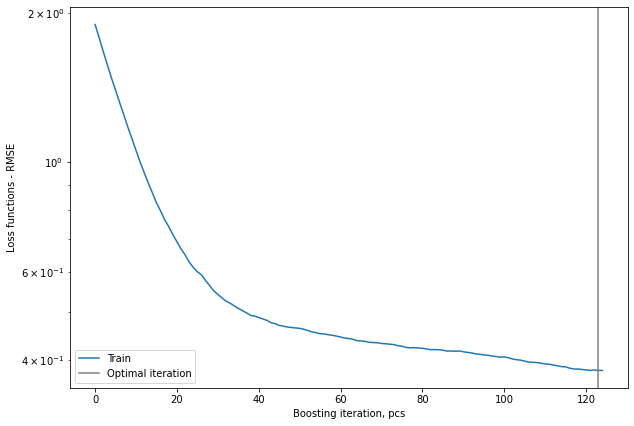

In [30]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [31]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [32]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  0.38
RMSE: 0.4
Relative RMSE(%):  0.166
MSE: 0.1
R square: 83.1%


In [33]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 0.515
a1: 0.778
R^2: 0.834
Uncertainty
a0: 0.51+/-0.06
a1: 0.778+/-0.024


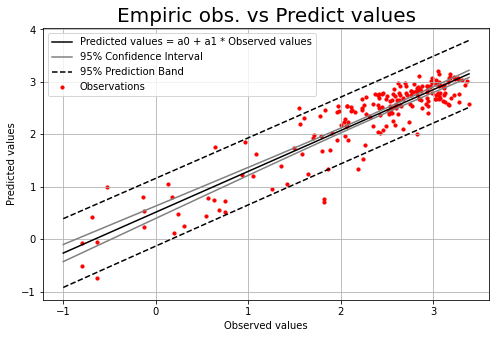

In [35]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

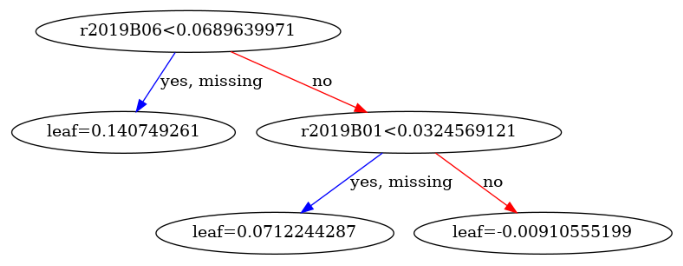

In [37]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=1) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

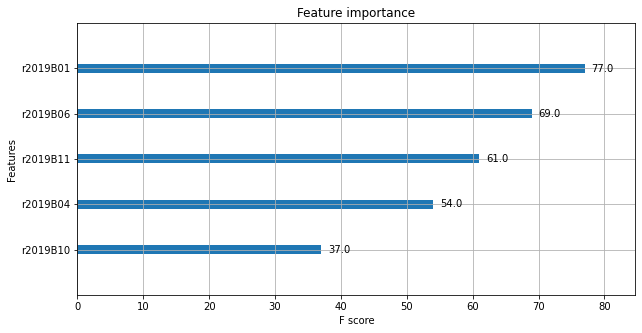

In [39]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

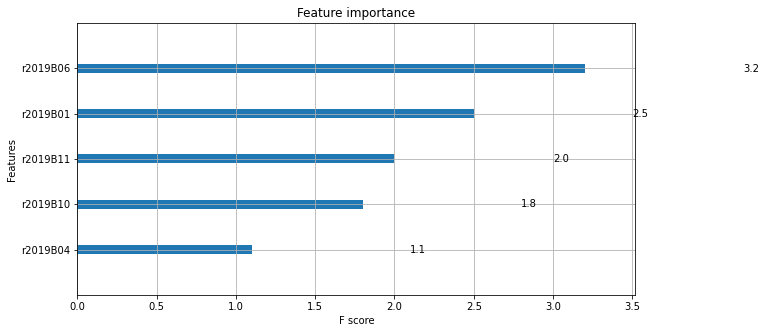

In [40]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

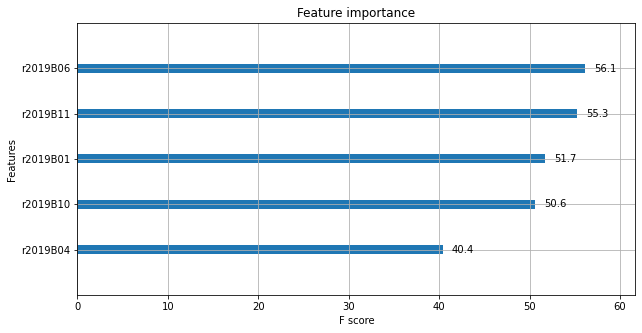

In [41]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [42]:
# Load SHAP`s library
import shap

In [43]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


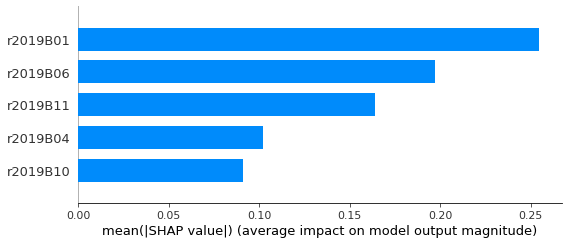

In [44]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

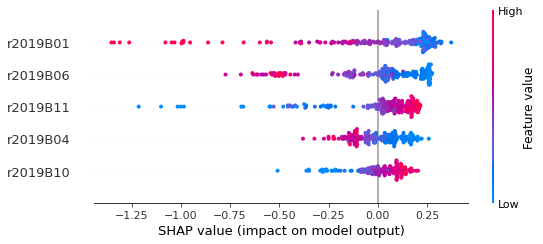

In [45]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

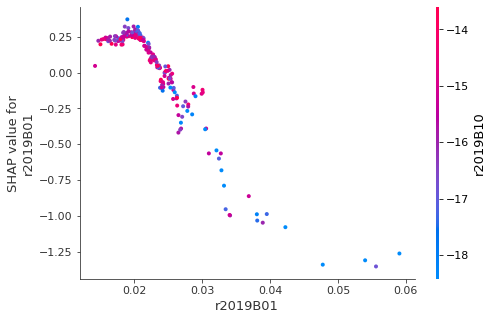

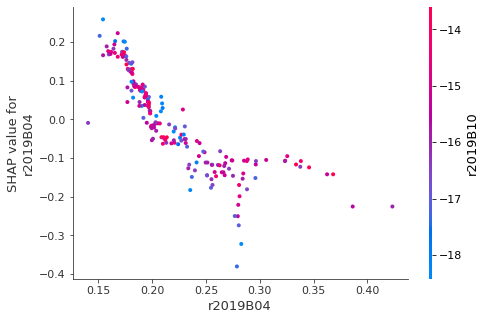

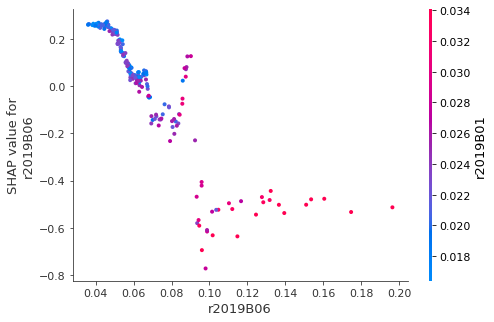

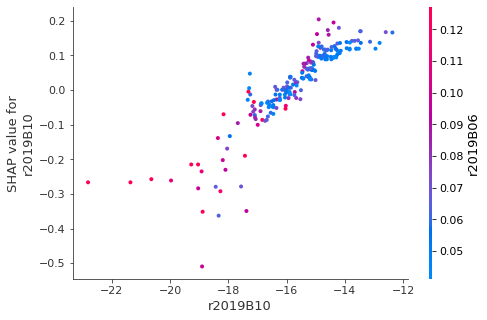

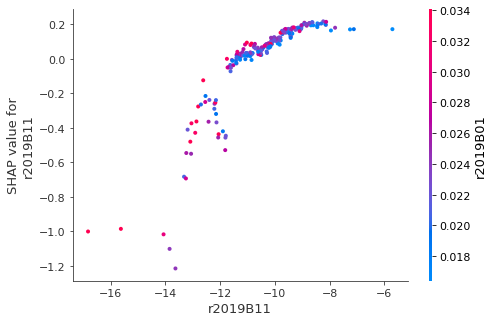

In [46]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [47]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/Nootbooks/XGB_model_AG_biomass_Sentinel_data_2019.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/Nootbooks/XGB_model_AG_biomass_Sentinel_data_2019.txt")